Notes here

## Overview

This notebook aims to analyze the Ames Housing dataset and build predictive models for housing prices. The notebook is organized into several sections, each focusing on a different aspect of the data analysis and modeling process. The primary goal is to provide a comprehensive understanding of the factors influencing house prices and to develop robust predictive models.

## I. Exploratory Data Analysis

**1. Get to Know the Data & Basic Statistics**

- Display the first few rows and summary statistics.

- List the column names.

- List the number of columns and rows.

In [3]:

# Load necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
import keras
import time
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import SVR
from keras import layers
from keras import models

In [4]:
# Load the Ames dataset
file_path = '../data/AmesData.csv'
ames_df = pd.read_csv(file_path)

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(ames_df.head())

First few rows of the dataset:
   MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0          20       RL           78    10140   Pave   NaN      Reg   
1          20       RL           88    12803   Pave   NaN      IR1   
2          60       RL           86    11839   Pave   NaN      Reg   
3          90       RL           75     8235   Pave   NaN      Reg   
4          20       RL           60     9060   Pave   NaN      Reg   

  LandContour Utilities LotConfig  ... PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub    Inside  ...      648     Fa  GdPrv         NaN   
1         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
2         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
3         Lvl    AllPub    Inside  ...        0    NaN    NaN         NaN   
4         Lvl    AllPub    Inside  ...        0    NaN  MnPrv         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      1    20

In [6]:
# Display summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(ames_df.describe())


Summary statistics of the dataset:
        MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  2769.000000  2769.000000    2769.000000  2769.000000  2769.000000   
mean     56.310943    57.709642   10275.234381     6.180209     5.570603   
std      41.331878    33.890329    8015.666666     1.380745     1.068879   
min      20.000000     0.000000    1300.000000     1.000000     1.000000   
25%      20.000000    42.000000    7540.000000     5.000000     5.000000   
50%      50.000000    63.000000    9550.000000     6.000000     5.000000   
75%      70.000000    79.000000   11645.000000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  2769.000000   2769.000000  2748.000000  2769.000000  2769.000000  ...   
mean   1972.942217   1984.836042   106.901019   455.408090    51.877212  ...   
std      29.436917     20.621587   182.

In [7]:
# List the column names
print("\nColumn names in the dataset:")
print(ames_df.columns.tolist())


Column names in the dataset:
['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorc

In [8]:
# Check the number of rows and columns in the dataset
print(f"\nThe dataset contains {ames_df.shape[0]} rows and {ames_df.shape[1]} columns.")


The dataset contains 2769 rows and 80 columns.


In [9]:
# Count the number of numerical and categorical columns
num_numerical = ames_df.select_dtypes(include=[np.number]).shape[1]
num_categorical = ames_df.select_dtypes(exclude=[np.number]).shape[1]
print(f"The dataset contains {num_numerical} numerical columns and {num_categorical} categorical columns before data processing.")

The dataset contains 37 numerical columns and 43 categorical columns before data processing.


In [10]:
# Identify columns with missing values
missing_values = ames_df.isnull().sum()
print("\nColumns with missing values and their counts before preprocessing:")
print(missing_values[missing_values > 0])


Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64


**2. Univariate Analysis**

Examine the distribution and characteristics of individual variables.

- Histograms: Visualize the distribution of numerical features.
- Box Plots: Identify outliers and understand the spread of numerical features.

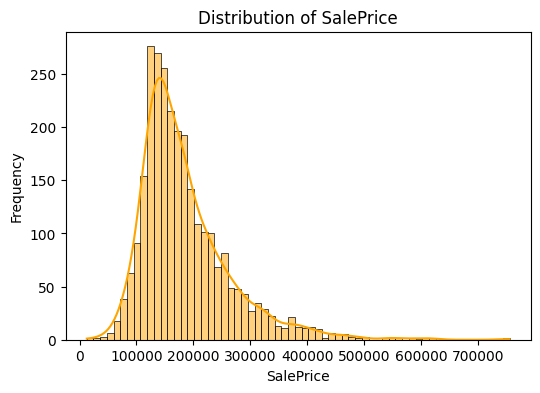

In [11]:
# Visualize the distribution of the target variable 'SalePrice'
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice'], kde=True, color='orange')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

**SalePrice:** The target variable shows a right-skewed distribution, indicating that most houses are sold at lower prices, with a few high-priced houses.

Histograms for all numerical features:


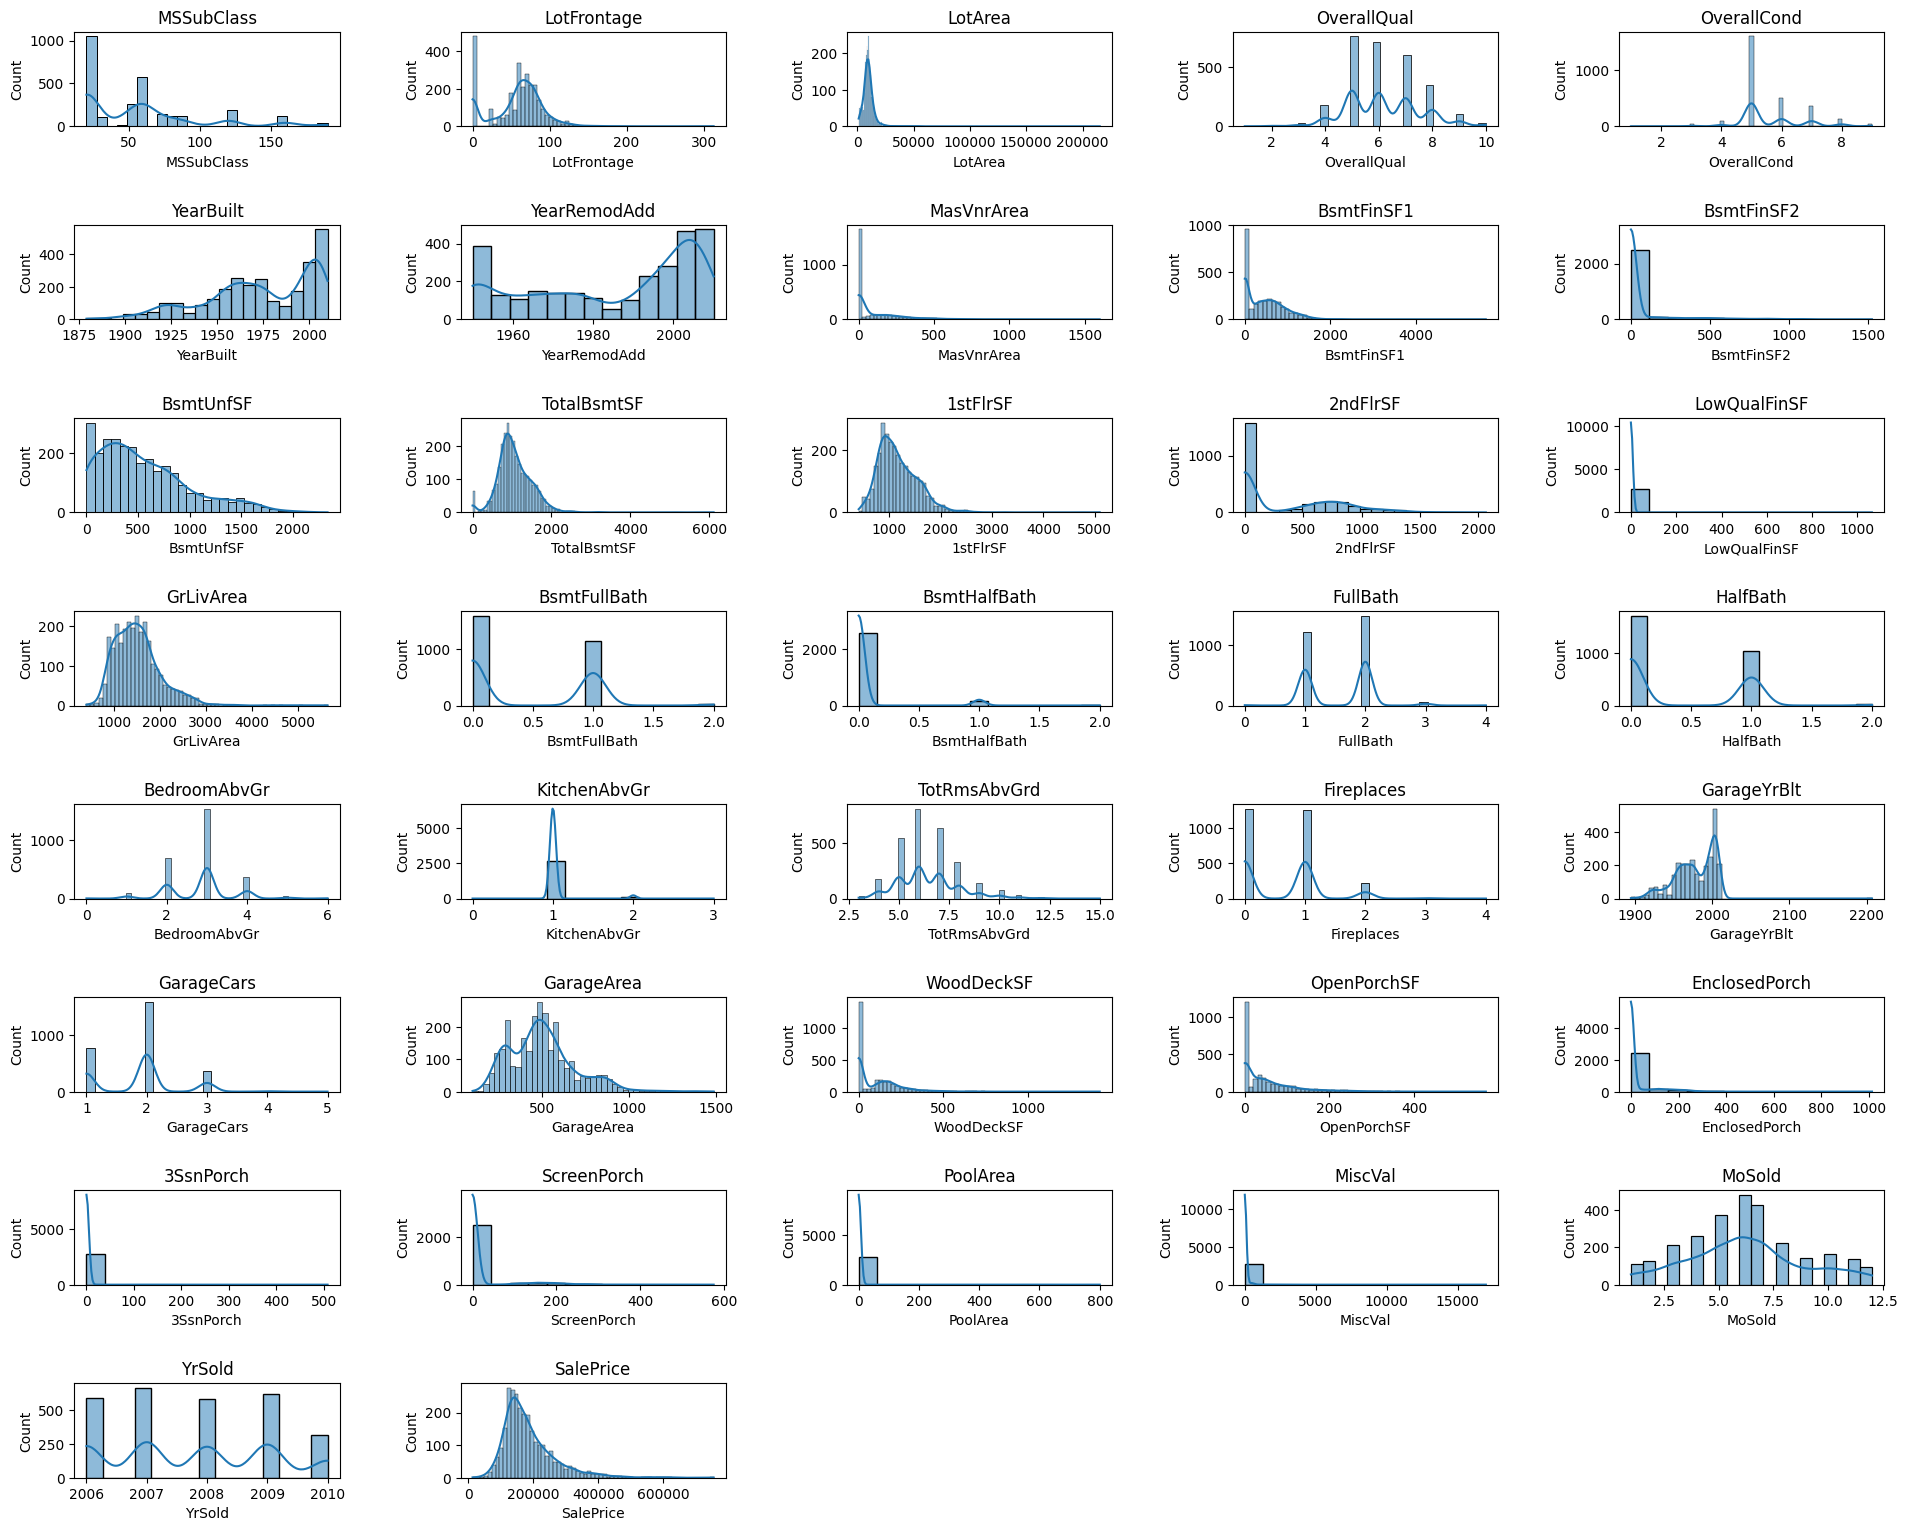

In [12]:
# Histograms for all numerical features
num_features = ames_df.select_dtypes(include=[np.number]).columns
num_features_count = len(num_features)

# Determine the grid size
rows = int(np.ceil(num_features_count / 4))
cols = 5

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(num_features):
    row = i // cols
    col = i % cols
    sns.histplot(ames_df[feature], kde=True, ax=axes[row, col])
    axes[row, col].set_title(f'{feature}')

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

print("Histograms for all numerical features:")
plt.show()

### Interpretation of Histogram Results

The histograms for the numerical features of the Ames Housing dataset provide a visual representation of the distribution of each feature. Here are some key observations:

**1. MSSubClass:** The distribution is highly skewed to the right, with most values clustered at the lower end. This indicates that most houses belong to a few specific subclasses.

**2. LotFrontage, LotArea:** Both features show a right-skewed distribution, indicating that most properties have smaller lot frontages and areas, with a few properties having much larger values.

**3. OverallQual, OverallCond:** These features show a more normal distribution, particularly OverallQual, which peaks around the middle values, indicating that most houses have an average quality and condition.

**4. YearBuilt, YearRemodAdd:** Both features show a peak around recent years, indicating that there has been a higher rate of construction and remodeling in recent decades.

**5. MasVnrArea:** This feature shows many houses with no masonry veneer area (indicated by the high count at 0), with the remaining values right-skewed.

**6. Basement Features (BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF):** The distributions are generally right-skewed, indicating that most houses have smaller basement areas, with a few having very large ones.

**7. 1stFlrSF, 2ndFlrSF (First and Second Floor Square Feet):** Both features show right-skewed distributions, indicating that most houses have smaller first and second floor areas.

**8. Bathrooms (FullBath, HalfBath, BsmtFullBath, BsmtHalfBath):** These features show discrete distributions with peaks at typical values, indicating that 
-   BsmtFullBath: Most houses have 0 or 1 full bathroom in the basement.
-   BsmtHalfBath: Most houses have 0 or 1 half bathroom in the basement, with very few having more.
-   FullBath: Most houses have 1 or 2 full bathrooms, with a smaller number having 3 or 4.
-   HalfBath: Most houses have 0 or 1 half bathroom, with a smaller number having 2.
    
These distributions are expected for bathroom features, as they are typically present in whole numbers and not fractions.

**9. GrLivArea:** The distribution is right-skewed, indicating that most houses have smaller living areas, with a few having very large ones.

**10. Bedrooms, Kitchens, Fireplaces:** These features show a more discrete distribution, with most houses having a typical number of bedrooms, kitchens, and fireplaces.

**11. Garage Features (GarageCars, GarageArea, GarageYrBlt):** These features generally show right-skewed distributions, indicating that most houses have smaller garage areas and capacities, with a few having very large ones.

**12. Porch and Deck Features (WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch):** These features show right-skewed distributions, indicating that most houses have smaller porch and deck areas.

**13. PoolArea, MiscVal:** These features show very high counts at 0, indicating that most houses do not have pools or miscellaneous values.

**14. MoSold:** This feature shows a more normal distribution, indicating that house sales are relatively evenly distributed across months.

**15. YrSold:** This feature shows an almost uniform distribution across the years, with the exception of a shorter bar in 2010, indicating fewer sales in that year.

**16. SalePrice:** The target variable shows a right-skewed distribution, indicating that most houses are sold at lower prices, with a few high-priced houses.

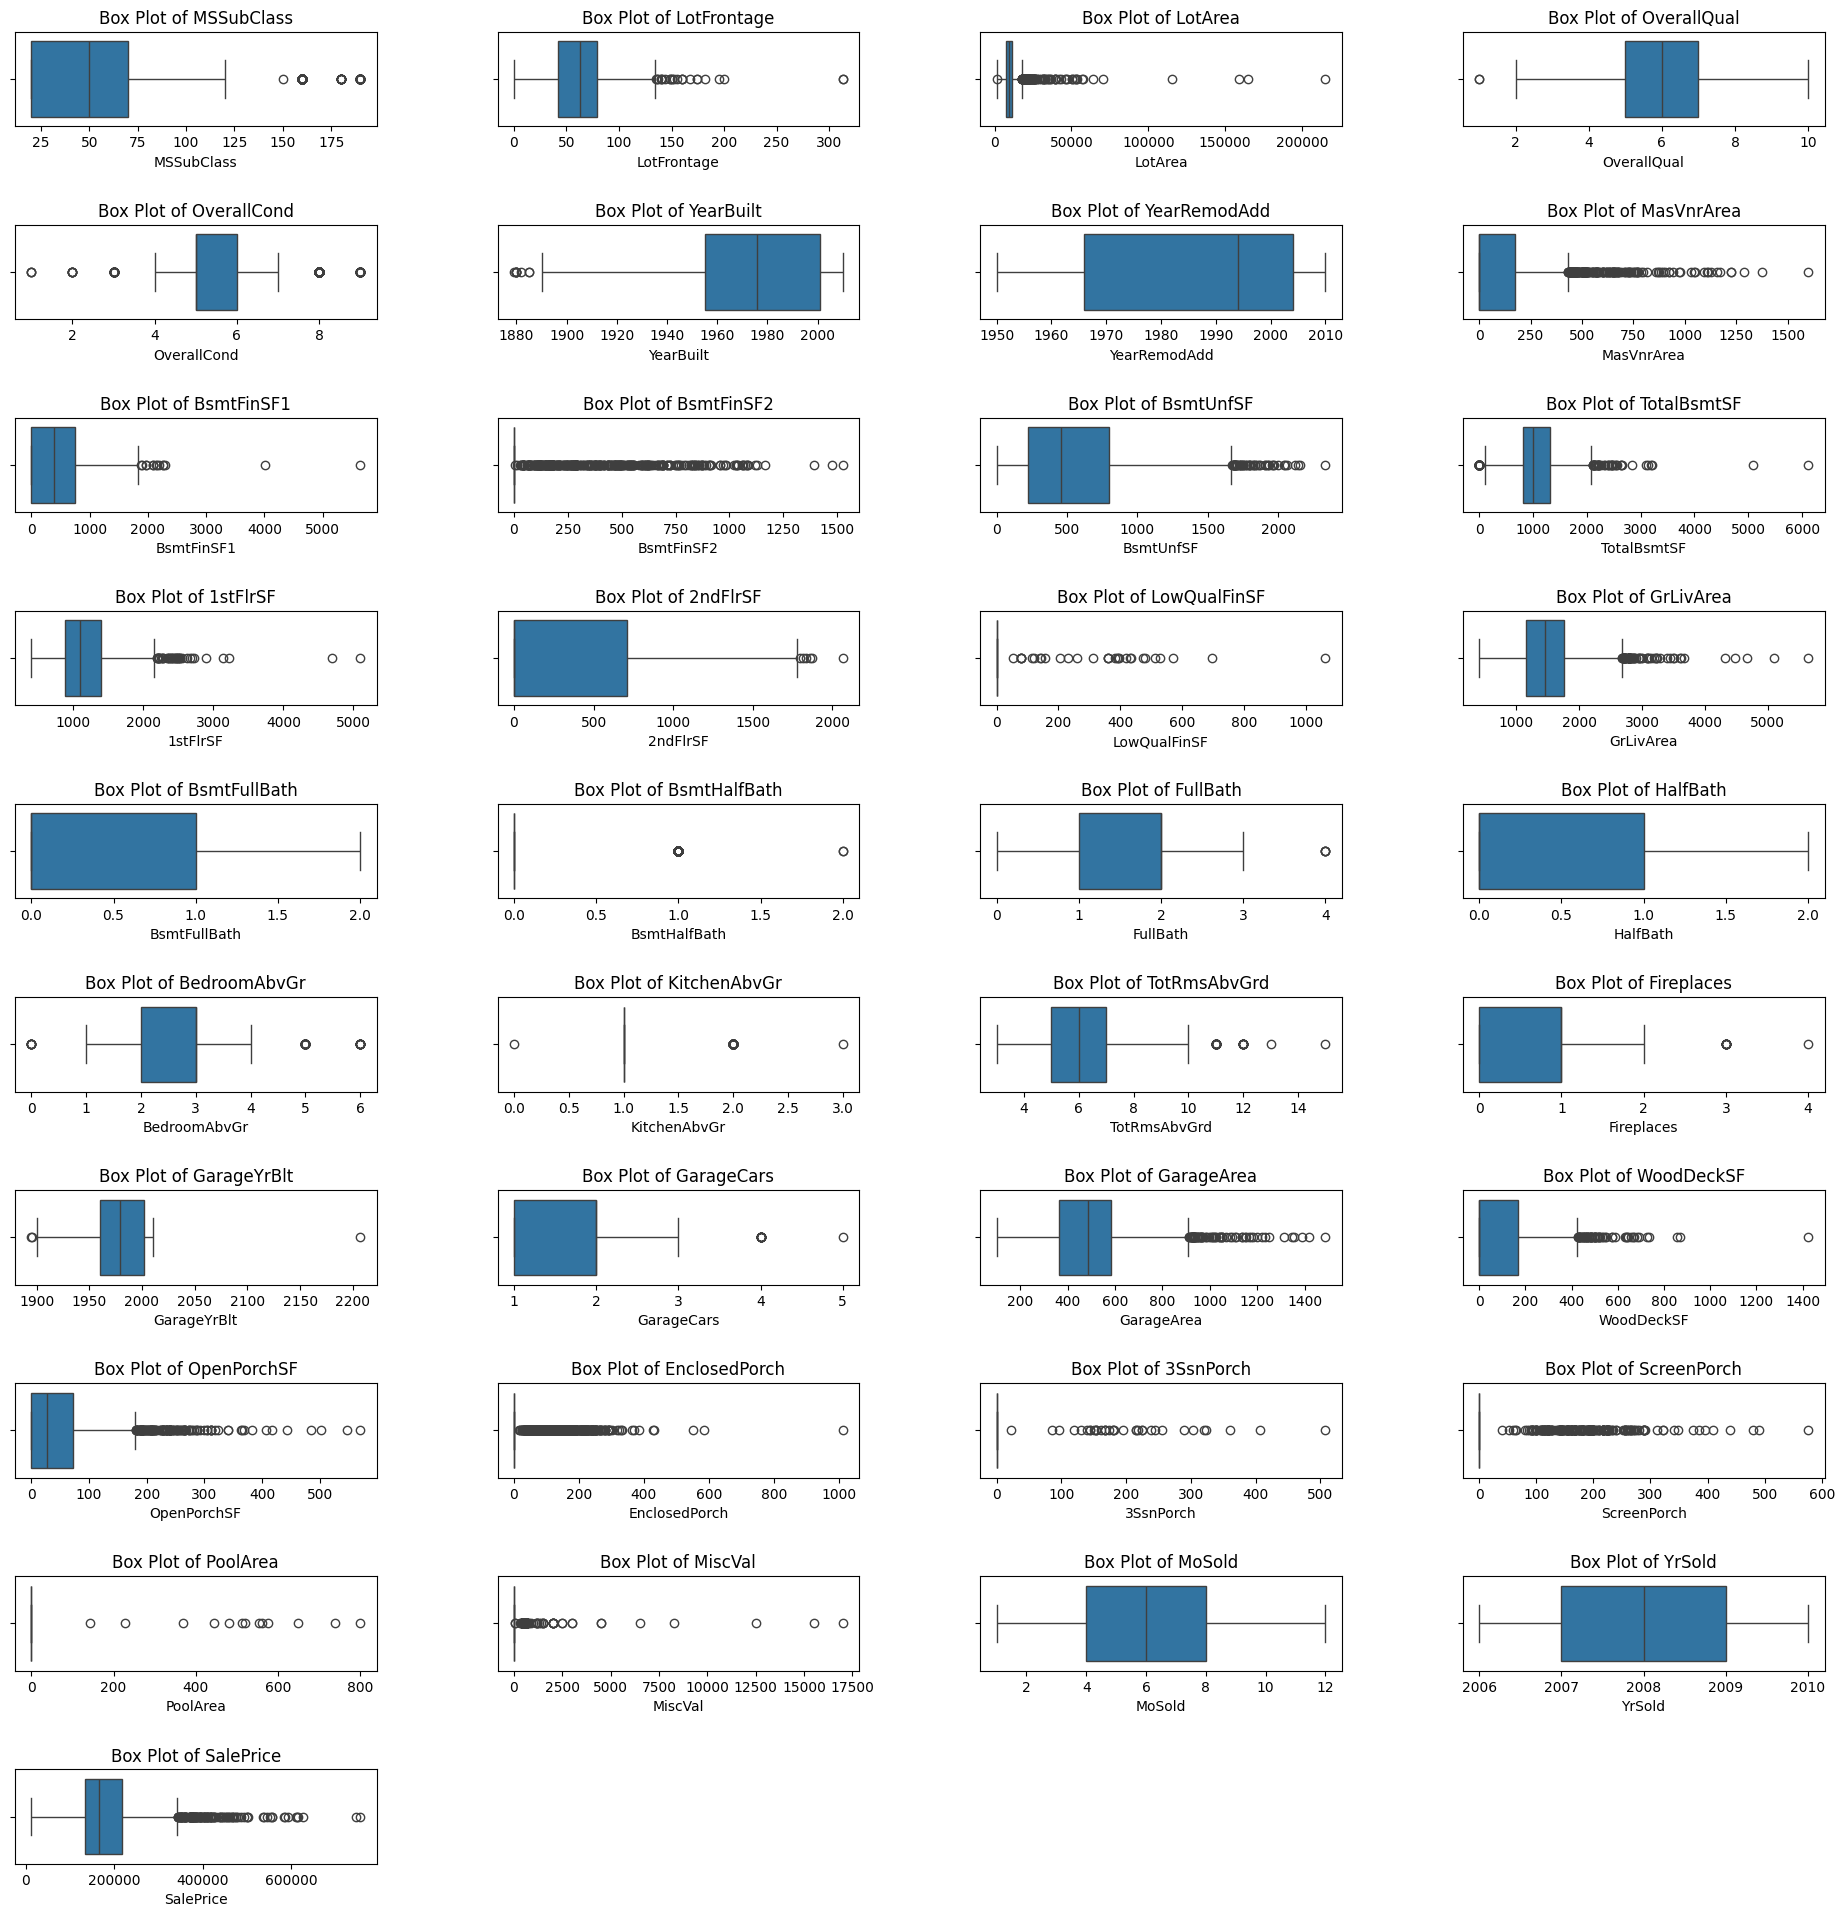

In [13]:
# Box Plots for all numerical features
num_features = ames_df.select_dtypes(include=[np.number]).columns

# Determine the grid size
rows = int(np.ceil(len(num_features) / 4))
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(num_features):
    row = i // cols
    col = i % cols
    sns.boxplot(x=ames_df[feature], ax=axes[row, col])
    axes[row, col].set_title(f'Box Plot of {feature}')

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

plt.show()

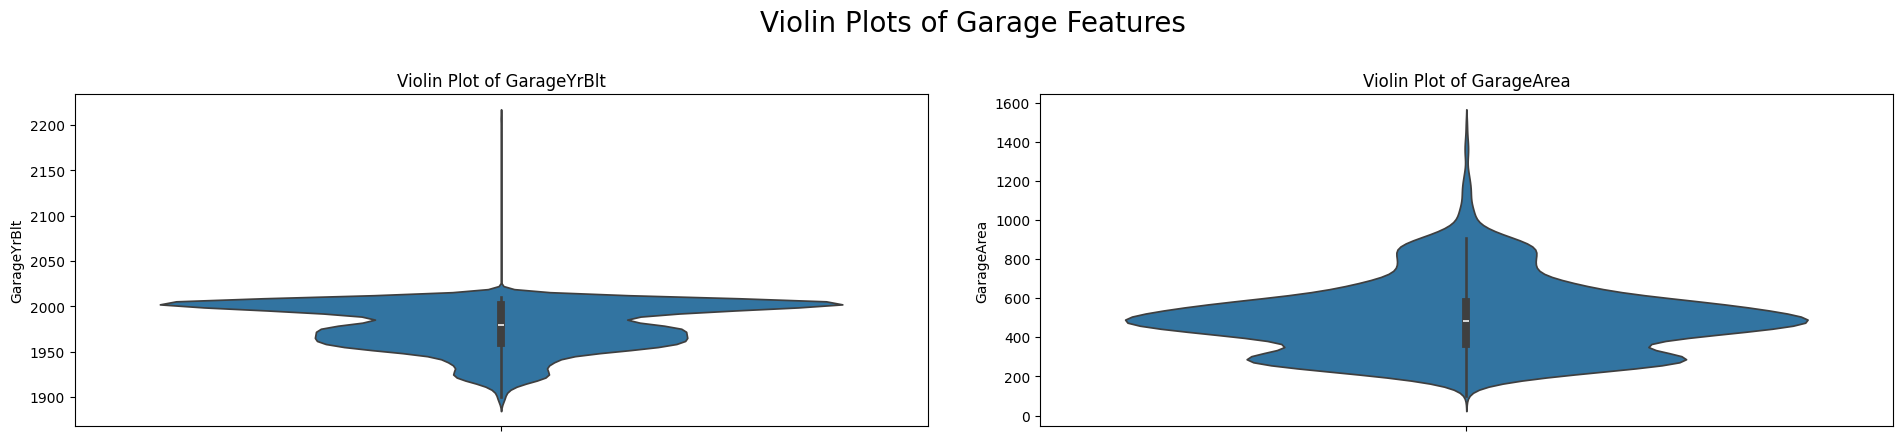

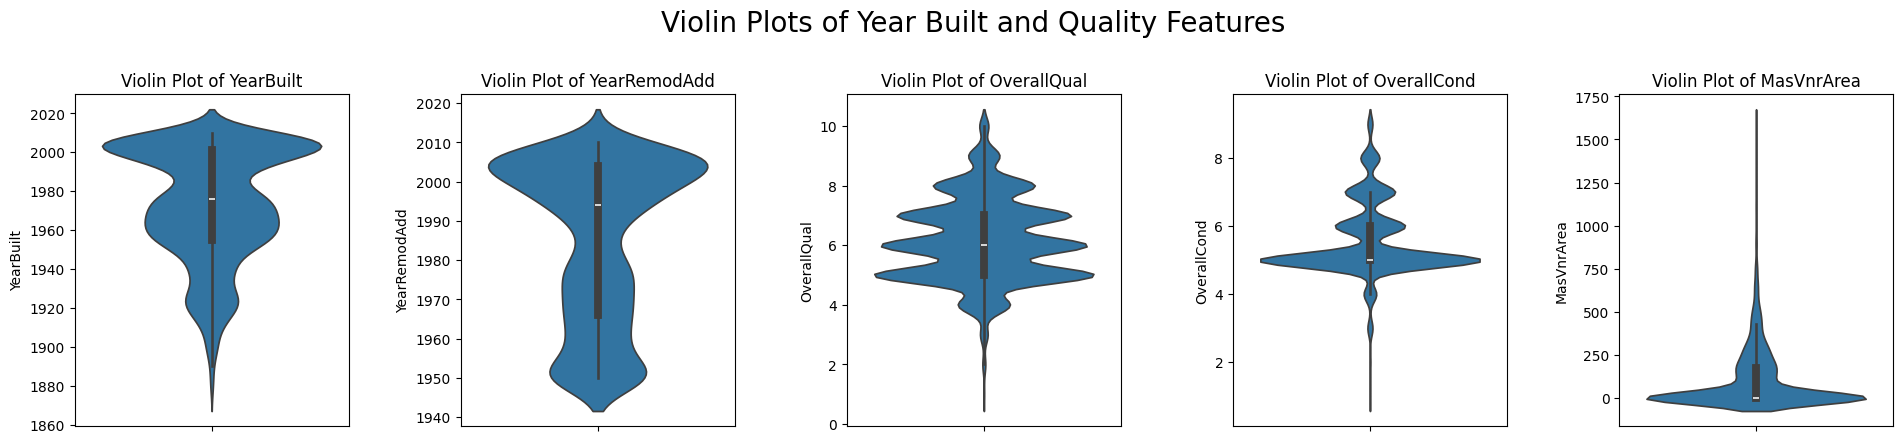

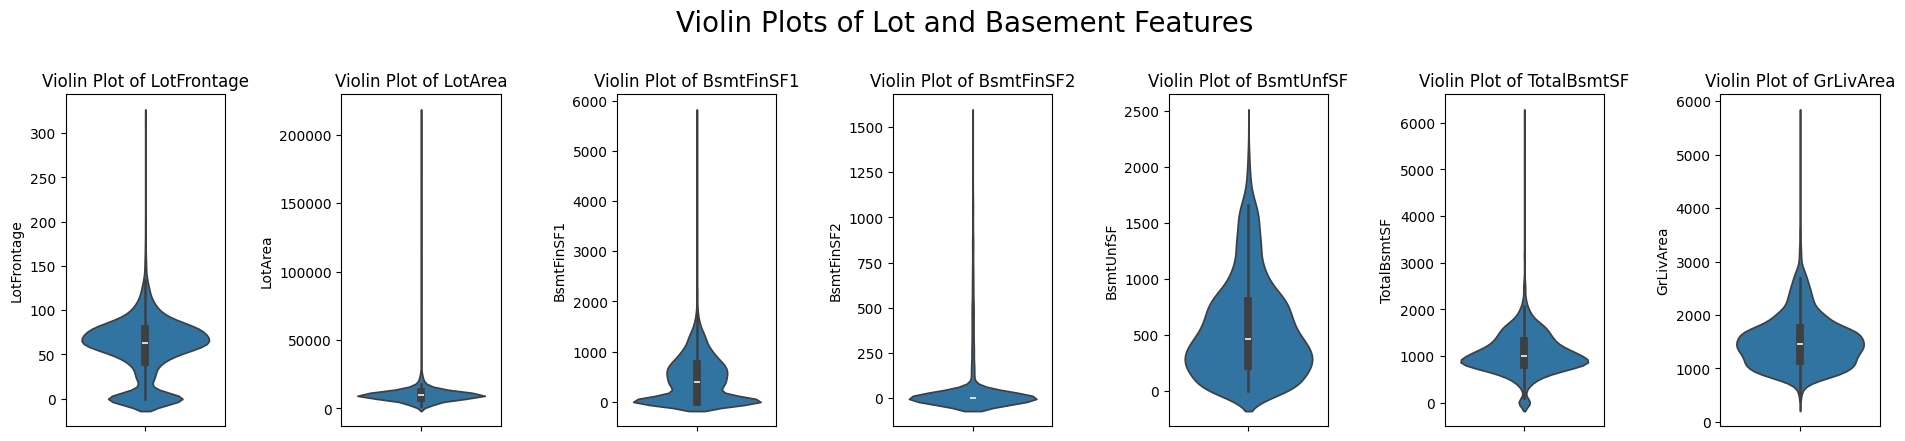

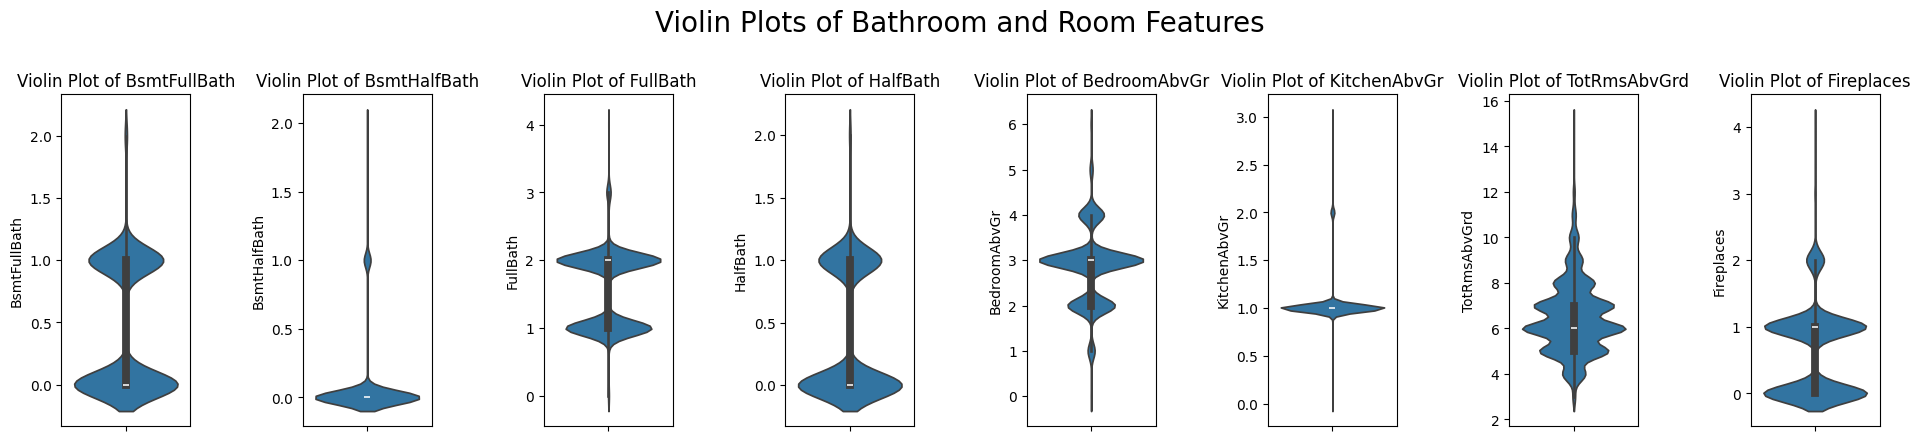

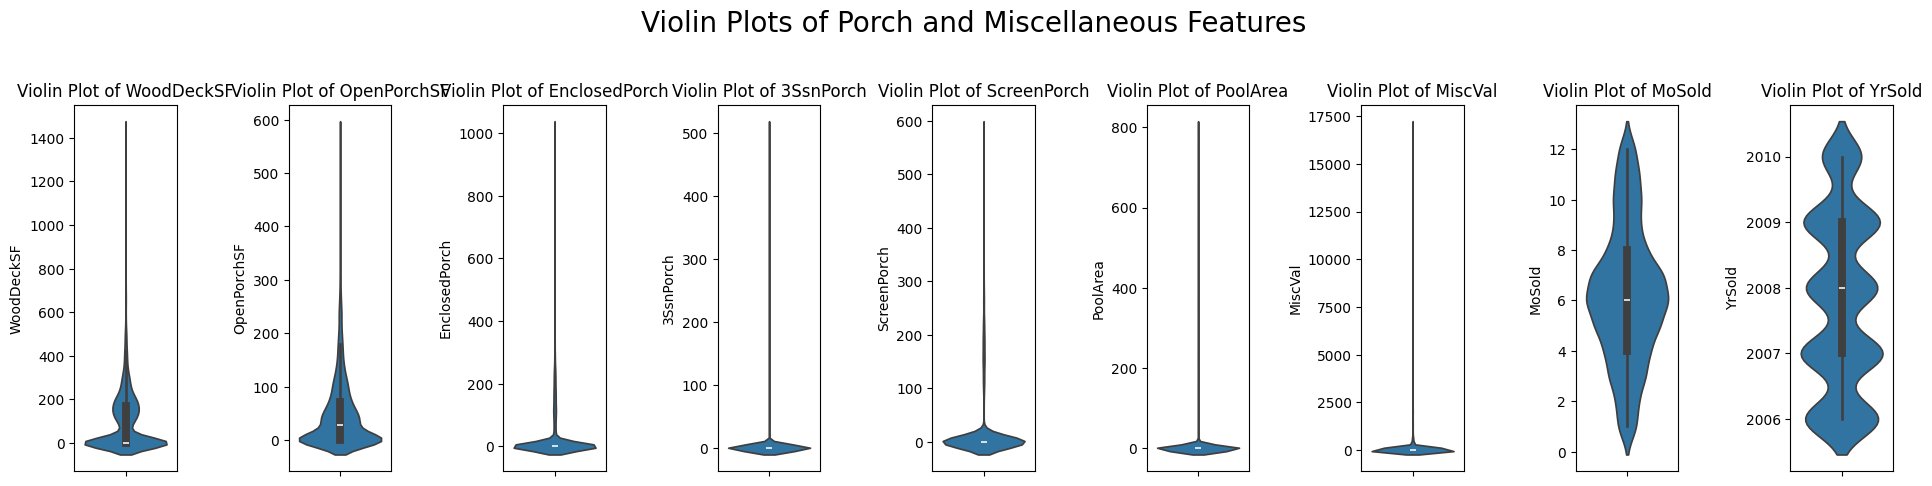

In [14]:
# Function to create violin plots for a group of features
def plot_violin_group(features, title):
    num_features = len(features)
    rows = int(np.ceil(num_features / 8))
    cols = min(9, num_features)

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
    fig.tight_layout(pad=5.0)

    # If only one row or column, axes might not be a 2D array, so we need to handle that case
    if rows == 1:
        axes = np.expand_dims(axes, axis=0)
    if cols == 1:
        axes = np.expand_dims(axes, axis=1)

    for i, feature in enumerate(features):
        row = i // cols
        col = i % cols
        sns.violinplot(y=ames_df[feature], ax=axes[row, col])
        axes[row, col].set_title(f'Violin Plot of {feature}')

    # Remove any empty subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes.flatten()[j])

    plt.suptitle(title, y=1.02, fontsize=20)
    plt.show()

# Plot each group
plot_violin_group(['GarageYrBlt', 'GarageArea'], 'Violin Plots of Garage Features')
plot_violin_group(['YearBuilt', 'YearRemodAdd', 'OverallQual', 'OverallCond', 'MasVnrArea'], 'Violin Plots of Year Built and Quality Features')
plot_violin_group(['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GrLivArea'], 'Violin Plots of Lot and Basement Features')
plot_violin_group(['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces'], 'Violin Plots of Bathroom and Room Features')
plot_violin_group(['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'], 'Violin Plots of Porch and Miscellaneous Features')

### Lot and Basement Features
1.	LotFrontage: Shows a high density of values around 50, with some higher values up to 300.
2.	LotArea: Highly skewed with most values between 0 and 50,000, and a few much higher.
3.	BsmtFinSF1: Most values are below 2,000, with a high peak near zero.
4.	BsmtFinSF2: Similar to BsmtFinSF1 but with fewer values and a peak near zero.
5.	BsmtUnfSF: Dense around 0 to 1,500, with some values up to 2,500.
6.	TotalBsmtSF: Concentration of values around 0 to 2,000, with some higher values.
7.	GrLivArea: Dense around 1,000 to 2,500, with fewer values above 3,000.

### Year Built and Quality Features

1.	YearBuilt: Most houses were built between 1950 and 2000.
2.	YearRemodAdd: Similar to YearBuilt but with a peak around 2000.
3.	OverallQual: Most houses have a quality rating between 5 and 7.
4.	OverallCond: Most houses have a condition rating between 5 and 7.
5.	MasVnrArea: High density near zero, indicating many houses do not have masonry veneer.

### Bathroom and Room Features

1.	BsmtFullBath: Most houses have 0 or 1 full bathroom in the basement.
2.	BsmtHalfBath: Most houses have 0 half bathrooms in the basement.
3.	FullBath: Most houses have 2 full bathrooms.
4.	HalfBath: Most houses have 0 or 1 half bathroom.
5.	BedroomAbvGr: Most houses have 2 to 3 bedrooms.
6.	KitchenAbvGr: Most houses have 1 kitchen.
7.	TotRmsAbvGrd: Most houses have 5 to 8 rooms above ground.
8.	Fireplaces: Most houses have 1 fireplace.

### Garage Features

1.	GarageYrBlt: Most garages were built between 1960 and 2000.
2.	GarageArea: Most garages have an area between 0 and 600.
3.	GarageCars: Most houses have 1 or 2 car garages.

### Porch and Miscellaneous Features
1.	WoodDeckSF: Most houses have a wood deck area around 0 to 200.
2.	OpenPorchSF: Most houses have open porch areas around 0 to 100.
3.	EnclosedPorch: Most houses have enclosed porch areas around 0.
4.	3SsnPorch: Very few houses have a 3-season porch.
5.	ScreenPorch: Most houses have screen porch areas around 0.
6.	PoolArea: Very few houses have a pool.
7.	MiscVal: Most houses have a miscellaneous value around 0.
8.	MoSold: Sales are distributed fairly evenly across months.
9.	YrSold: Most houses were sold between 2006 and 2010.


**3. Bi-variate Analysis**

Explore the relationships between pairs of variables.

- Correlation Heatmap: Identify strong relationships between features and the target variable.
- Scatter Plots: Visualize the relationships between selected features and SalePrice.

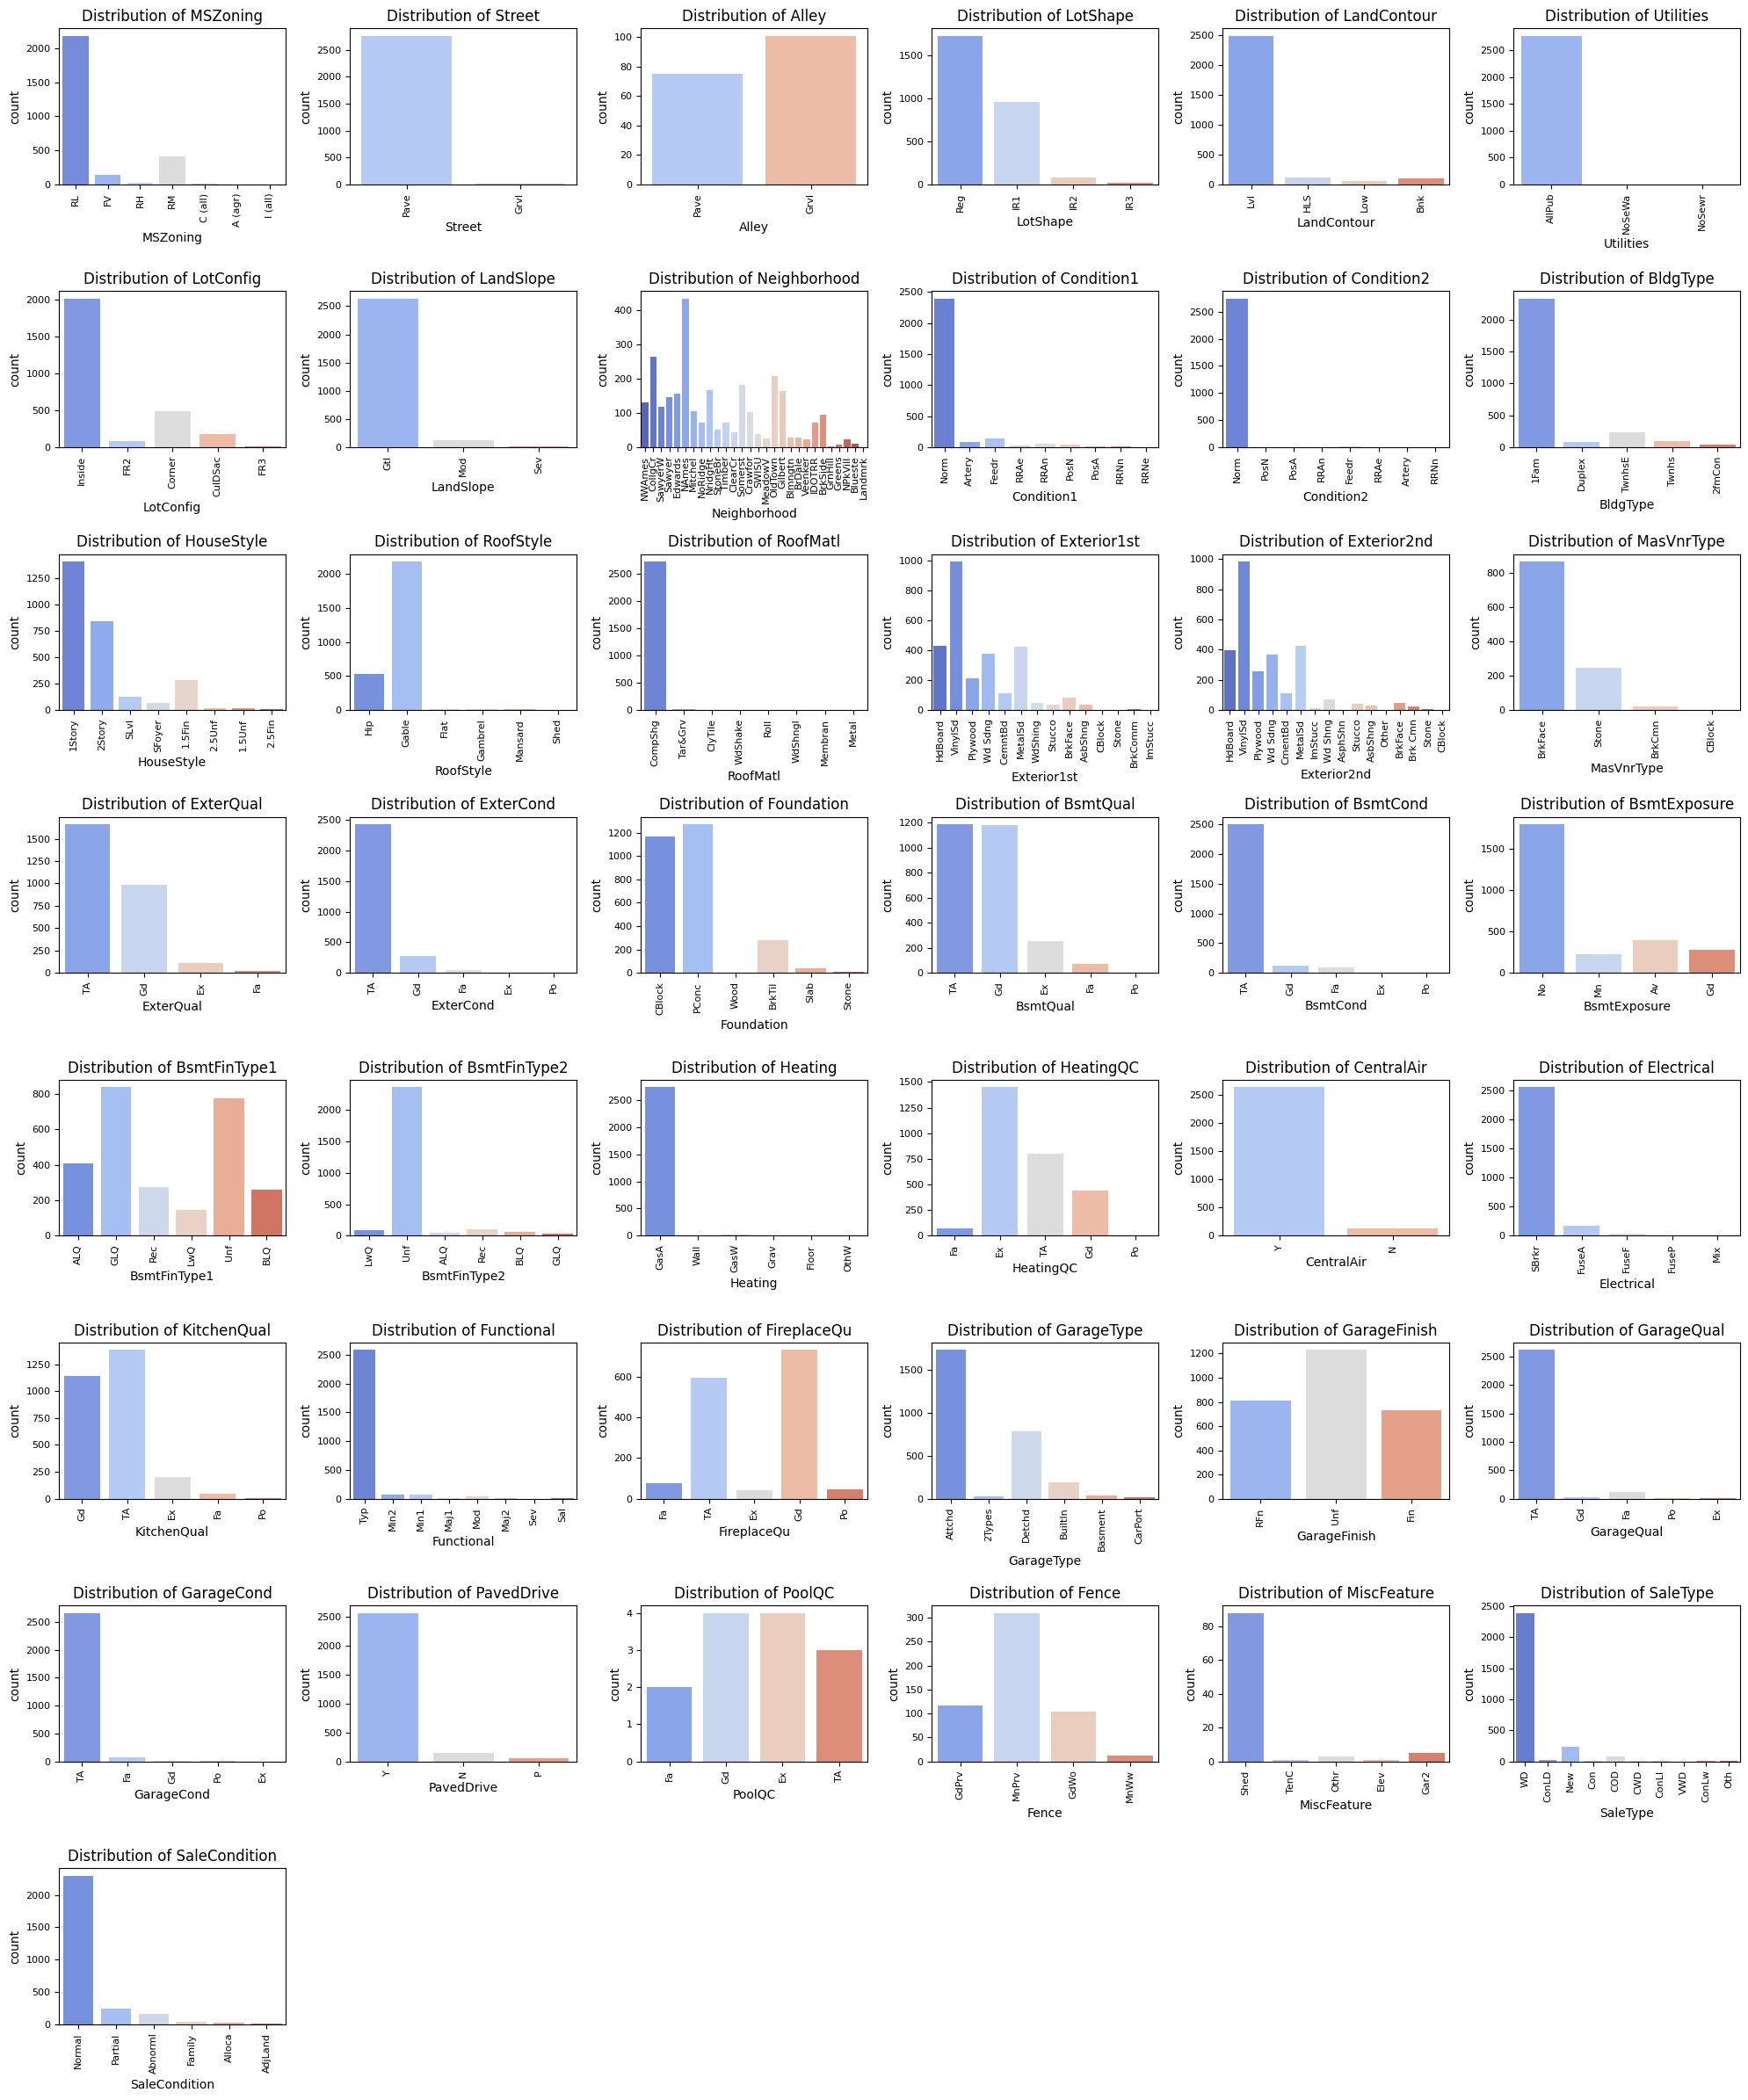

In [16]:
# Frequency distribution of categorical variables
categorical_cols = ames_df.select_dtypes(exclude=[np.number]).columns.tolist()

# Determine the number of rows and columns for the subplot grid
n_cols = 6
n_rows = len(categorical_cols) // n_cols + (len(categorical_cols) % n_cols > 0)

# Plot count plots for categorical features
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.countplot(x=ames_df[feature], ax=axes[i], hue=ames_df[feature], palette="coolwarm", dodge=False, legend=False)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove any unused subplots
for ax in axes[len(categorical_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

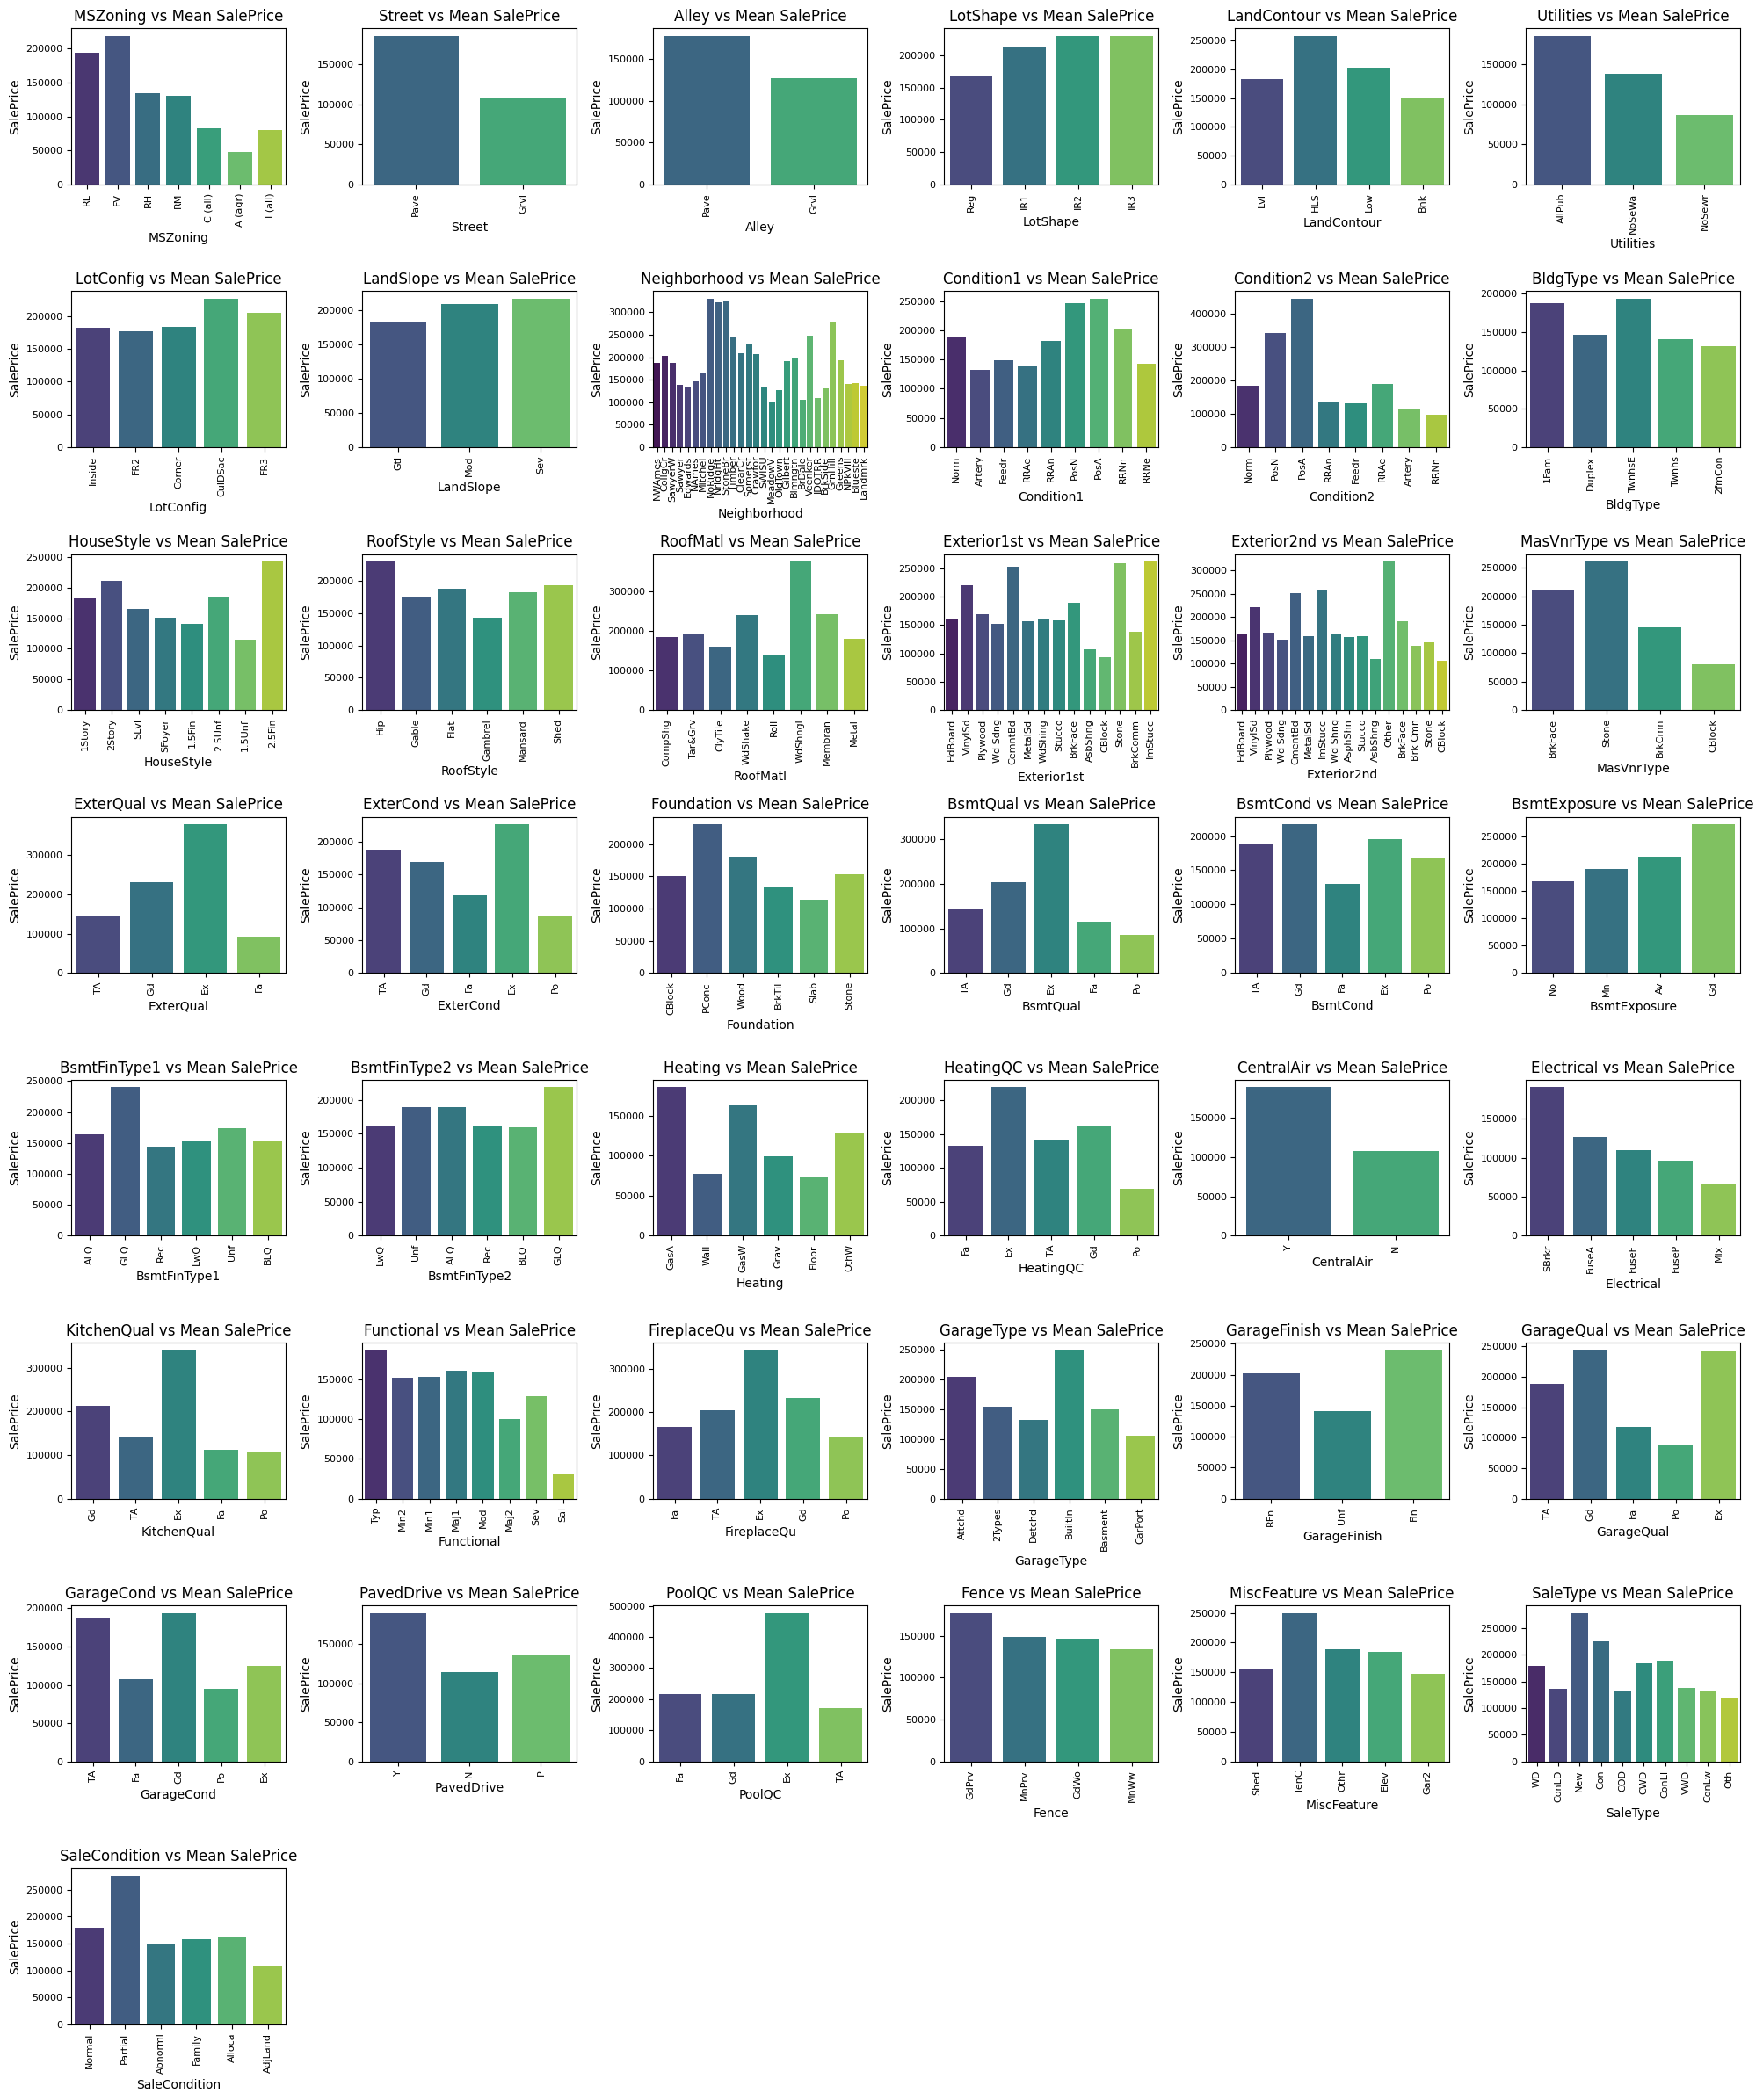

In [17]:
# Plot bar plots for categorical features against mean SalePrice
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.barplot(x=ames_df[feature], y=ames_df['SalePrice'], ax=axes[i], errorbar=None, hue=ames_df[feature], palette="viridis", dodge=False, legend=False)
    axes[i].set_title(f'{feature} vs Mean SalePrice')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove any unused subplots
for ax in axes[len(categorical_cols):]:
    ax.remove()

plt.tight_layout()
plt.show()

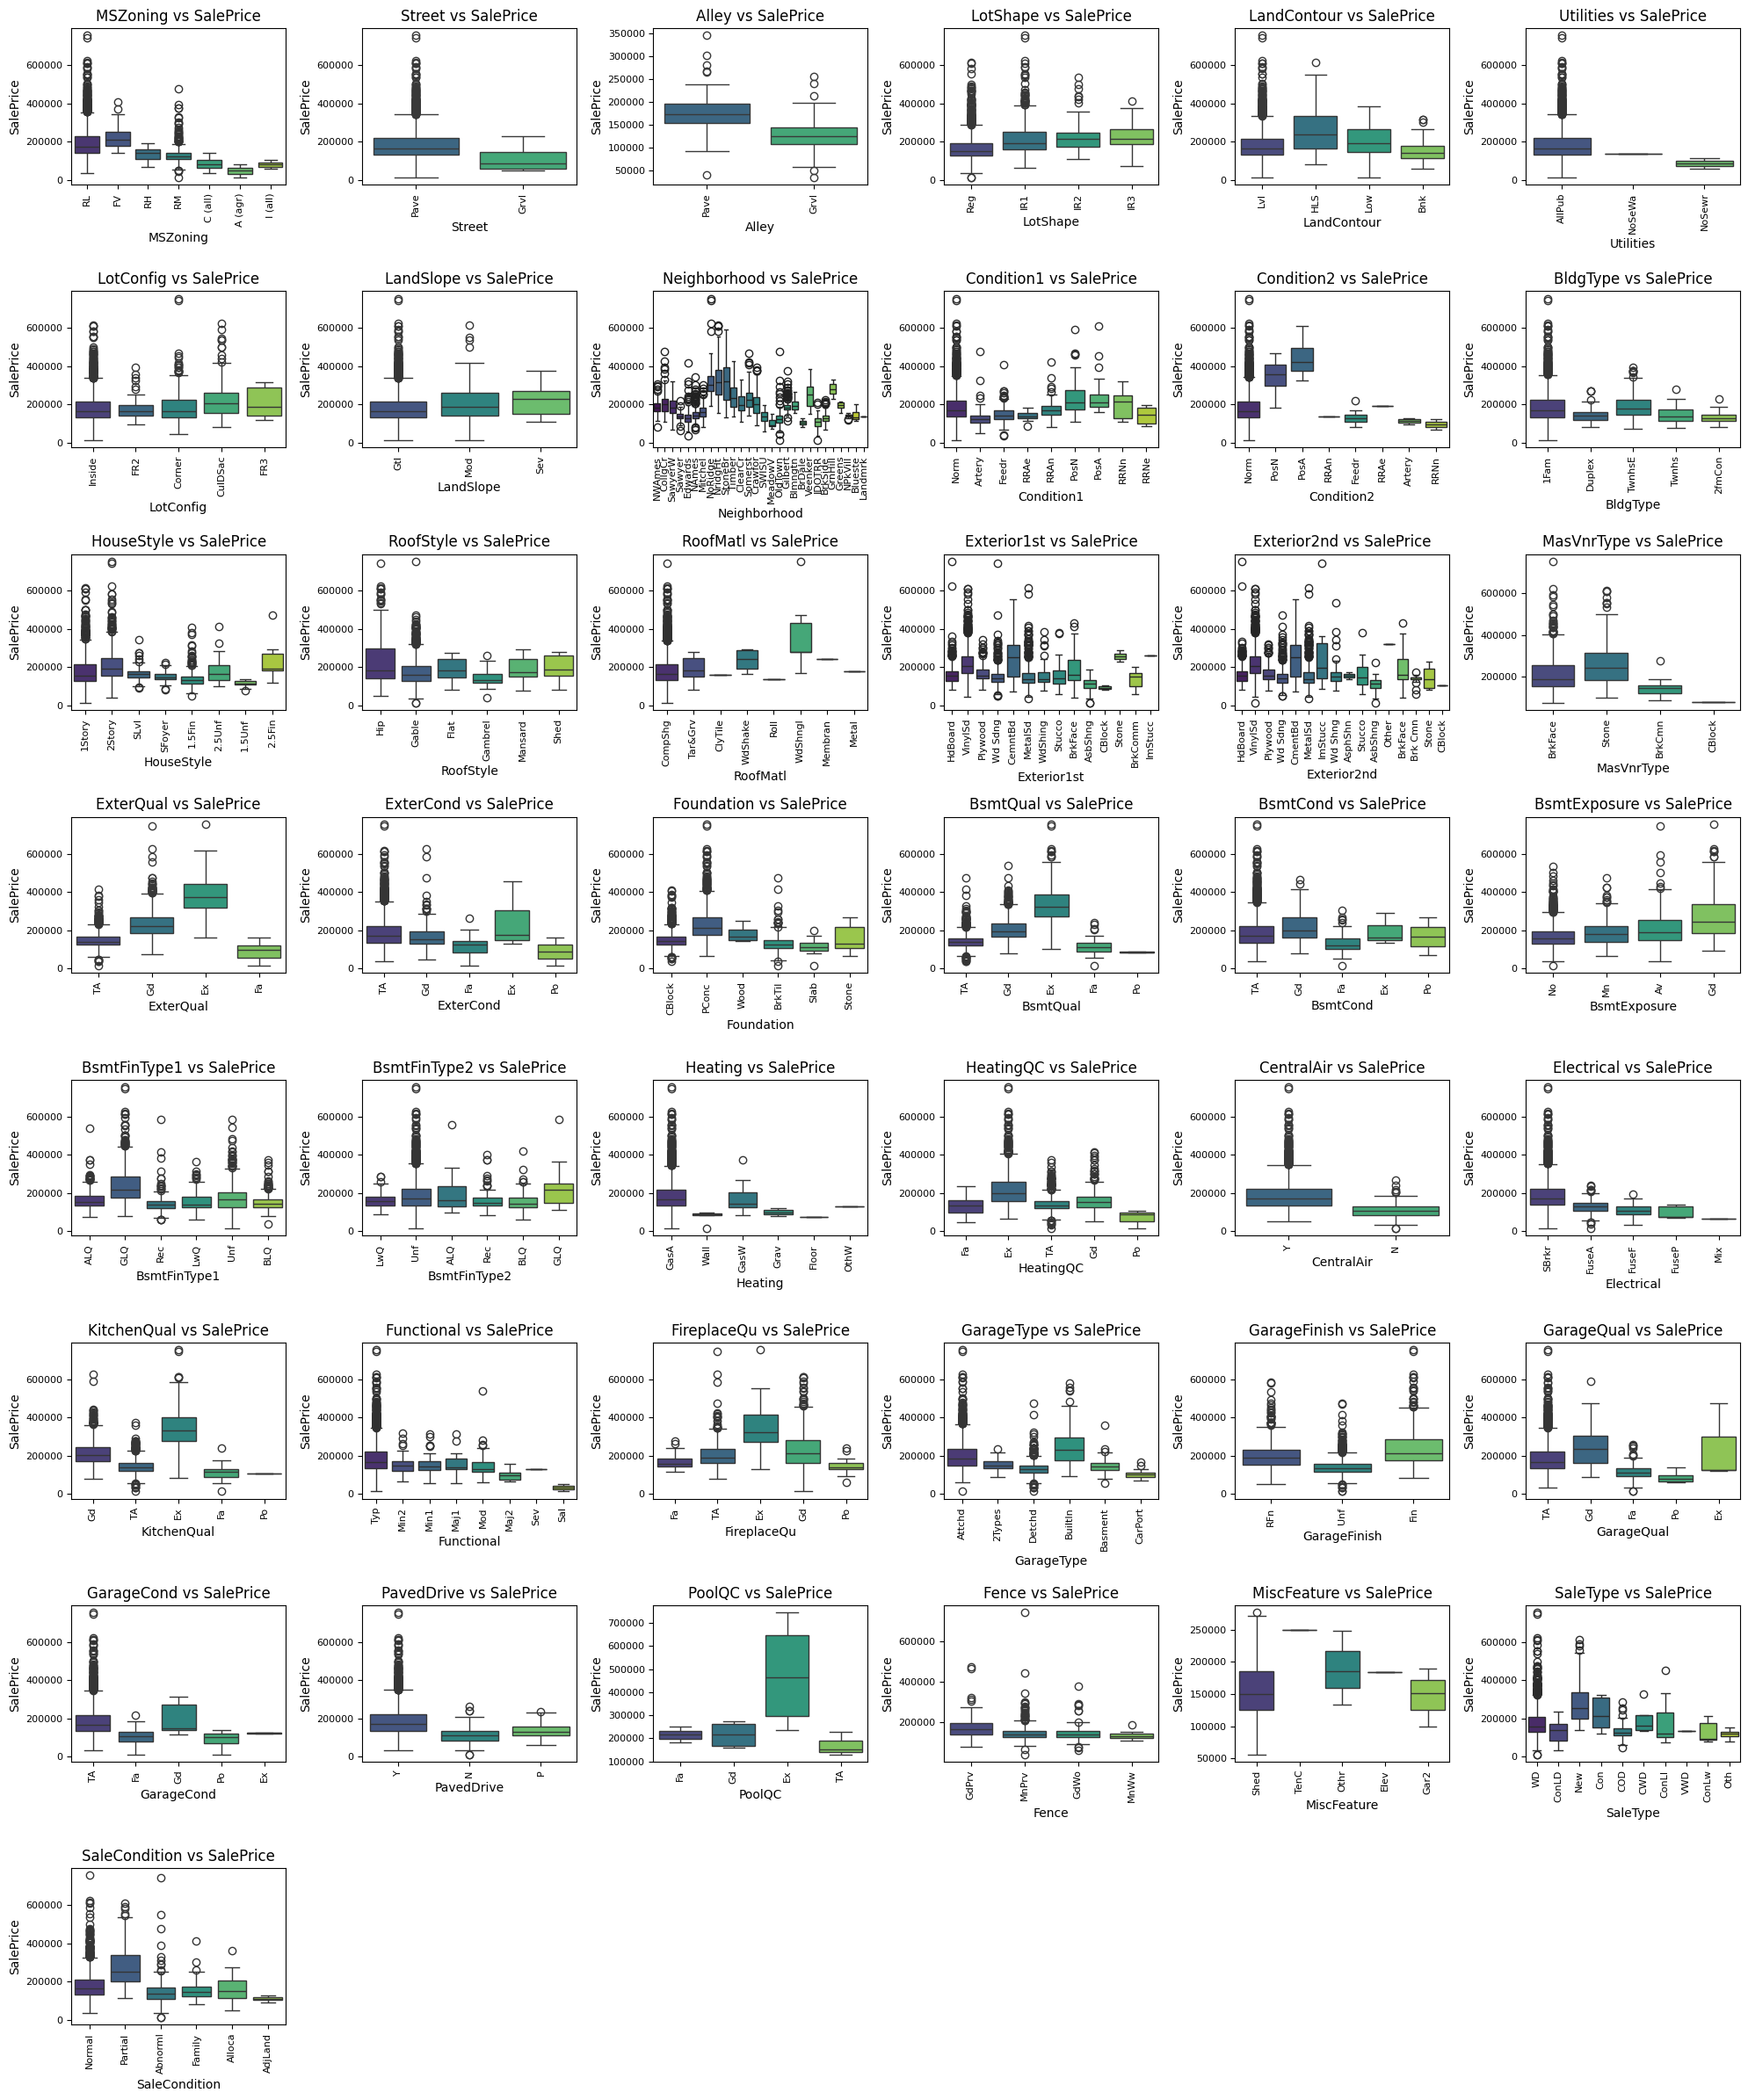

In [18]:
# Box plots of categorical variables vs. SalePrice
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 3))
axes = axes.flatten()

for i, feature in enumerate(categorical_cols):
    sns.boxplot(x=ames_df[feature], y=ames_df['SalePrice'], hue=ames_df[feature], ax=axes[i], palette="viridis", legend=False)
    axes[i].set_title(f'{feature} vs SalePrice')
    axes[i].tick_params(axis='x', rotation=90, labelsize=8)
    axes[i].tick_params(axis='y', labelsize=8)

# Remove any unused subplots
for ax in axes[len(categorical_cols):]:
    fig.delaxes(ax)

plt.tight_layout()
plt.show()

Scatter plots for all numerical features vs. SalePrice:


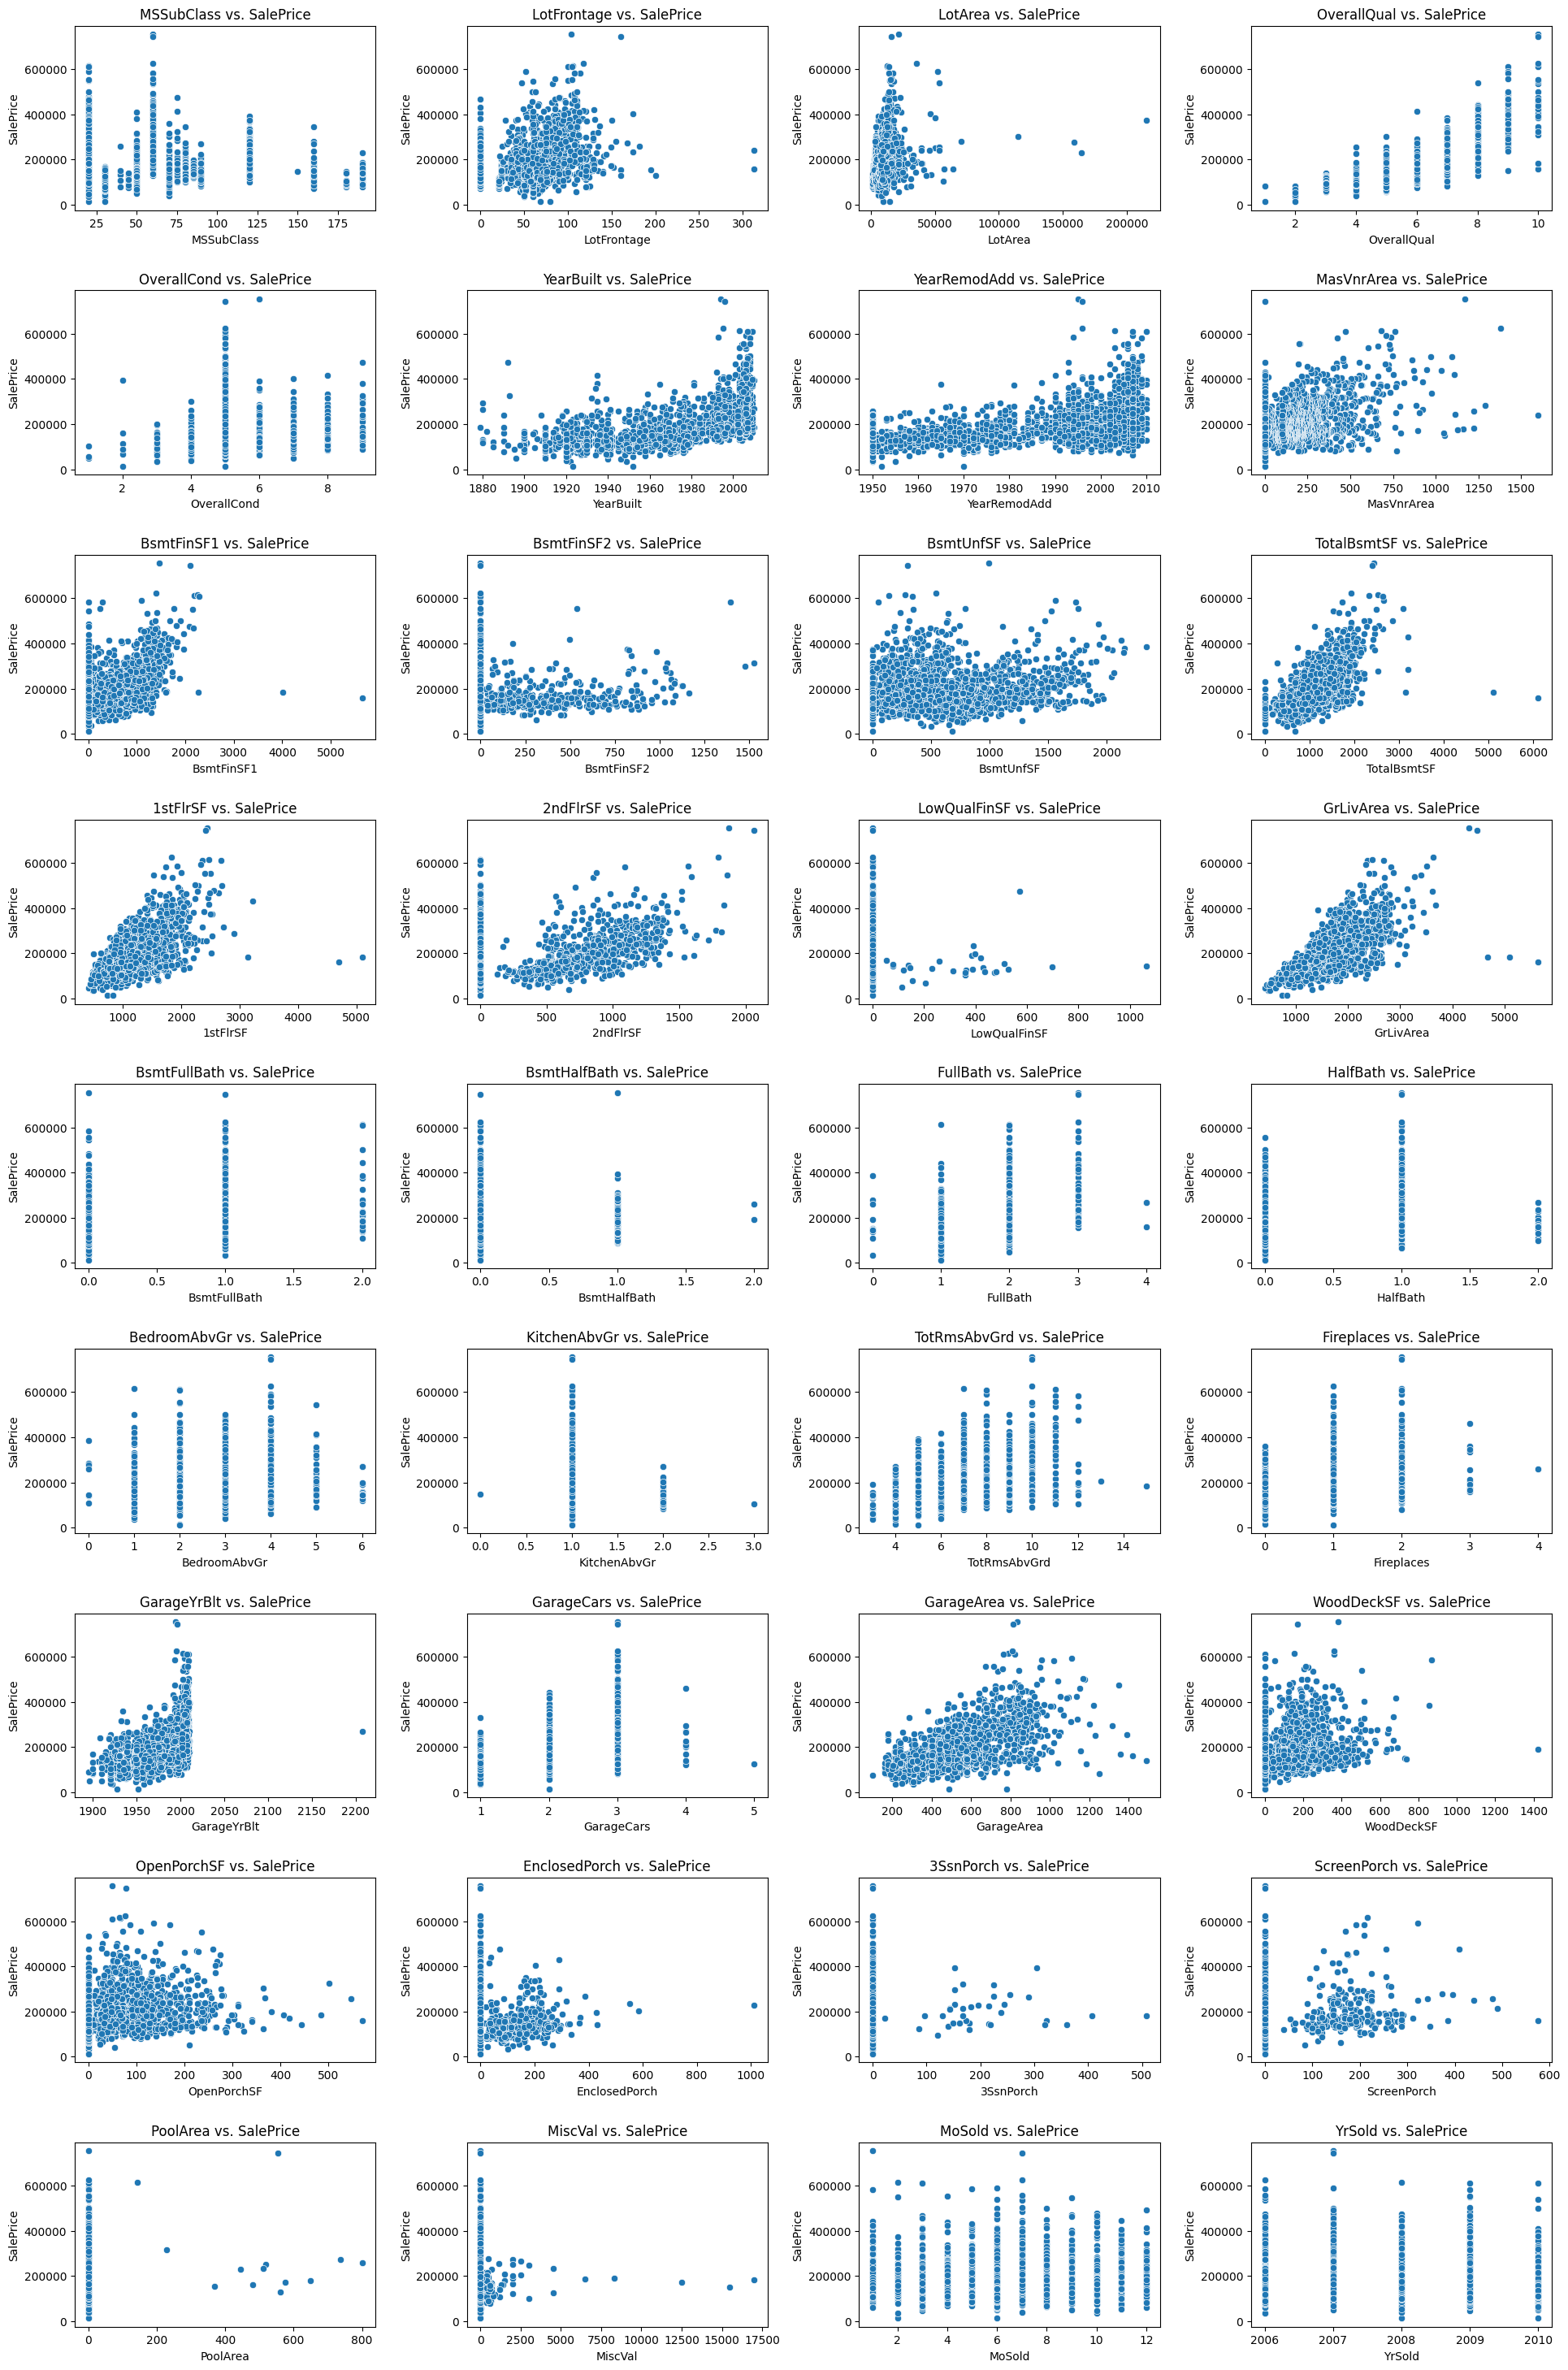

In [16]:
# Scatter plots for all numerical features against SalePrice
num_features = ames_df.select_dtypes(include=[np.number]).columns.drop('SalePrice')
num_features_count = len(num_features)

# Determine the grid size
rows = int(np.ceil(num_features_count / 4))
cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 30))
fig.tight_layout(pad=5.0)

for i, feature in enumerate(num_features):
    row = i // cols
    col = i % cols
    sns.scatterplot(x=ames_df[feature], y=ames_df['SalePrice'], ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. SalePrice')
    axes[row, col].set_xlabel(feature)
    axes[row, col].set_ylabel('SalePrice')

# Remove any empty subplots
for j in range(i + 1, rows * cols):
    fig.delaxes(axes.flatten()[j])

print("Scatter plots for all numerical features vs. SalePrice:")
plt.show()

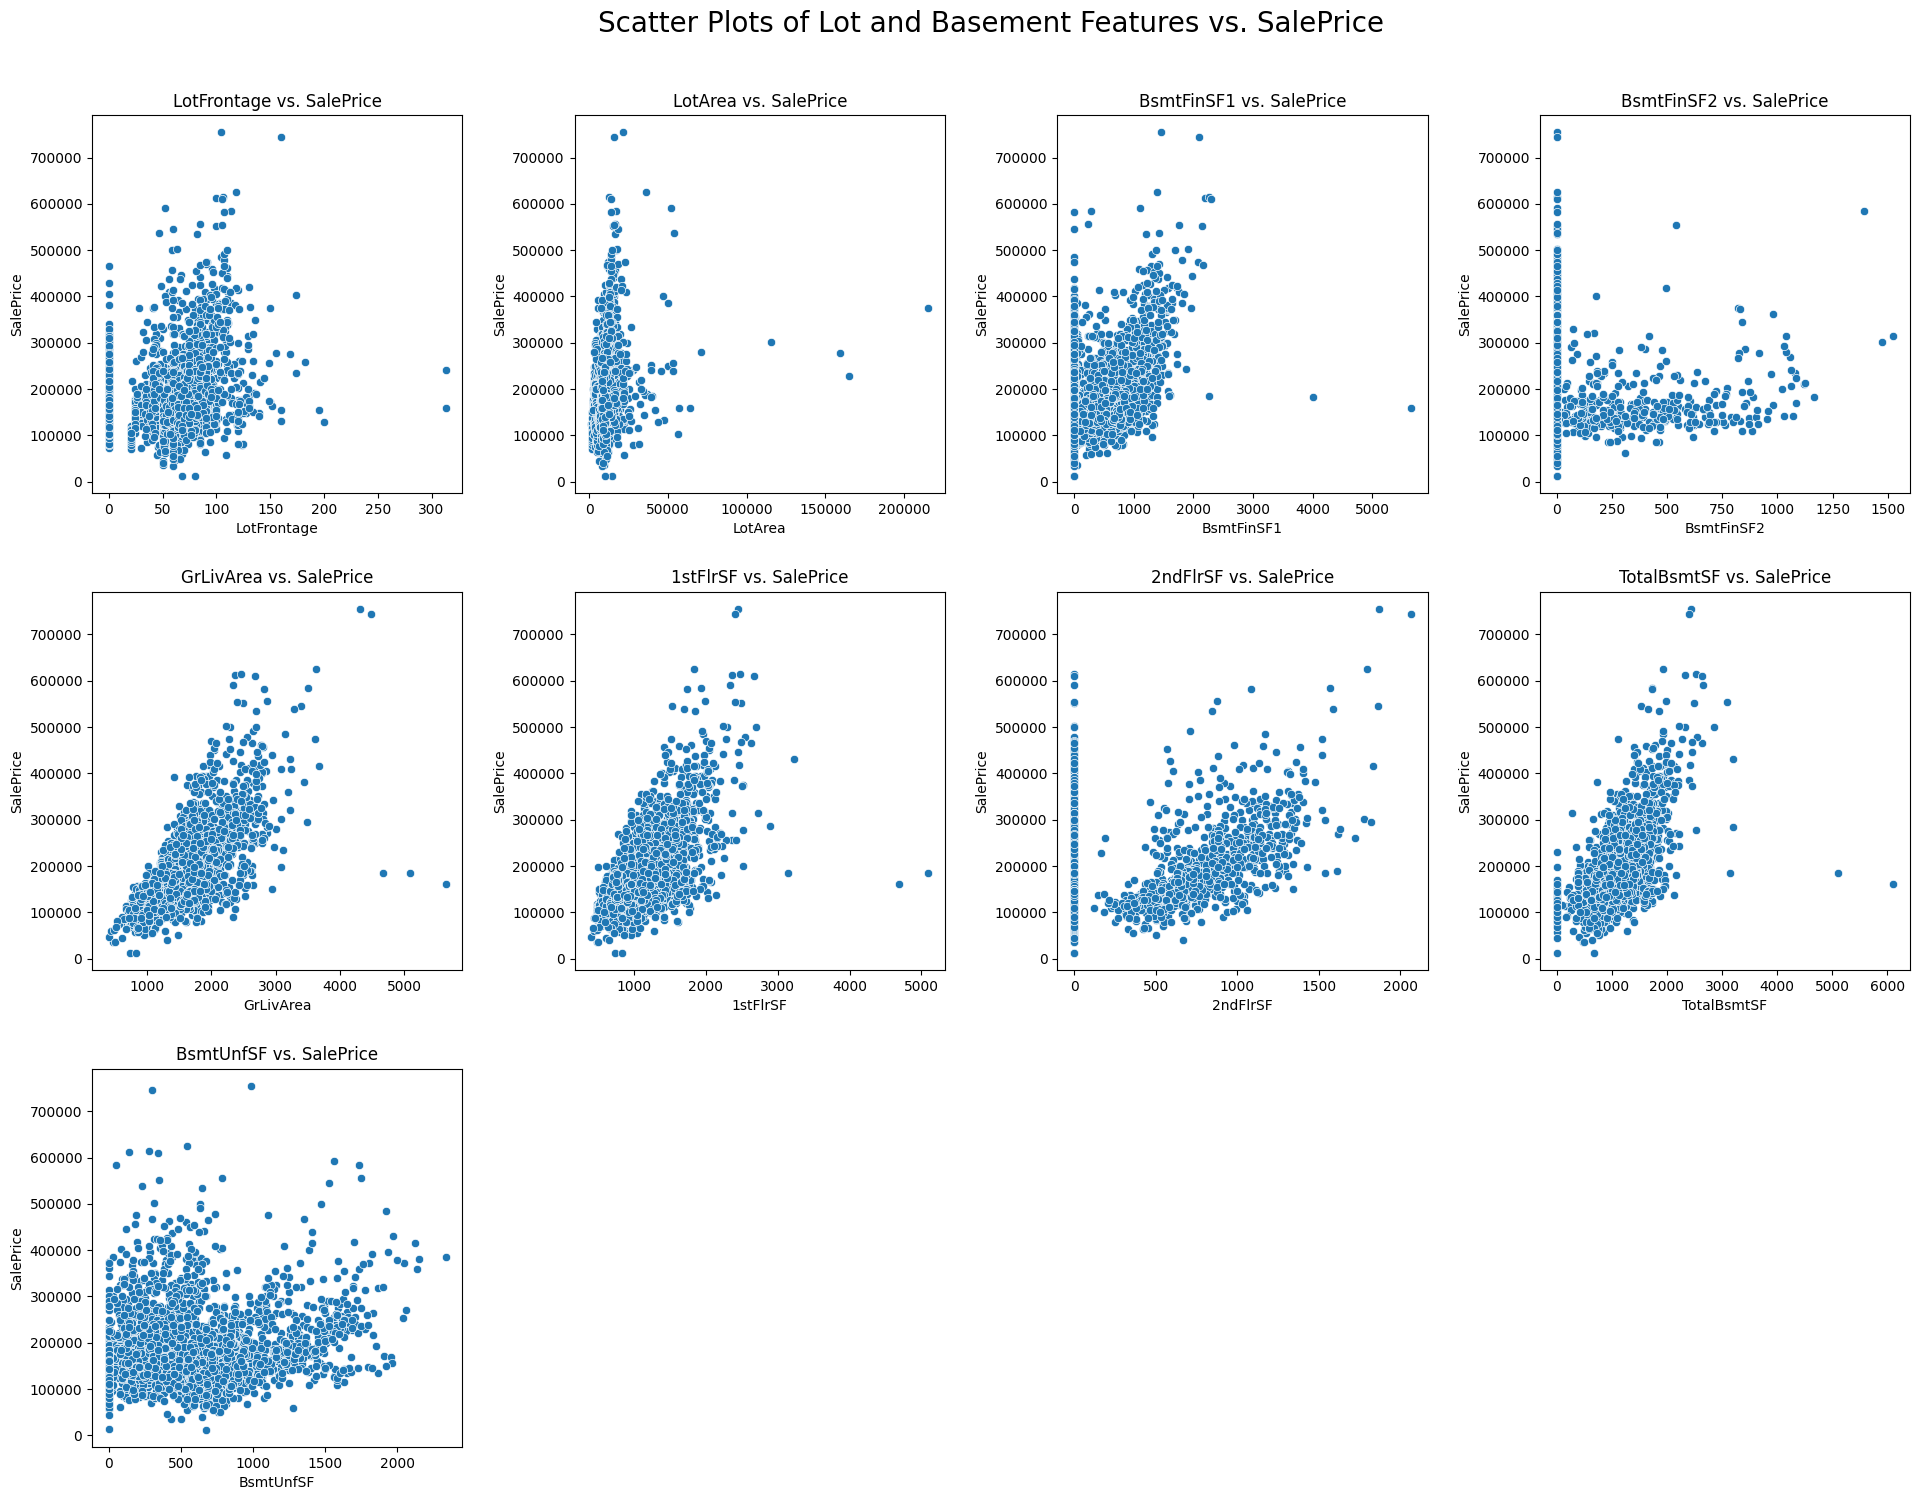

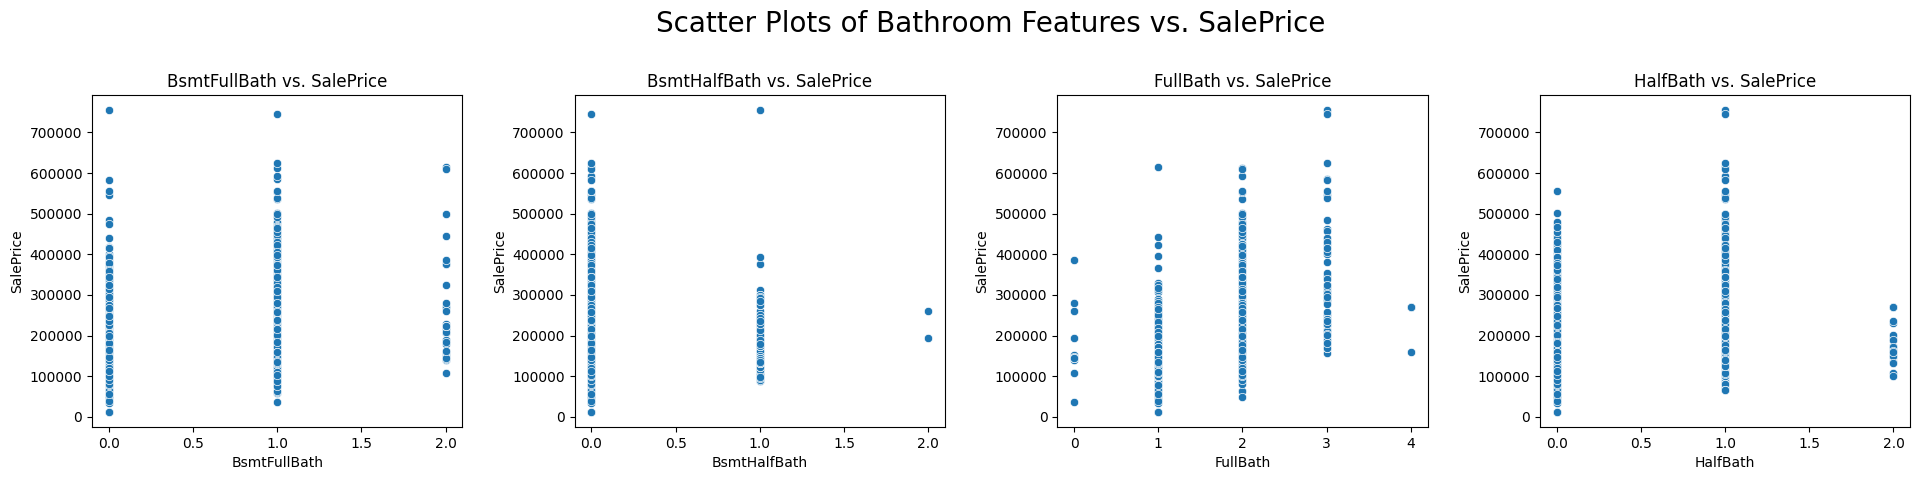

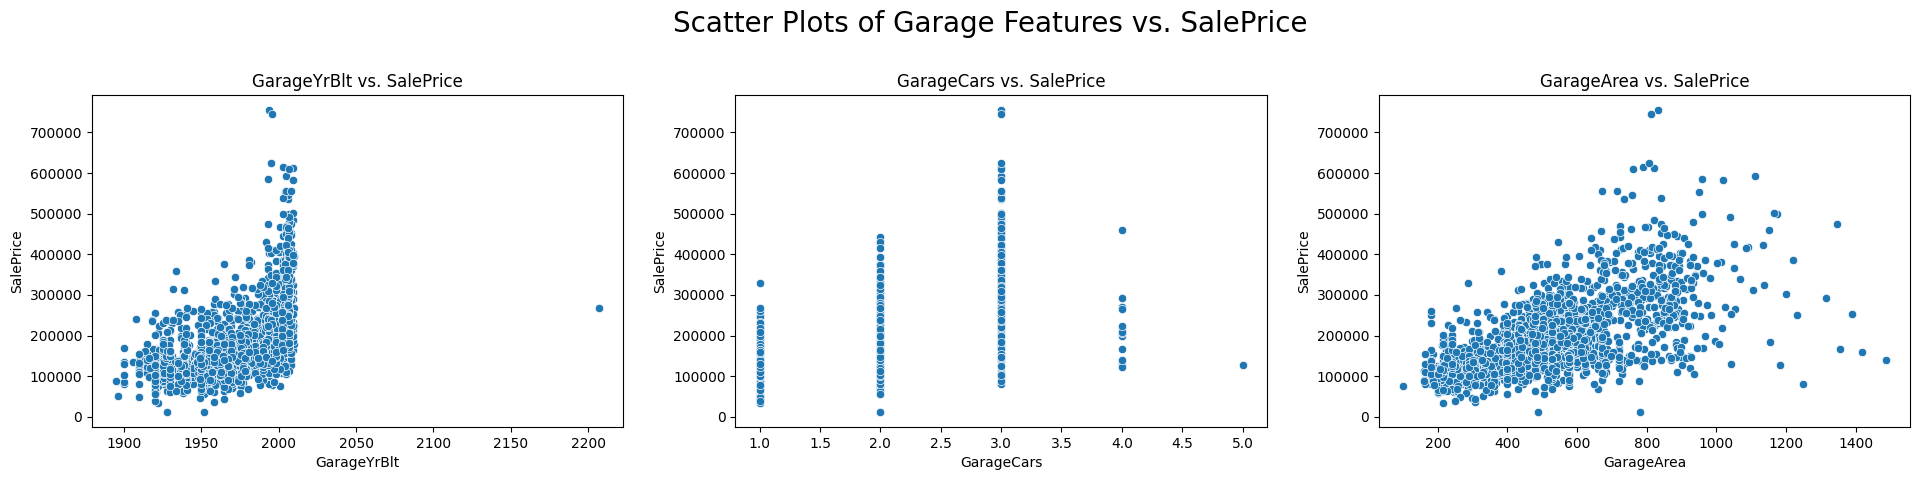

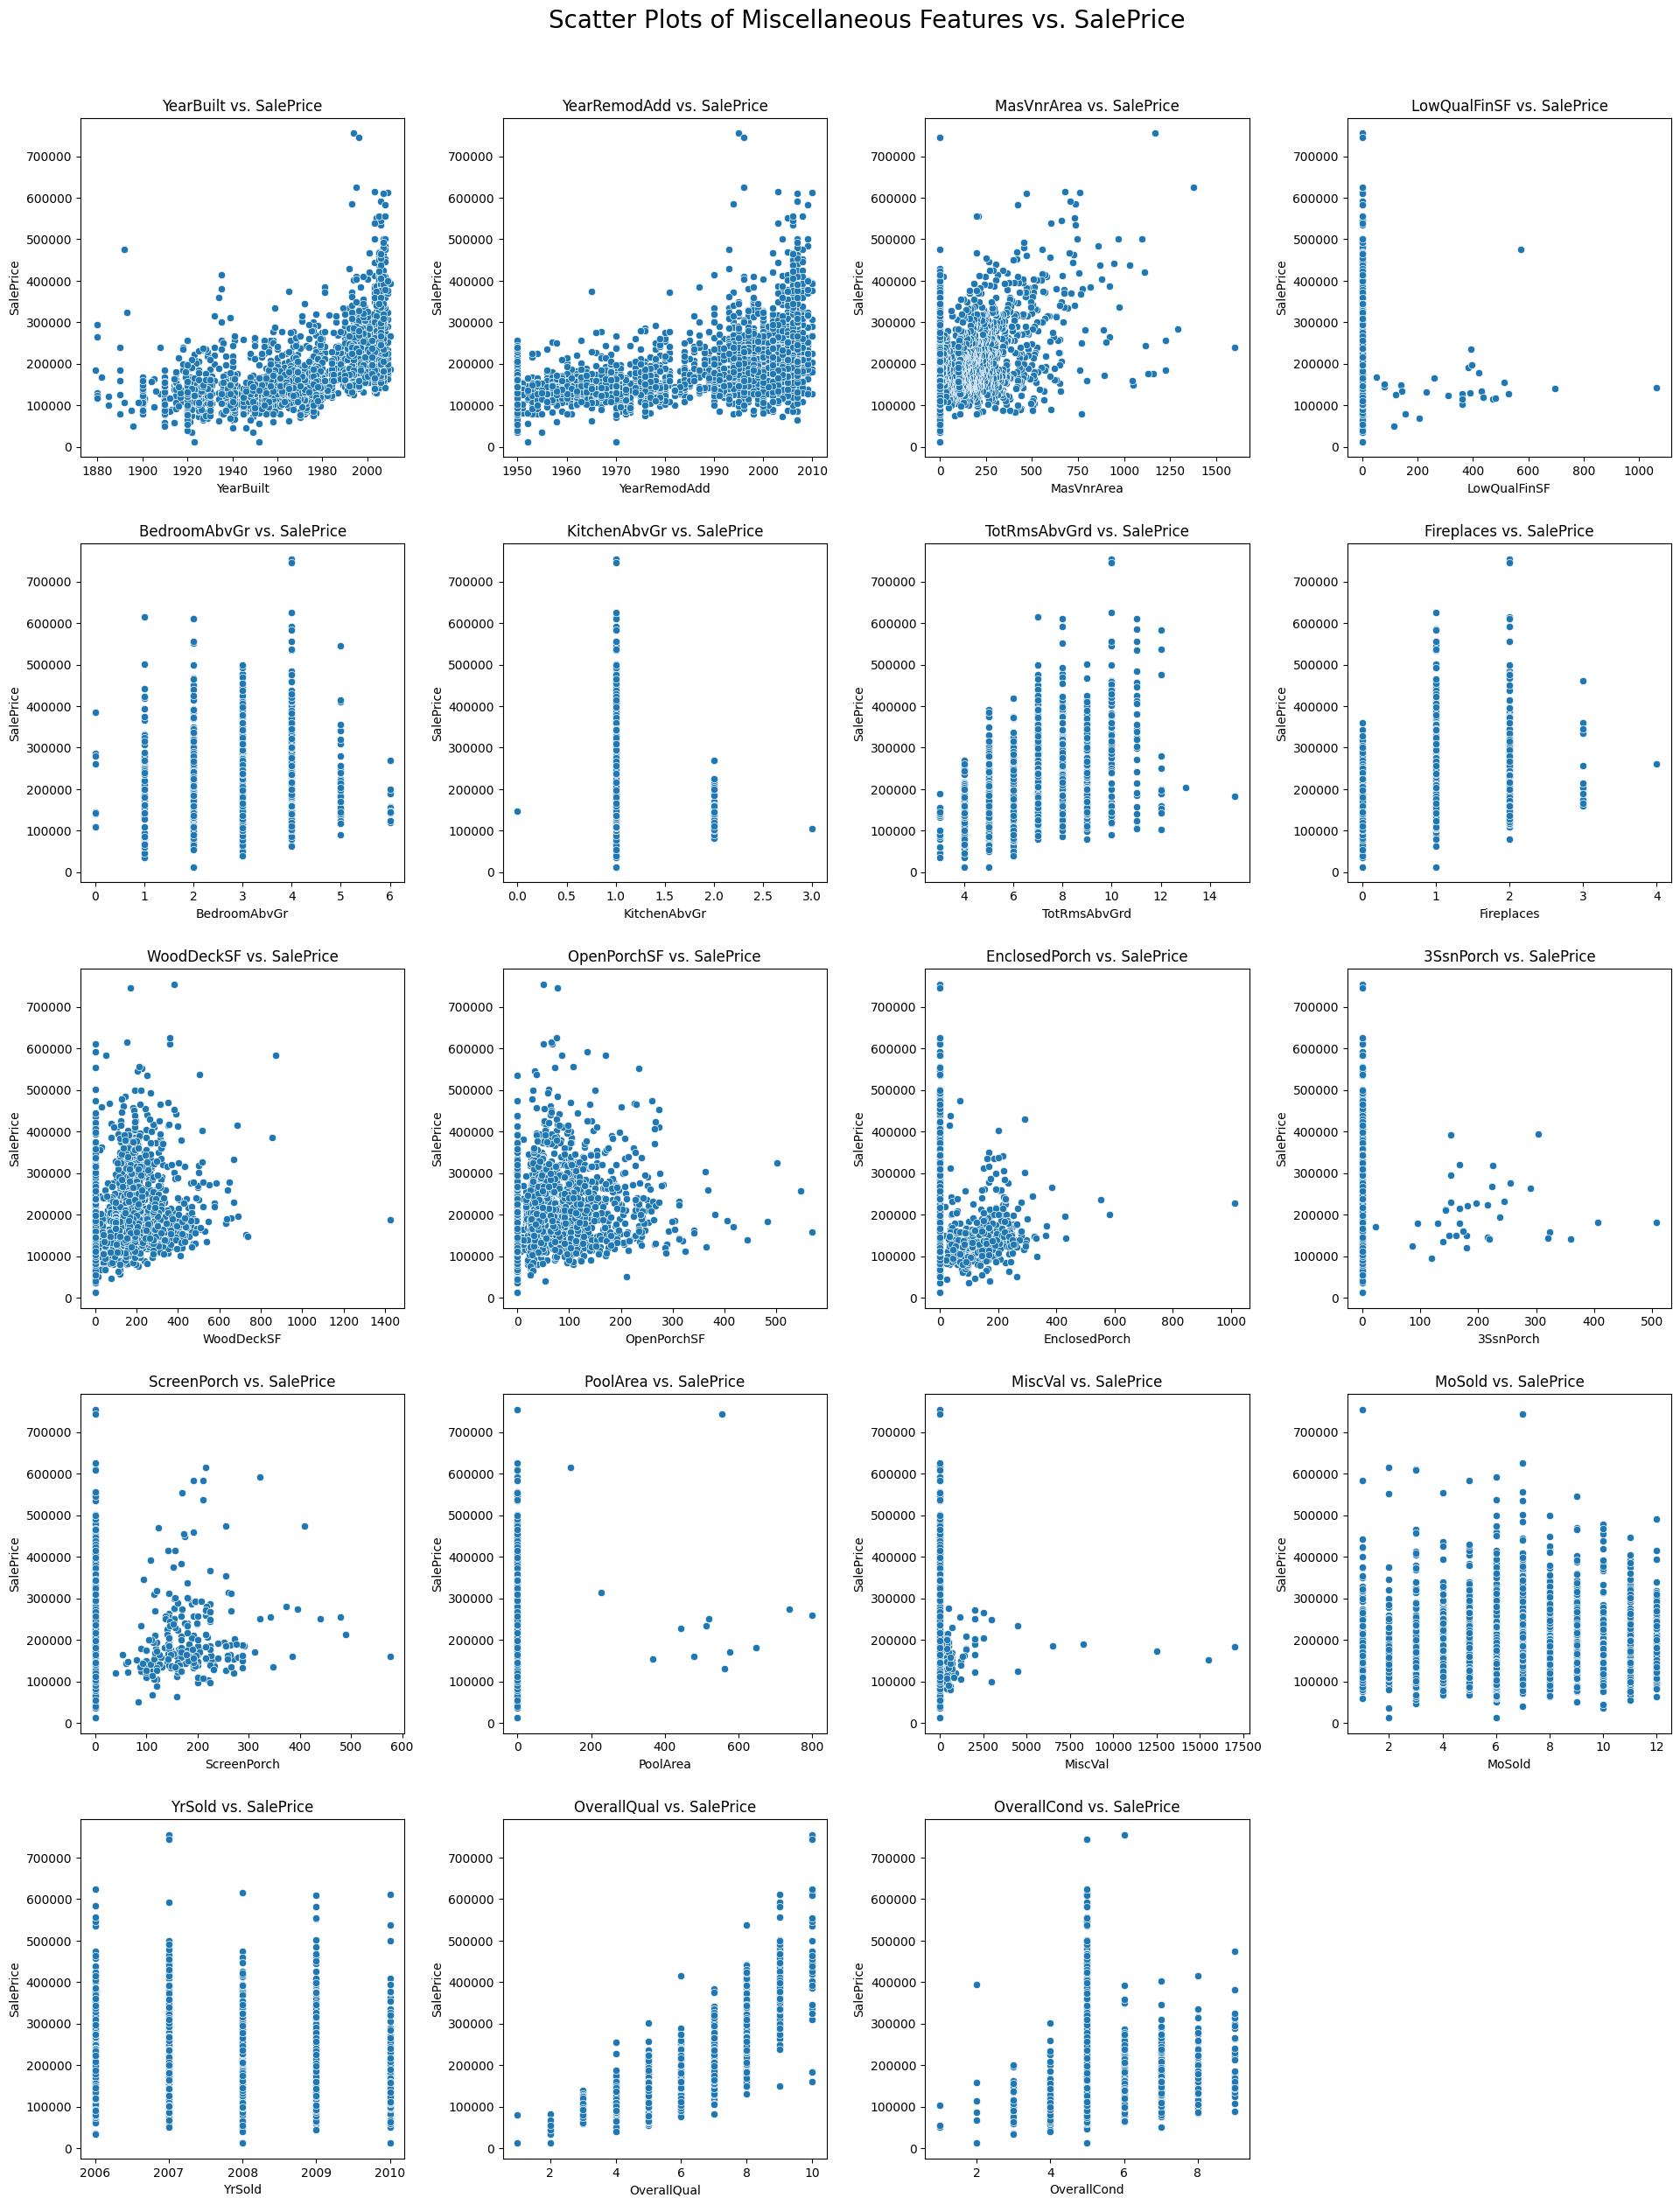

In [17]:
# Define groups of features, ensuring all numerical features are included
group1 = ['LotFrontage', 'LotArea', 'BsmtFinSF1', 'BsmtFinSF2', 'GrLivArea', '1stFlrSF', '2ndFlrSF', 'TotalBsmtSF', 'BsmtUnfSF']
group2 = ['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath']
group3 = ['GarageYrBlt', 'GarageCars', 'GarageArea']
group4 = ['YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'LowQualFinSF', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 
          'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'OverallQual', 'OverallCond']

# Function to plot scatter plots in a grid
def plot_scatter_group(features, title):
    num_features = len(features)
    rows = int(np.ceil(num_features / 4))
    cols = min(4, num_features)  # Ensure the number of columns doesn't exceed the number of features

    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), squeeze=False)
    fig.tight_layout(pad=5.0)
    
    for i, feature in enumerate(features):
        row = i // cols
        col = i % cols
        sns.scatterplot(x=ames_df[feature], y=ames_df['SalePrice'], ax=axes[row, col])
        axes[row, col].set_title(f'{feature} vs. SalePrice')
        axes[row, col].set_xlabel(feature)
        axes[row, col].set_ylabel('SalePrice')

    # Remove any empty subplots
    for j in range(i + 1, rows * cols):
        fig.delaxes(axes.flatten()[j])

    plt.suptitle(title, y=1.02, fontsize=20)
    plt.show()

# Plot each group
plot_scatter_group(group1, 'Scatter Plots of Lot and Basement Features vs. SalePrice')
plot_scatter_group(group2, 'Scatter Plots of Bathroom Features vs. SalePrice')
plot_scatter_group(group3, 'Scatter Plots of Garage Features vs. SalePrice')
plot_scatter_group(group4, 'Scatter Plots of Miscellaneous Features vs. SalePrice')


Interpretation of Scatter Plot Results
The scatter plots to visualize the relationships between each numerical feature and the target variable SalePrice. Here are some of our observations:

1.	MSSubClass vs. SalePrice:
	No clear relationship is observed. This suggests that the house subclass (building class) may not have a strong linear correlation with SalePrice.
    
2.	LotFrontage vs. SalePrice:
	The slight positive trend is consistent. Properties with larger frontages tend to have higher sale prices, but there is considerable variability.

3.	LotArea vs. SalePrice:
	The weak positive correlation is evident. Larger lots can sell for higher prices, but other factors also play significant roles.

4.	OverallQual vs. SalePrice:
	Strong positive correlation, indicating that higher overall quality ratings are associated with higher sale prices.

5.	OverallCond vs. SalePrice:
	Weak positive trend with variability, indicating that overall condition has a lesser impact on SalePrice compared to overall quality. They may be twin-brothers. 

6.	YearBuilt vs. SalePrice:
	Positive trend, indicating that newer homes tend to have higher sale prices.

7.	YearRemodAdd vs. SalePrice:
	Positive trend, similar to YearBuilt, indicating that recently remodeled homes tend to sell for higher prices.

8.	MasVnrArea vs. SalePrice:
	Slight positive correlation, suggesting that houses with more masonry veneer area tend to have higher sale prices.

9.	BsmtFinSF1 vs. SalePrice:
	Positive correlation, indicating that houses with more finished basement area tend to have higher sale prices.

10.	BsmtFinSF2 vs. SalePrice:
	No clear trend, indicating that the second type of finished basement area does not significantly correlate with SalePrice.

11.	BsmtUnfSF vs. SalePrice:
	Slight positive trend, indicating that houses with larger unfinished basement areas might have slightly higher sale prices.

12.	TotalBsmtSF vs. SalePrice:
	Strong positive correlation, indicating that larger total basement areas are associated with higher sale prices.

13.	1stFlrSF vs. SalePrice:
	Positive correlation, indicating that larger first-floor areas tend to have higher sale prices.

14.	2ndFlrSF vs. SalePrice:
	Positive correlation, indicating that houses with second floors tend to have higher sale prices.

15.	LowQualFinSF vs. SalePrice:
	No clear trend, indicating that low-quality finished square footage does not significantly impact SalePrice.

16.	GrLivArea vs. SalePrice:
	Strong positive correlation, indicating that larger ground living areas are associated with higher sale prices.

17.	BsmtFullBath vs. SalePrice:
	Positive trend, indicating that houses with more full bathrooms in the basement tend to have higher sale prices.

18.	BsmtHalfBath vs. SalePrice:
	No clear trend, suggesting that half bathrooms in the basement do not significantly impact SalePrice.

19.	FullBath vs. SalePrice:
	Positive correlation, indicating that houses with more full bathrooms tend to have higher sale prices.

20.	HalfBath vs. SalePrice:
	Slight positive trend, indicating that houses with more half bathrooms may have higher sale prices, but the impact is less pronounced.

21.	BedroomAbvGr vs. SalePrice:
	Weak trend, indicating that the number of bedrooms above grade does not strongly correlate with SalePrice.

22.	KitchenAbvGr vs. SalePrice:
	Weak trend, indicating that the number of kitchens above grade does not strongly correlate with SalePrice.

23.	TotRmsAbvGrd vs. SalePrice:
	Positive trend, indicating that houses with more total rooms above grade tend to have higher sale prices.

24.	Fireplaces vs. SalePrice:
	Positive trend, indicating that houses with more fireplaces tend to have higher sale prices.

25.	GarageYrBlt vs. SalePrice:
	Positive trend, indicating that newer garages are associated with higher sale prices.

26.	GarageCars vs. SalePrice:
	Positive correlation, indicating that houses with more garage spaces tend to have higher sale prices.

27.	GarageArea vs. SalePrice:
	Strong positive correlation, indicating that larger garage areas are associated with higher sale prices.

28.	WoodDeckSF vs. SalePrice:
	Positive trend, indicating that houses with larger wood decks tend to have higher sale prices.

29.	OpenPorchSF vs. SalePrice:
	Slight positive trend, indicating that houses with larger open porches may have higher sale prices.

30.	EnclosedPorch vs. SalePrice:
	No clear trend, suggesting that enclosed porches do not significantly impact SalePrice.

31.	3SsnPorch vs. SalePrice:
	Weak trend, indicating that three-season porches do not strongly correlate with SalePrice.

32.	ScreenPorch vs. SalePrice:
	Slight positive trend, indicating that houses with larger screened porches may have higher sale prices.

33.	PoolArea vs. SalePrice:
	Slight positive trend with variability, indicating that houses with pool areas may have higher sale prices, but other factors play a significant role.

34.	MiscVal vs. SalePrice:
	No clear trend, suggesting that miscellaneous values do not significantly impact SalePrice.

35.	MoSold vs. SalePrice:
	No clear trend, indicating that the month of sale does not significantly impact SalePrice.
	
36.	YrSold vs. SalePrice:
	Weak trend, indicating that the year of sale does not strongly correlate with SalePrice.

These scatter plots provide insights into which features have strong linear relationships with SalePrice, guiding further analysis and feature selection for predictive modeling.


**4. Multivariate Analysis**

Examine the relationships between multiple variables simultaneously to identify patterns and interactions that may not be evident in univariate or bi-variate analyses.

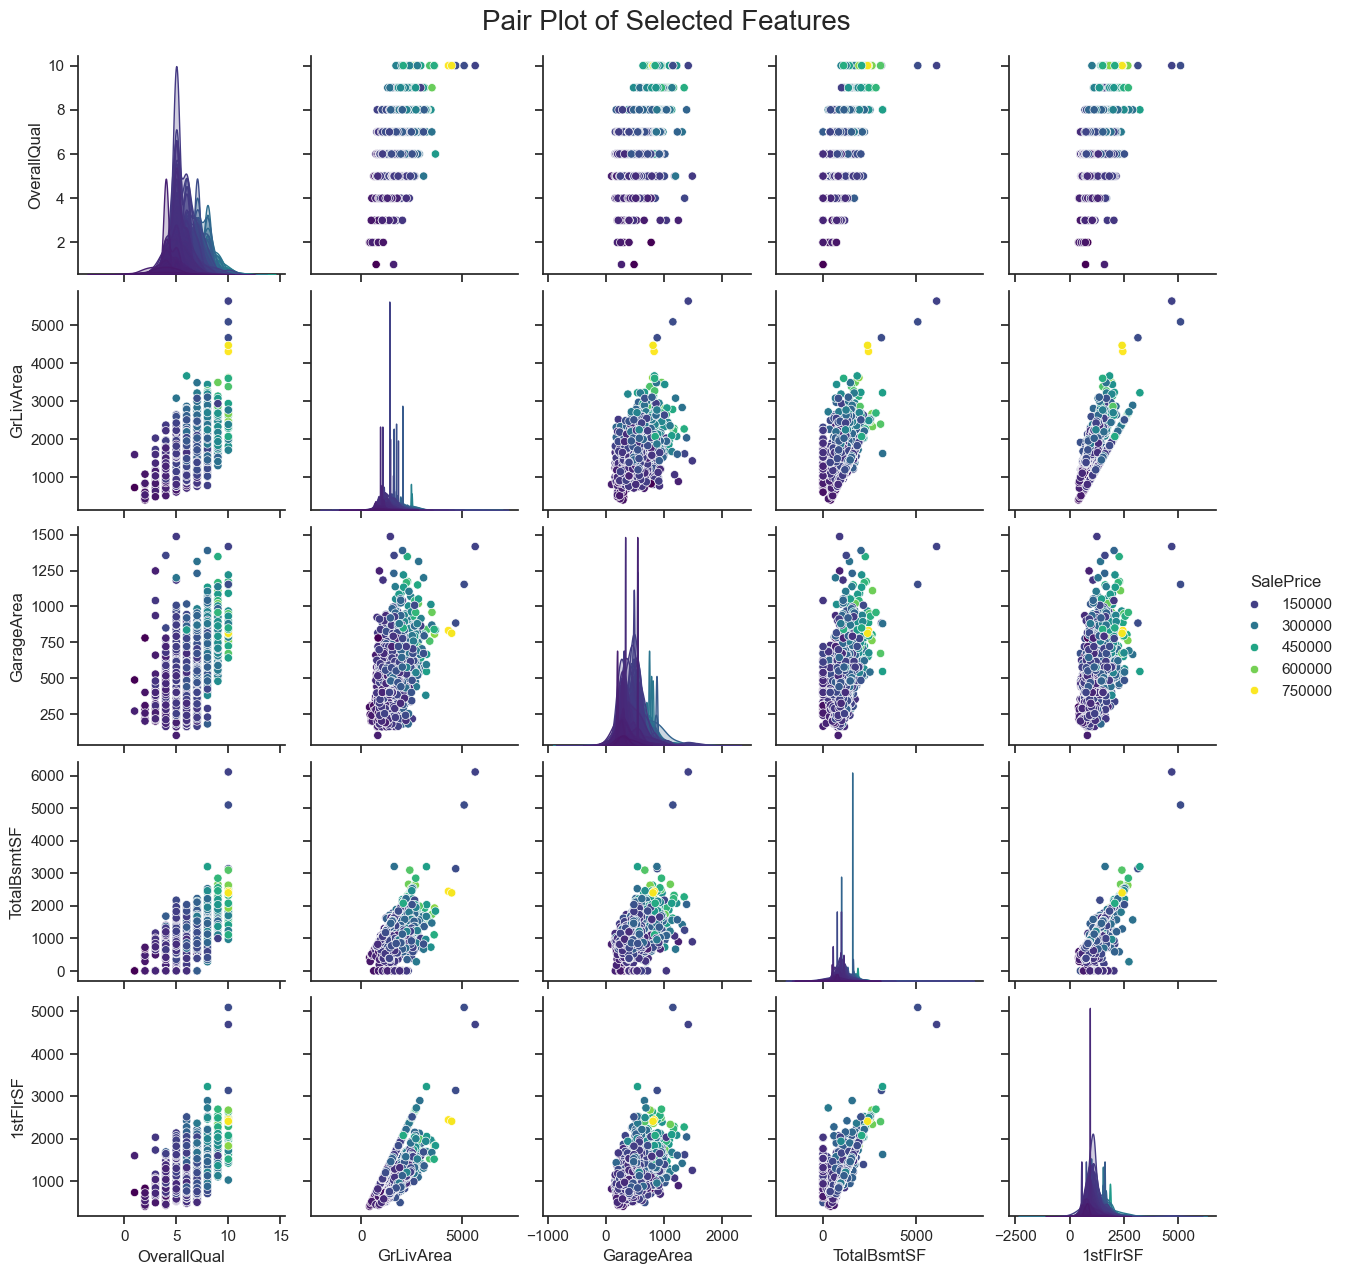

In [18]:
# Pair Plot for Selected Features
sns.set_theme(style="ticks")
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
sns.pairplot(ames_df[selected_features],  height=2.5, hue='SalePrice', palette='viridis')
plt.suptitle('Pair Plot of Selected Features', y=1.02, fontsize=20)
plt.show()

In [19]:
# Select only numeric columns
numeric_cols = ames_df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_cols.corr()

# Display the first few rows of the correlation matrix to verify it's calculated correctly
print("Correlation Matrix:")
correlation_matrix.head()

Correlation Matrix:


MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass     1.000000    -0.241305 -0.201164     0.068627    -0.092130   
LotFrontage   -0.241305     1.000000  0.129262     0.132838    -0.037990   
LotArea       -0.201164     0.129262  1.000000     0.082465    -0.039433   
OverallQual    0.068627     0.132838  0.082465     1.000000    -0.142401   
OverallCond   -0.092130    -0.037990 -0.039433    -0.142401     1.000000   

             YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  \
MSSubClass    0.076145      0.059534    0.013710   -0.058586   -0.074468  ...   
LotFrontage   0.025982      0.067657    0.112463    0.070811   -0.006511  ...   
LotArea       0.006888      0.007057    0.121275    0.188879    0.081328  ...   
OverallQual   0.597021      0.570787    0.421403    0.269883   -0.057624  ...   
OverallCond  -0.408843      0.008934   -0.146983   -0.062213    0.040556  ...   

             WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
MSSubClass    -0.010853    -0.011138      -0.040988  -0.037456    -0.047331   
LotFrontage    0.000381     0.087803       0.027654   0.004533     0.045328   
LotArea        0.153340     0.097322       0.028095   0.015790     0.051538   
OverallQual    0.241177     0.311514      -0.133931   0.014844     0.027452   
OverallCond    0.008358    -0.093789       0.077011   0.043246     0.042483   

             PoolArea   MiscVal    MoSold    YrSold  SalePrice  
MSSubClass  -0.001956 -0.036852  0.002901 -0.022596  -0.068011  
LotFrontage  0.111173  0.002219  0.016900 -0.015209   0.205376  
LotArea      0.093812  0.072000  0.003033 -0.023983   0.253793  
OverallQual  0.027952  0.008916  0.027990 -0.014850   0.795773  
OverallCond -0.018413  0.037395 -0.002591  0.042039  -0.133073  

[5 rows x 37 columns]

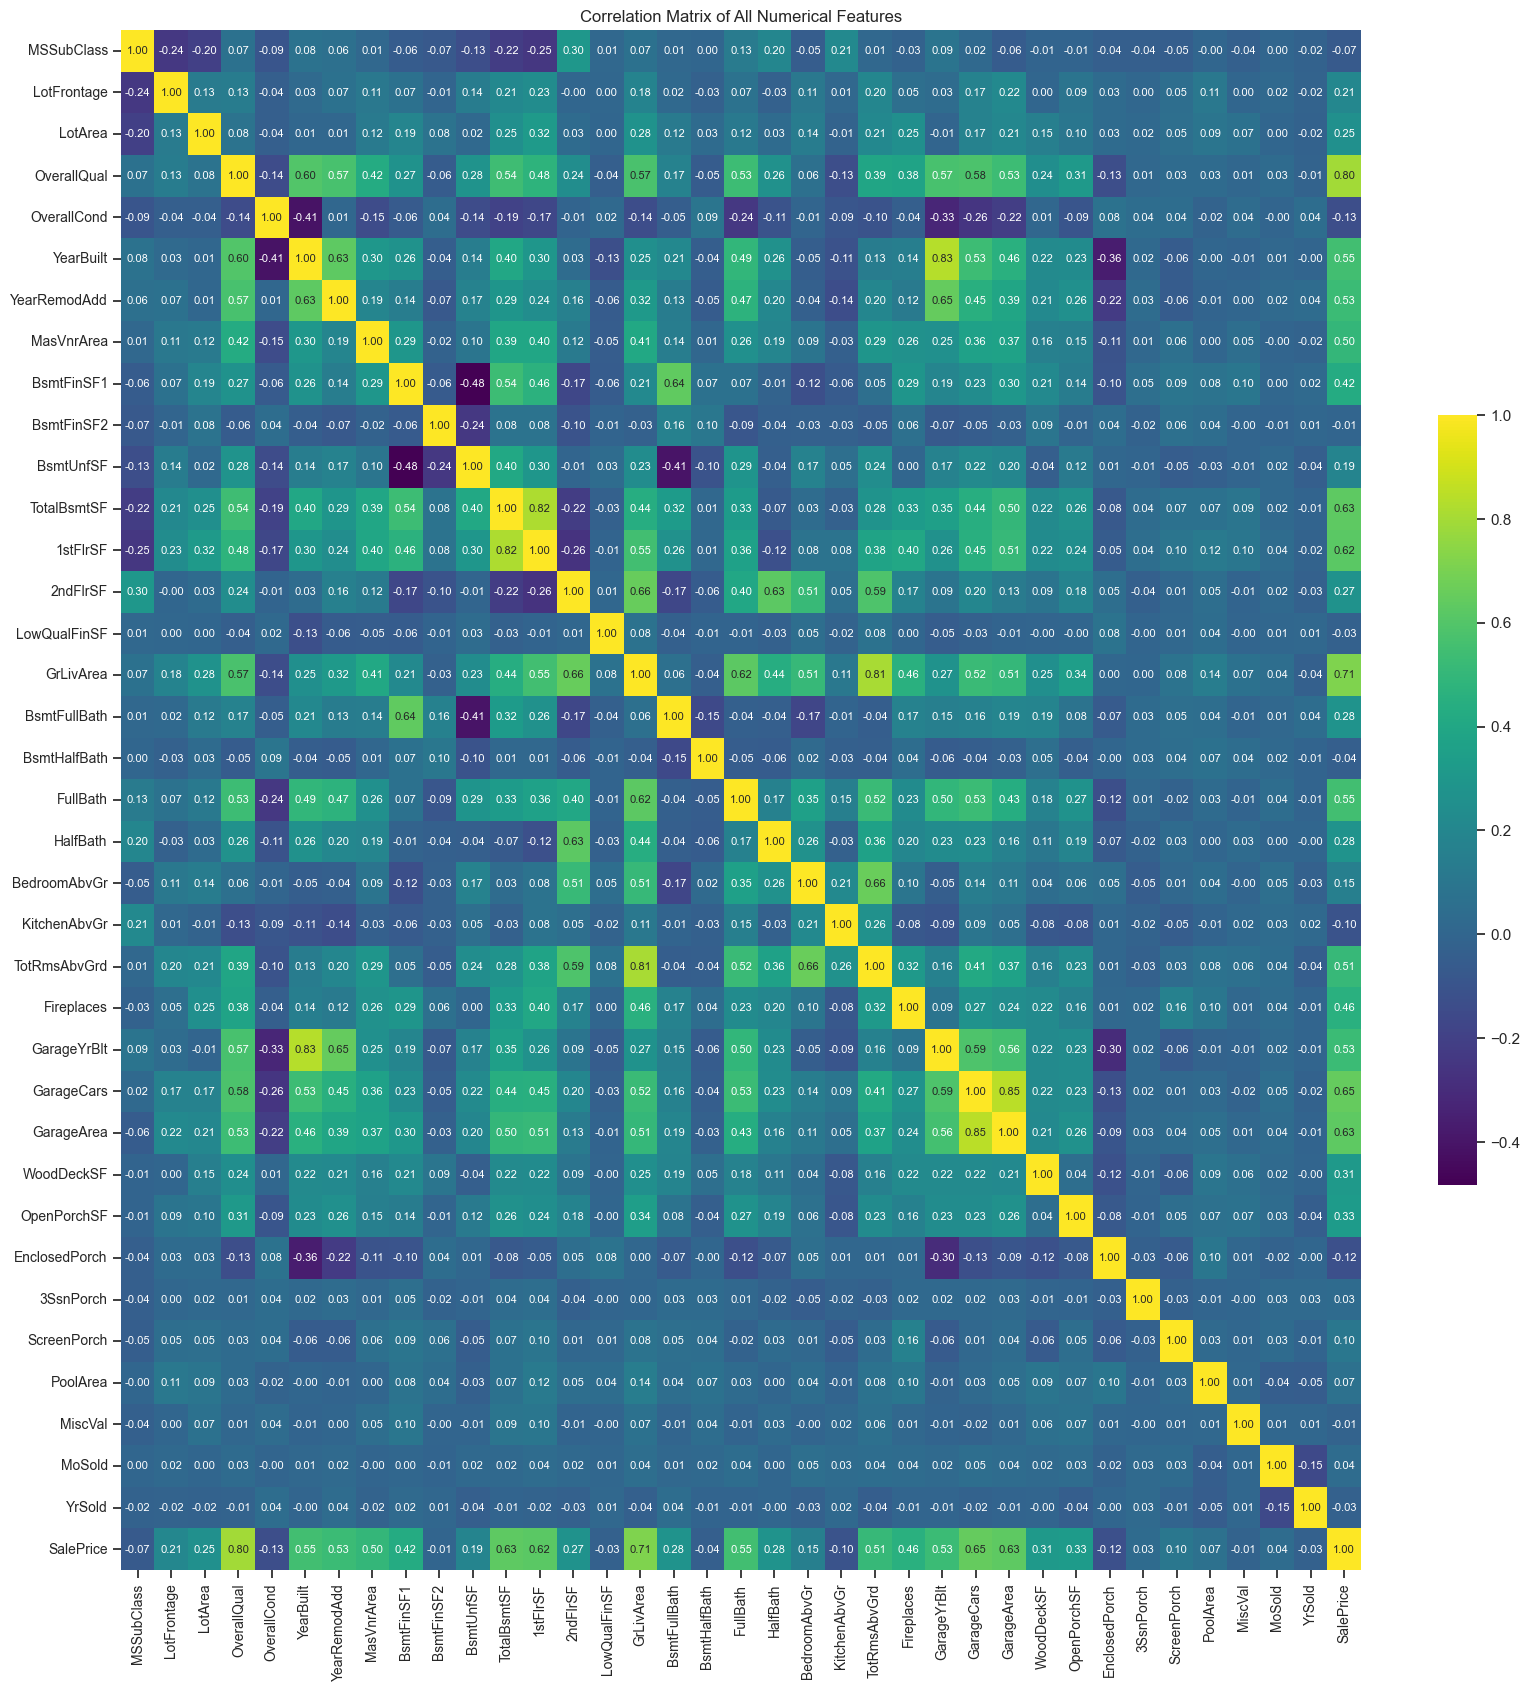

In [20]:
# Display the correlation matrix above, as a heatmap
# Function to adjust tick labels
def adjust_tick_labels(ax):
    for tick in ax.get_xticklabels():
        tick.set_rotation(90)
    for tick in ax.get_yticklabels():
        tick.set_rotation(0)

# Example usage in a heatmap with the selected correlation matrix
plt.figure(figsize=(20, 20))

# Plot the heatmap with adjusted annotation font size
sns.heatmap(correlation_matrix, annot=True, annot_kws={"size": 8}, cmap='viridis', fmt=".2f",
            cbar_kws={'shrink': 0.5})  # Shrink the color bar

# Adjust tick labels
ax = plt.gca()
adjust_tick_labels(ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Correlation Matrix of All Numerical Features')
plt.show()

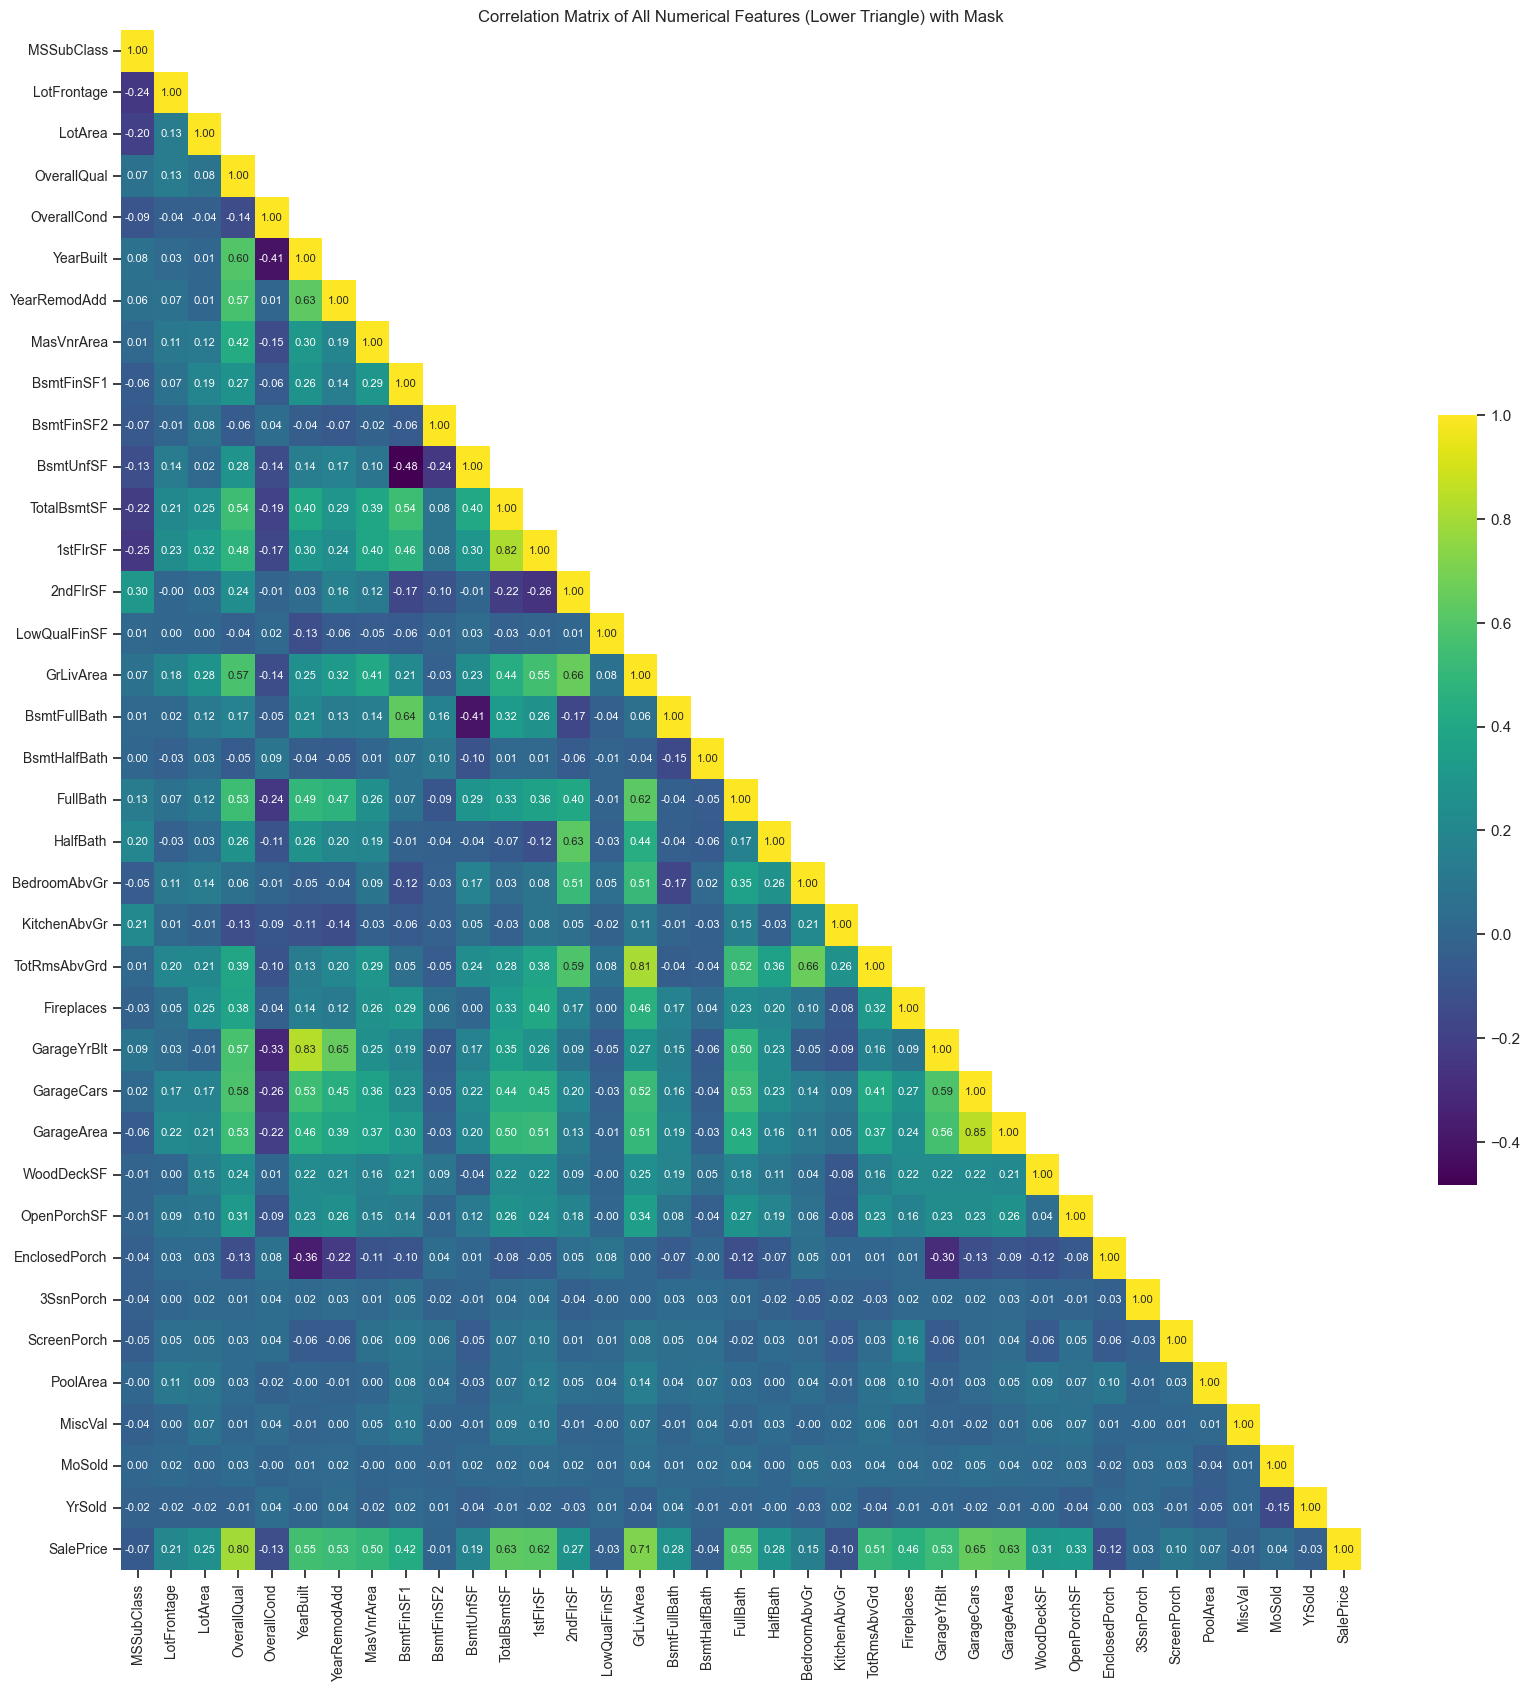

In [21]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)   # k=1 to exclude the diagonal from masking

# Plot the heatmap with the mask
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, mask=mask, annot=True, annot_kws={"size": 8}, cmap='viridis', fmt=".2f",
            cbar_kws={'shrink': 0.5})  # Shrink the color bar

# Adjust tick labels
ax = plt.gca()
adjust_tick_labels(ax)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.title('Correlation Matrix of All Numerical Features (Lower Triangle) with Mask')
plt.show()

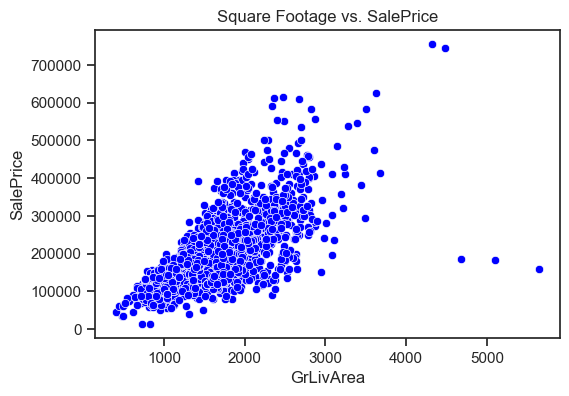

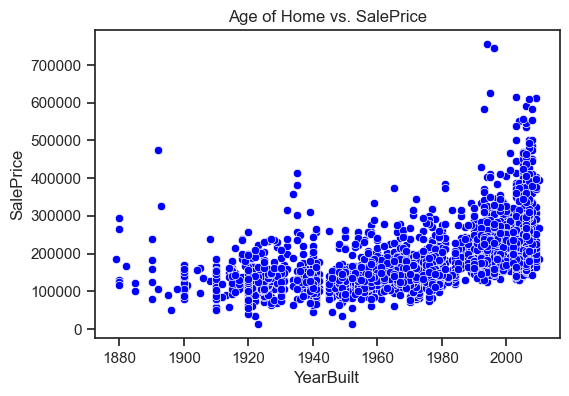

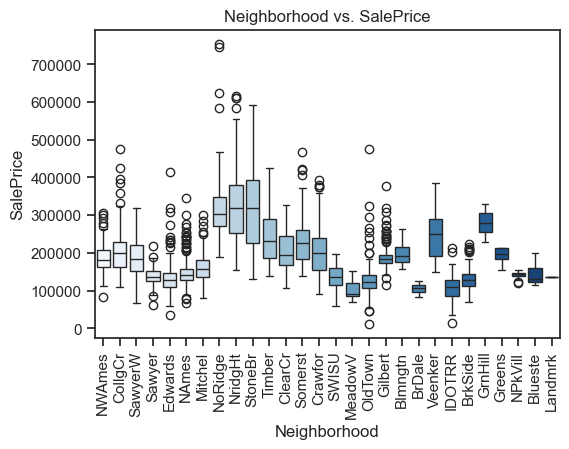

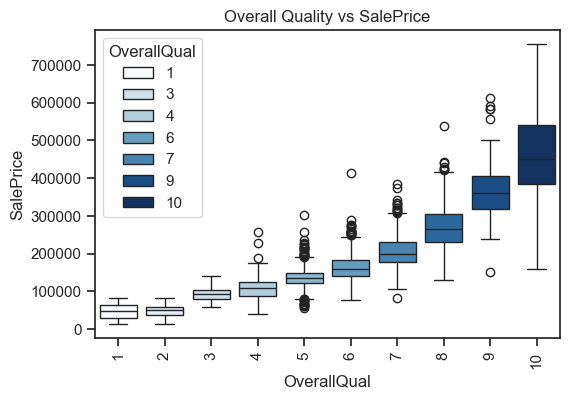

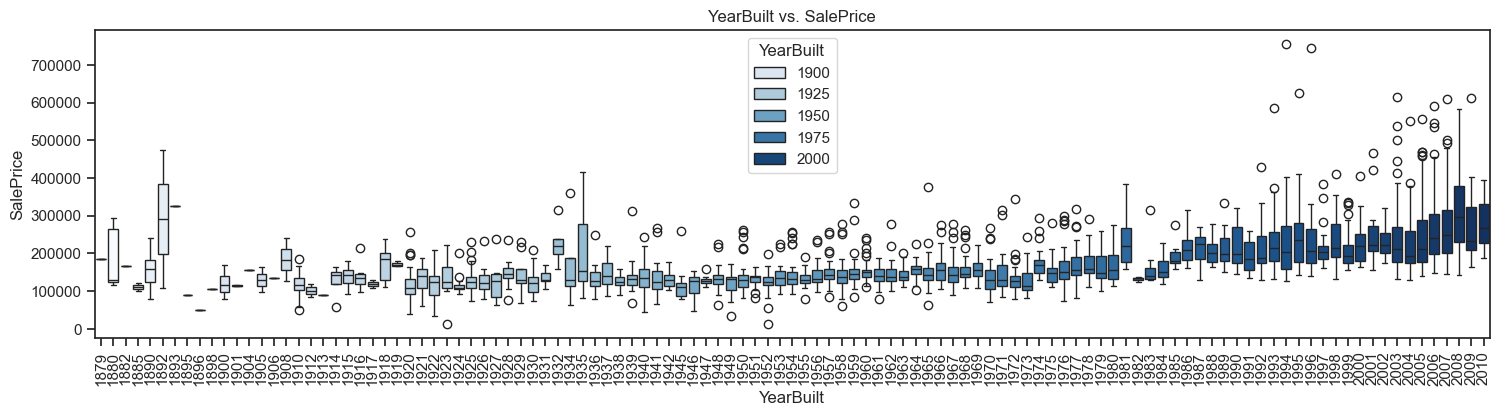

In [22]:
# Scatter plot of square footage vs. house price
plt.figure(figsize=(6, 4))  # Set the figure size
sns.scatterplot(x='GrLivArea', y='SalePrice', data=ames_df, color = 'blue')  # Create a scatter plot for square footage (GrLivArea) vs. house price (SalePrice)
plt.title('Square Footage vs. SalePrice')  # Add a title to the plot
plt.show()  # Display the plot

# Scatter plot of age of home vs. house price
plt.figure(figsize=(6, 4))  # Set the figure size
sns.scatterplot(x='YearBuilt', y='SalePrice', data=ames_df, color = 'blue')  # Create a scatter plot for the age of home (YearBuilt) vs. house price (SalePrice)
plt.title('Age of Home vs. SalePrice')  # Add a title to the plot
plt.show()  # Display the plot

# Boxplot of neighborhood vs. house price
plt.figure(figsize=(6, 4))  # Set the figure size
sns.boxplot(x='Neighborhood', y='SalePrice', data=ames_df, hue='Neighborhood', palette = 'Blues')  # Create a box plot for neighborhood (Neighborhood) vs. house price (SalePrice)
plt.title('Neighborhood vs. SalePrice')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
plt.show()  # Display the plot

# Boxplot of neighborhood vs. house price
plt.figure(figsize=(6, 4))  # Set the figure size
sns.boxplot(x='OverallQual', y='SalePrice', data=ames_df, hue='OverallQual', palette = 'Blues')  # Create a box plot 
plt.title('Overall Quality vs SalePrice')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
plt.show()  # Display the plot

# Boxplot of year built vs. sale price
plt.figure(figsize=(18, 4))  # Set the figure size
sns.boxplot(x='YearBuilt', y='SalePrice', data=ames_df, hue='YearBuilt', palette = 'Blues')  # Create a box plot for year built (YearBuilt) vs. house price (SalePrice)
plt.title('YearBuilt vs. SalePrice')  # Add a title to the plot
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees for better readability
plt.show()  # Display the plot

### Summary of Initial EDA

In this initial step, we performed Exploratory Data Analysis (EDA) to understand the structure and characteristics of the Ames Housing dataset.

1. Loading the Dataset: The Ames Housing dataset is loaded into a pandas DataFrame from a CSV file.
2. Initial Examination:
    -   Displaying the first few rows and summary statistics to get an overview of the data.
    -   Listing column names and checking the number of rows and columns to understand the dataset's dimensions.
3. Identifying Missing Values: We identify columns with missing values & their counts to plan imputation strategies.
4. Visualizations:
    - Plotting the distribution of the target variable 'SalePrice' to understand its range and      distribution.
    - Generating scatter plots of key features against 'SalePrice' to visually inspect relationships.
    - Frequency distribution of categorical features.
    - Box plots of categorical features vs. SalePrice.
    - Correlation heatmap of numerical features.

These initial analyses help in making informed decisions about necessary preprocessing steps, ensuring the dataset is clean and ready for modeling.

Notably, we observed that GarageCars and GarageArea are likely to be highly correlated because the number of cars a garage can hold is directly related to the size of the garage. Keeping both might introduce multi-co-linearity into the model. To avoid this, we may need to drop one of these features in the preprocessing step, after examining the correlation between them. 

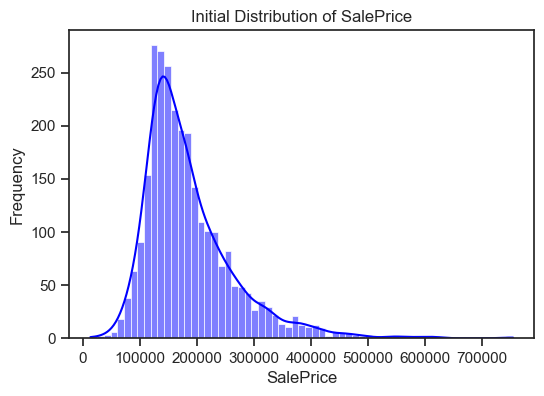

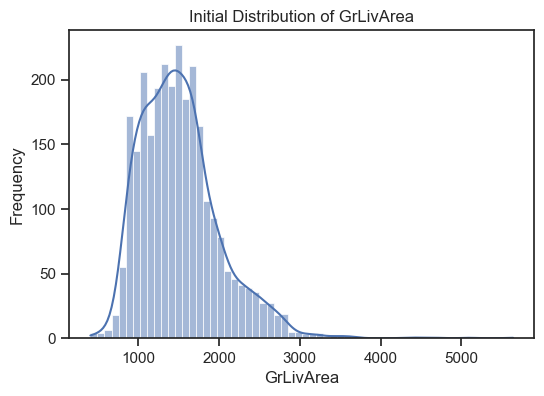

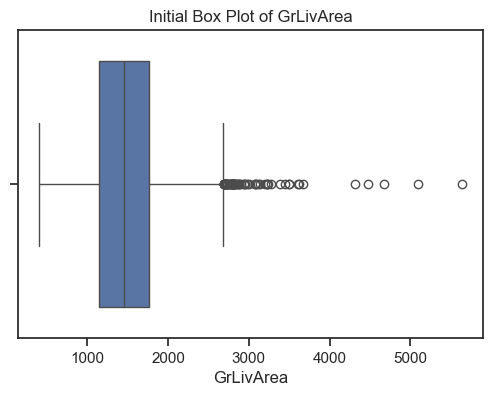

In [23]:
# Pre-Processing
# Plot the initial distribution of 'SalePrice'
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice'], kde=True, color='blue')
plt.title('Initial Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Plot the initial distribution of 'GrLivArea'
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['GrLivArea'], kde=True)
plt.title('Initial Distribution of GrLivArea')
plt.xlabel('GrLivArea')
plt.ylabel('Frequency')
plt.show()

# Visualize 'GrLivArea' with outliers highlighted (initial)
plt.figure(figsize=(6, 4))
sns.boxplot(x=ames_df['GrLivArea'])
plt.title('Initial Box Plot of GrLivArea')
plt.xlabel('GrLivArea')
plt.show()

## II. Data Preparation
Data preparation involves handling missing values, encoding categorical variables, and selecting relevant features for modeling.

**1. Handling Missing Values:**

- Identify columns with missing values and their counts.
- Impute missing values for numerical columns using the median strategy.
- Impute missing values for categorical columns using the most frequent value strategy.
- Ensure no missing values remain after imputation.

**2. Encoding Categorical Variables:**

- Convert categorical variables into dummy/indicator variables using one-hot encoding.

**3. Standardizing Numerical Features:**

- Standardize all numerical features except 'SalePrice' using StandardScaler.
- Scale 'SalePrice' separately to facilitate easier inversion of the scaling during final reporting.

**4. Removing Outliers:**

- Remove outliers based on GrLivArea to ensure the dataset is not skewed by extreme values.
- Specifically, rows where GrLivArea is greater than 4000 square feet are dropped.

## **Preprocessing**

In [20]:
# Load the Ames dataset
file_path = '../data/AmesData.csv'
ames_df = pd.read_csv(file_path)

# Identify columns with missing values
missing_values = ames_df.isnull().sum()
print("\nColumns with missing values and their counts before preprocessing:")
print(missing_values[missing_values > 0])

# Specifically replace blanks in 'MasVnrArea' with 0
ames_df.replace({'MasVnrArea': 'nan'}, 0, inplace=True)

# Identify columns with missing values
missing_values = ames_df.isnull().sum()
print("\nColumns with missing values and their counts before preprocessing:")
print(missing_values[missing_values > 0])

# Handle missing values for numerical columns
num_imputer = SimpleImputer(strategy='median')
num_cols_with_missing = ames_df.select_dtypes(include=[np.number]).columns[ames_df.select_dtypes(include=[np.number]).isnull().any()].tolist()
ames_df[num_cols_with_missing] = num_imputer.fit_transform(ames_df[num_cols_with_missing])

# Handle missing values for categorical columns
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_cols_with_missing = ames_df.select_dtypes(exclude=[np.number]).columns[ames_df.select_dtypes(exclude=[np.number]).isnull().any()].tolist()
ames_df[cat_cols_with_missing] = cat_imputer.fit_transform(ames_df[cat_cols_with_missing])

# Ensure no missing values remain
print("\nColumns with missing values after imputation and their counts:")
print(ames_df.isnull().sum()[ames_df.isnull().sum() > 0])

# Convert boolean columns to integer
bool_cols = ames_df.select_dtypes(include=[bool]).columns.tolist()
ames_df[bool_cols] = ames_df[bool_cols].astype(int)

# Check the number of rows and columns in the dataset before outlier removal
num_rows, num_columns = ames_df.shape
print(f"\nThe dataset contains {num_rows} rows and {num_columns} columns before outlier removal.")

# Remove outliers based on 'GrLivArea'
initial_row_count = ames_df.shape[0]
ames_df = ames_df.drop(ames_df[ames_df['GrLivArea'] > 4000].index)
final_row_count = ames_df.shape[0]
print(f"Number of rows removed based on 'GrLivArea' > 4000: {initial_row_count - final_row_count}")

# Check the number of rows and columns in the dataset after outlier removal
num_rows, num_columns = ames_df.shape
print(f"\nThe dataset contains {num_rows} rows and {num_columns} columns after outlier removal.")

# Encoding Categorical Variables
ames_df = pd.get_dummies(ames_df, drop_first=True)

# Check the number of rows and columns in the dataset after encoding
num_rows, num_columns = ames_df.shape
print(f"\nThe dataset contains {num_rows} rows and {num_columns} columns after encoding.")

## Note: This scaling didn't work, I couldn't figure out how to invert the scaling after prediction. 

# Standardize all numerical features
# scaler = StandardScaler()
# num_features = ames_df.select_dtypes(include=[np.number]).columns
# ames_df[num_features] = scaler.fit_transform(ames_df[num_features])

#Alternative Approach:
# Standardize all numerical features except 'SalePrice'
scaler = StandardScaler()
num_features = ames_df.select_dtypes(include=[np.number]).columns
num_features = num_features.drop('SalePrice')
ames_df[num_features] = scaler.fit_transform(ames_df[num_features])

# Scale 'SalePrice' separately
saleprice_scaler = StandardScaler()
ames_df['SalePrice'] = saleprice_scaler.fit_transform(ames_df['SalePrice'].values.reshape(-1, 1))

# Check the number of rows and columns in the dataset after scaling
num_rows, num_columns = ames_df.shape
print(f"\nThe dataset contains {num_rows} rows and {num_columns} columns after scaling.")


Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64

Columns with missing values and their counts before preprocessing:
Alley           2593
MasVnrType      1629
MasVnrArea        21
BsmtQual          64
BsmtCond          64
BsmtExposure      67
BsmtFinType1      64
BsmtFinType2      65
Electrical         1
FireplaceQu     1277
PoolQC          2756
Fence           2227
MiscFeature     2671
dtype: int64

Columns with missing values after imputation and their counts:
Series([], dtype: int64)

The dataset contains 2769 rows and 80 columns before outlier removal.
Number of rows removed based on 'GrLivArea' > 4000: 5

The dataset contains 2764 rows and 80 columns after outlier removal.

The dat

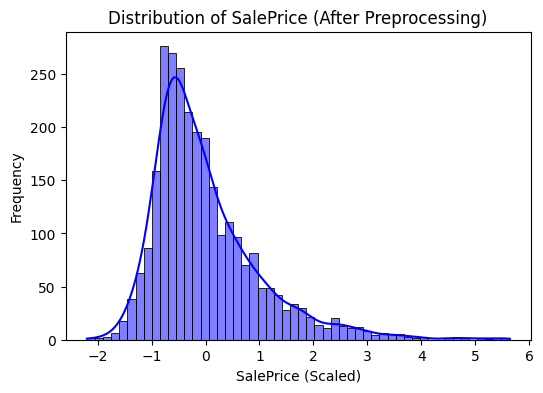

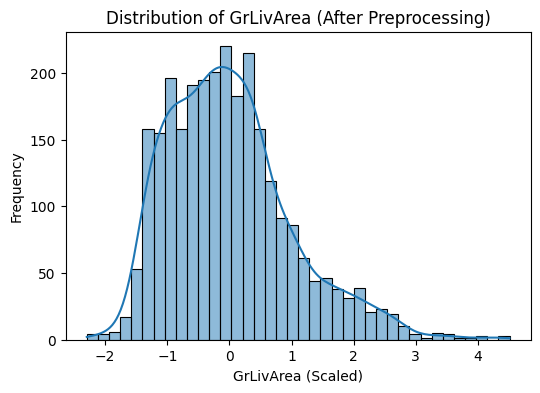

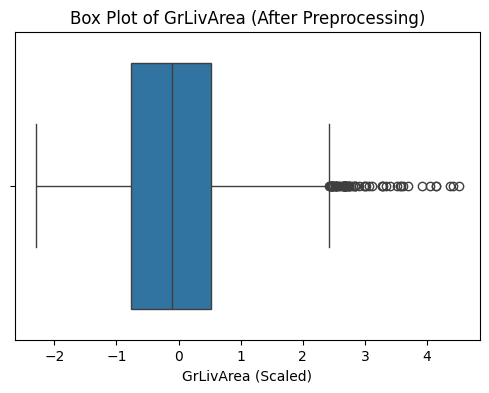

In [21]:
# Plot the distribution of 'SalePrice' after preprocessing
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['SalePrice'], kde=True, color='blue')
plt.title('Distribution of SalePrice (After Preprocessing)')
plt.xlabel('SalePrice (Scaled)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of 'GrLivArea' after preprocessing
plt.figure(figsize=(6, 4))
sns.histplot(ames_df['GrLivArea'], kde=True)
plt.title('Distribution of GrLivArea (After Preprocessing)')
plt.xlabel('GrLivArea (Scaled)')
plt.ylabel('Frequency')
plt.show()

# Visualize 'GrLivArea' with outliers highlighted after preprocessing
plt.figure(figsize=(6, 4))
sns.boxplot(x=ames_df['GrLivArea'])
plt.title('Box Plot of GrLivArea (After Preprocessing)')
plt.xlabel('GrLivArea (Scaled)')
plt.show()

In [22]:
num_rows, num_columns = ames_df.shape

print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 2764 rows and 256 columns.


### Data Preparation Summary:

- Loading the dataset from the CSV file again.
- Specifically replacing MasVnrArea to replace 'nan' with 0.
- Handling missing values: Using SimpleImputer to fill missing values with
    - the median for numerical columns and,
    - the most frequent value for categorical columns.
- Converting boolean columns to integers
- Checking the number of rows and columns before and after removing outliers based on GrLivArea.
- Removing outliers: Dropping rows where GrLivArea is greater than 4000.
- One-hot encoding categorical variables: Converting categorical variables into a format suitable for machine learning algorithms.
- Standardizing numerical features: Applying StandardScaler to standardize numerical features.
- Checking the number of rows and columns after each major step to make sure the transformations are applied correctly.

**Note: We need to re-transform SalePrice for final reporting to its original scale for meaningful interpretation.**

### III. Feature Analysis and Modeling

1. Split the Data
-   Prepare the data frames (test and train)

2. Feature Analysis:
-   Apply PCA (Principal Component Analysis) to reduce dimensionality while retaining most of the variance
-   Apply RFE (Recursive Feature Elimination) to select the most important features

3. Feature Selection:
-   Select the top features using RFE
-   Select the top features based on Random Forest Regressor importance (RFG feature importance)

4. Modeling and Evaluation:
-   Compare the selected features
-   Train models using selected features
-   Perform hyperparameter tuning for Random Forest
-   Evaluate and select top 50 features from the better model (intersection)

In [23]:
num_rows, num_columns = ames_df.shape
print(f"The dataset contains {num_rows} rows and {num_columns} columns.")

The dataset contains 2764 rows and 256 columns.


**1. Feature Analysis:**
-   Apply PCA Principle Component Analysis 

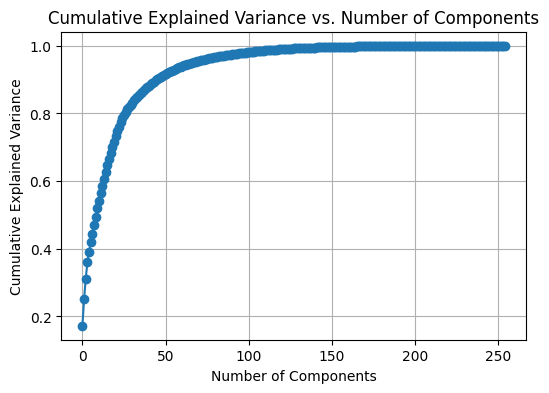

Number of components selected: 68
Shape of X_train after PCA: (2211, 68)
Shape of X_test after PCA: (553, 68)
Explained variance ratio: 0.9512371469652939
PCA Training Time: 0.96 seconds


In [24]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import time

# Prepare features and target variable
X = ames_df.drop(['SalePrice'], axis=1)
y = ames_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
start_time_pca = time.time()
pca = PCA()
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
end_time_pca = time.time()

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(6, 4))
plt.plot(cumulative_explained_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance vs. Number of Components')
plt.grid(True)
plt.show()

# Select the number of components that explain at least 95% of the variance
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print(f"Number of components selected: {n_components}")

# Apply PCA with the selected number of components to the training data
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
pca_time = end_time_pca - start_time_pca

print(f"Shape of X_train after PCA: {X_train_pca.shape}")
print(f"Shape of X_test after PCA: {X_test_pca.shape}")
print(f"Explained variance ratio: {pca.explained_variance_ratio_.sum()}")
print(f"PCA Training Time: {pca_time:.2f} seconds")


The PCA plot indicates that 68 components will explain approximately 95% of the variance in the dataset. Let's move forward with the selected number of components and proceed with the Random Forest Regressor and Recursive Feature Elimination (RFE).

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=50, random_state=42)

# Initialize RFE with the number of features to select (50 in this case)
rfe = RFE(estimator=rf_model, n_features_to_select=30)

# Fit RFE on the PCA-transformed training data
start_time = time.time()
rfe.fit(X_train_pca, y_train)
end_time = time.time()
training_time_rfe = end_time - start_time

# Transform the training and testing data to select the top features
X_train_rfe = rfe.transform(X_train_pca)
X_test_rfe = rfe.transform(X_test_pca)

# Verify the shape of the transformed data
print(f"Shape of X_train after RFE: {X_train_rfe.shape}")
print(f"Shape of X_test after RFE: {X_test_rfe.shape}")
print(f"Training Time for RFE: {training_time_rfe:.2f} seconds")


Shape of X_train after RFE: (2211, 30)
Shape of X_test after RFE: (553, 30)
Training Time for RFE: 276.96 seconds


In [32]:
# Train Random Forest Regressor on RFE-transformed data
start_time_rf = time.time()
rf_model.fit(X_train_rfe, y_train)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf

# Make predictions
y_pred = rf_model.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_original = saleprice_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = saleprice_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Evaluate the model
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)

print("Random Forest Regressor Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Training Time: {training_time_rf:.2f} seconds")

# Evaluate feature importance
feature_importances = rf_model.feature_importances_

Random Forest Regressor Performance with RFE:
Mean Absolute Error (MAE): $16221.78
Mean Squared Error (MSE): $641360053.86
Training Time: 8.76 seconds


In [33]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for loadings with original feature names
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(n_components)], index=X.columns)

# Get top contributing features for each principal component
top_features = {}
for i in range(n_components):
    top_features[f'PC{i+1}'] = loadings_df.iloc[:, i].abs().sort_values(ascending=False).index.tolist()

# Consolidate top contributing features from each principal component
consolidated_features = set()
for pc, features in top_features.items():
    consolidated_features.update(features[:100])  # Adjust number as needed

consolidated_features = list(consolidated_features)
print(f"Consolidated top contributing features: {consolidated_features}")

Consolidated top contributing features: ['Exterior2nd_HdBoard', 'WoodDeckSF', 'Neighborhood_Greens', 'Functional_Min2', 'BsmtFinType1_Unf', 'Neighborhood_BrkSide', 'TotalBsmtSF', '3SsnPorch', 'Neighborhood_Crawfor', 'BldgType_TwnhsE', 'Exterior2nd_MetalSd', 'Exterior2nd_Brk Cmn', 'BldgType_2fmCon', 'Alley_Pave', 'MasVnrType_Stone', 'FireplaceQu_Gd', 'MSSubClass', 'ExterCond_Fa', 'GarageType_BuiltIn', 'LotConfig_Inside', 'Exterior2nd_Plywood', 'LotFrontage', 'LandSlope_Sev', 'GarageQual_Fa', 'LotConfig_FR2', 'LandContour_Lvl', 'Condition1_RRAe', 'MiscFeature_Shed', 'SaleCondition_Partial', 'BldgType_Twnhs', 'Condition1_Feedr', 'GarageType_Detchd', 'ExterCond_Gd', 'Condition1_RRAn', 'Exterior1st_BrkFace', 'GarageCond_Gd', '1stFlrSF', 'BldgType_Duplex', 'Neighborhood_IDOTRR', 'Functional_Min1', 'RoofStyle_Gable', 'KitchenAbvGr', 'ExterCond_TA', 'Fence_GdWo', 'ScreenPorch', 'Fence_MnPrv', 'BsmtFinType2_GLQ', 'Neighborhood_NoRidge', 'Neighborhood_StoneBr', 'Condition2_Norm', 'MSZoning_FV', 

-   Random Forest Regressor and Feature Importance

Use the Consolidated Features from PCA for Random Forest Regressor

Explained variance ratio: 0.9513
PCA Training Time: 3.59 seconds
Shape of X_train after RFE: (2211, 68)
Shape of X_test after RFE: (553, 68)
Training Time for RFE: 18.40 seconds
Random Forest Regressor Performance with RFE:
Mean Absolute Error (MAE): $16308.32
Mean Squared Error (MSE): $644886201.05
Training Time: 18.05 seconds


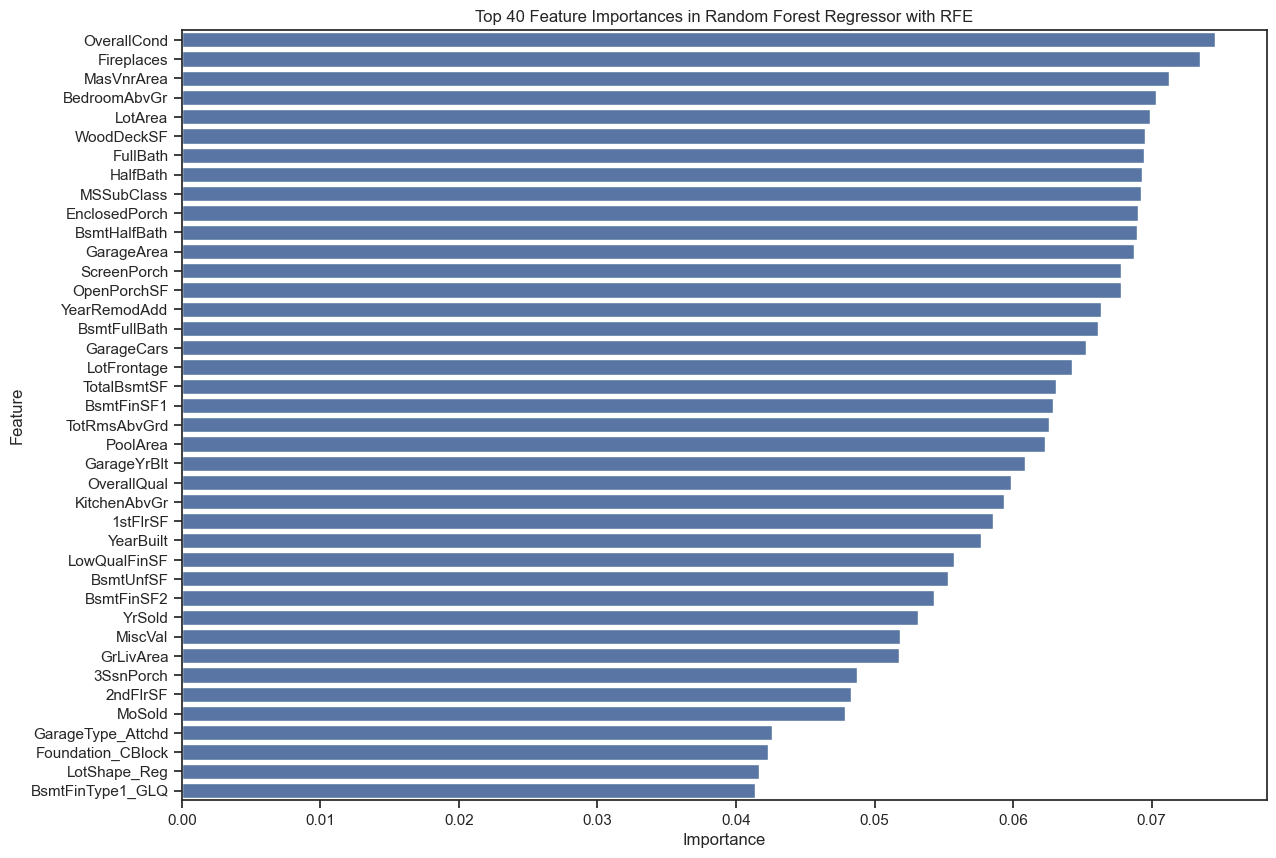

List of selected features:
['OverallCond', 'Fireplaces', 'MasVnrArea', 'BedroomAbvGr', 'LotArea', 'WoodDeckSF', 'FullBath', 'HalfBath', 'MSSubClass', 'EnclosedPorch', 'BsmtHalfBath', 'GarageArea', 'ScreenPorch', 'OpenPorchSF', 'YearRemodAdd', 'BsmtFullBath', 'GarageCars', 'LotFrontage', 'TotalBsmtSF', 'BsmtFinSF1', 'TotRmsAbvGrd', 'PoolArea', 'GarageYrBlt', 'OverallQual', 'KitchenAbvGr', '1stFlrSF', 'YearBuilt', 'LowQualFinSF', 'BsmtUnfSF', 'BsmtFinSF2', 'YrSold', 'MiscVal', 'GrLivArea', '3SsnPorch', '2ndFlrSF', 'MoSold', 'GarageType_Attchd', 'Foundation_CBlock', 'LotShape_Reg', 'BsmtFinType1_GLQ', 'HeatingQC_TA', 'BsmtQual_Gd', 'GarageFinish_RFn', 'FireplaceQu_Gd', 'KitchenQual_TA', 'GarageFinish_Unf', 'KitchenQual_Gd', 'ExterQual_Gd', 'Exterior2nd_VinylSd', 'Exterior1st_VinylSd', 'GarageType_Detchd', 'FireplaceQu_TA', 'MSZoning_RL', 'BsmtExposure_No', 'ExterQual_TA', 'BsmtQual_TA', 'Foundation_PConc', 'BsmtFinType1_Unf', 'LotConfig_Inside', 'RoofStyle_Gable', 'MSZoning_RM', 'RoofStyl

In [34]:
# Prepare features and target variable
X = ames_df.drop(['SalePrice'], axis=1)
y = ames_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
start_time_pca = time.time()
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
end_time_pca = time.time()

explained_variance_ratio = pca.explained_variance_ratio_.sum()
print(f"Explained variance ratio: {explained_variance_ratio:.4f}")
print(f"PCA Training Time: {end_time_pca - start_time_pca:.2f} seconds")

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the number of features to select
n_features_to_select = min(100, X_train_pca.shape[1])  # Adjust number of features if needed
rfe = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)

# Fit RFE on the PCA-transformed training data
start_time_rfe = time.time()
rfe.fit(X_train_pca, y_train)
end_time_rfe = time.time()

# Transform the training and testing data to select the top features
X_train_rfe = rfe.transform(X_train_pca)
X_test_rfe = rfe.transform(X_test_pca)

print(f"Shape of X_train after RFE: {X_train_rfe.shape}")
print(f"Shape of X_test after RFE: {X_test_rfe.shape}")
print(f"Training Time for RFE: {end_time_rfe - start_time_rfe:.2f} seconds")

# Train Random Forest Regressor on RFE-transformed data
start_time_rf = time.time()
rf_model.fit(X_train_rfe, y_train)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf

# Make predictions
y_pred = rf_model.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_original = saleprice_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = saleprice_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Evaluate the model
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)

print("Random Forest Regressor Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Training Time: {training_time_rf:.2f} seconds")

# Get the original features contributing to the PCA components
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

# Create a DataFrame for loadings with original feature names
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X.columns)

# Get the selected PCA components from RFE
selected_pca_indices = rfe.get_support(indices=True)

# Map back to original features
selected_features_contributions = loadings_df.iloc[:, selected_pca_indices].abs().mean(axis=1).sort_values(ascending=False)

# Ensure the lengths match before creating the DataFrame
if len(selected_features_contributions) != len(rf_model.feature_importances_):
    print("Warning: Length mismatch between selected features and feature importances")

# Create a DataFrame for feature importances
feature_importances_df = pd.DataFrame({
    'Feature': selected_features_contributions.index,
    'Importance': selected_features_contributions.values
})

# Sort the DataFrame by importance
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(14, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df.head(40))
plt.title('Top 40 Feature Importances in Random Forest Regressor with RFE')
plt.show()

# Display the list of selected features
print("List of selected features:")
print(selected_features_contributions.index.tolist())

Explained variance ratio: 0.9513
PCA Training Time: 2.47 seconds
Shape of X_train after RFE: (2211, 68)
Shape of X_test after RFE: (553, 68)
Training Time for RFE: 18.58 seconds
Random Forest Regressor Performance with RFE:
Mean Absolute Error (MAE): $16308.32
Mean Squared Error (MSE): $644886201.05
Training Time: 17.67 seconds


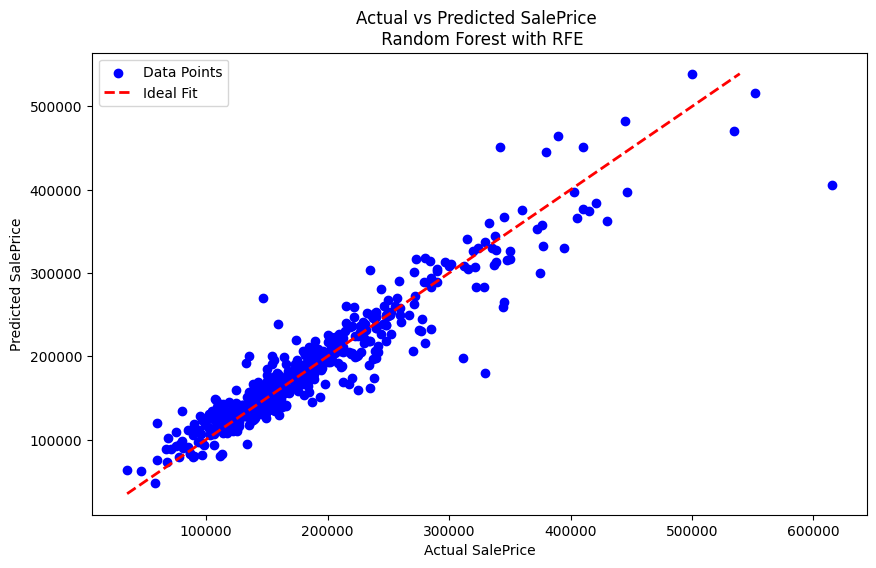

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


c:\Users\odpol\AppData\Local\Programs\Python\Python311\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Optimized Random Forest Regressor Performance with RFE:
Mean Absolute Error (MAE): $19955.32
Mean Squared Error (MSE): $947959367.00
Best Parameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': False}
Hyperparameter Tuning Time: 551.78 seconds


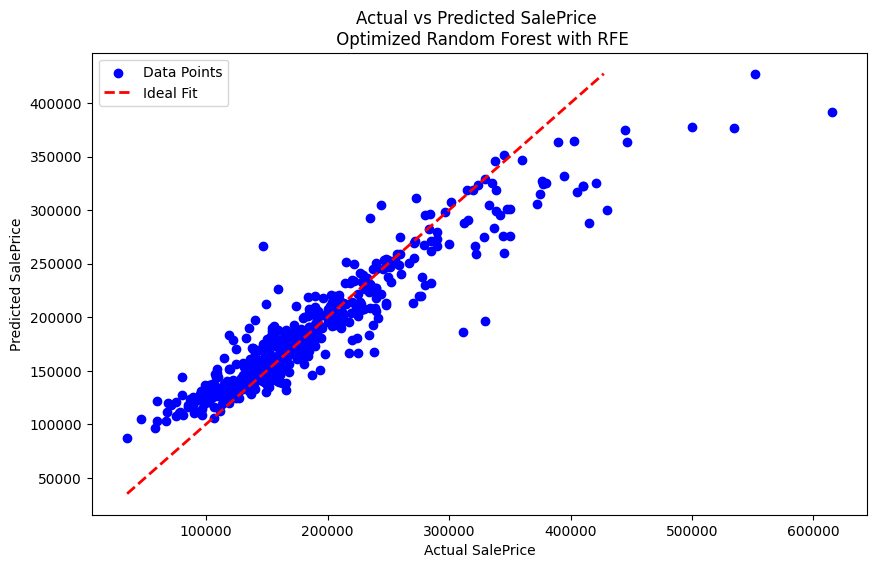

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare features and target variable
X = ames_df.drop(['SalePrice'], axis=1)
y = ames_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
start_time_pca = time.time()
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
end_time_pca = time.time()

explained_variance_ratio = pca.explained_variance_ratio_.sum()
print(f"Explained variance ratio: {explained_variance_ratio:.4f}")
print(f"PCA Training Time: {end_time_pca - start_time_pca:.2f} seconds")

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the number of features to select
n_features_to_select = min(100, X_train_pca.shape[1])  # Adjust number of features if needed
rfe = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)

# Fit RFE on the PCA-transformed training data
start_time_rfe = time.time()
rfe.fit(X_train_pca, y_train)
end_time_rfe = time.time()

# Transform the training and testing data to select the top features
X_train_rfe = rfe.transform(X_train_pca)
X_test_rfe = rfe.transform(X_test_pca)

print(f"Shape of X_train after RFE: {X_train_rfe.shape}")
print(f"Shape of X_test after RFE: {X_test_rfe.shape}")
print(f"Training Time for RFE: {end_time_rfe - start_time_rfe:.2f} seconds")

# Train Random Forest Regressor on RFE-transformed data
start_time_rf = time.time()
rf_model.fit(X_train_rfe, y_train)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf

# Make predictions
y_pred = rf_model.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_original = saleprice_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = saleprice_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Evaluate the model
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)

print("Random Forest Regressor Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Training Time: {training_time_rf:.2f} seconds")

# Plot predicted vs. actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_original.max()], [y_test_original.min(), y_pred_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Random Forest with RFE')
plt.legend()
plt.show()

# Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                               param_distributions=param_grid, 
                               n_iter=200, cv=5, verbose=2, 
                               random_state=42, n_jobs=-1)

start_time_tuning = time.time()
rf_random.fit(X_train_rfe, y_train)
end_time_tuning = time.time()

# Best parameters from tuning
best_params_rf = rf_random.best_params_

# Train the final model with the best parameters
rf_optimized = RandomForestRegressor(**best_params_rf)
rf_optimized.fit(X_train_rfe, y_train)

# Make predictions
y_pred_optimized = rf_optimized.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_optimized_original = saleprice_scaler.inverse_transform(y_pred_optimized.reshape(-1, 1)).flatten()

# Evaluate the model
mae_optimized = mean_absolute_error(y_test_original, y_pred_optimized_original)
mse_optimized = mean_squared_error(y_test_original, y_pred_optimized_original)

print("Optimized Random Forest Regressor Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_optimized:.2f}")
print(f"Mean Squared Error (MSE): ${mse_optimized:.2f}")
print(f"Best Parameters: {best_params_rf}")
print(f"Hyperparameter Tuning Time: {end_time_tuning - start_time_tuning:.2f} seconds")

# Plot predicted vs. actual for optimized model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_optimized_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_optimized_original.max()], [y_test_original.min(), y_pred_optimized_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Optimized Random Forest with RFE')
plt.legend()
plt.show()

Baseline Linear Regression Performance:
Mean Absolute Error (MAE): $16793.86
Mean Squared Error (MSE): $574710860.71
Training Time: 0.32 seconds


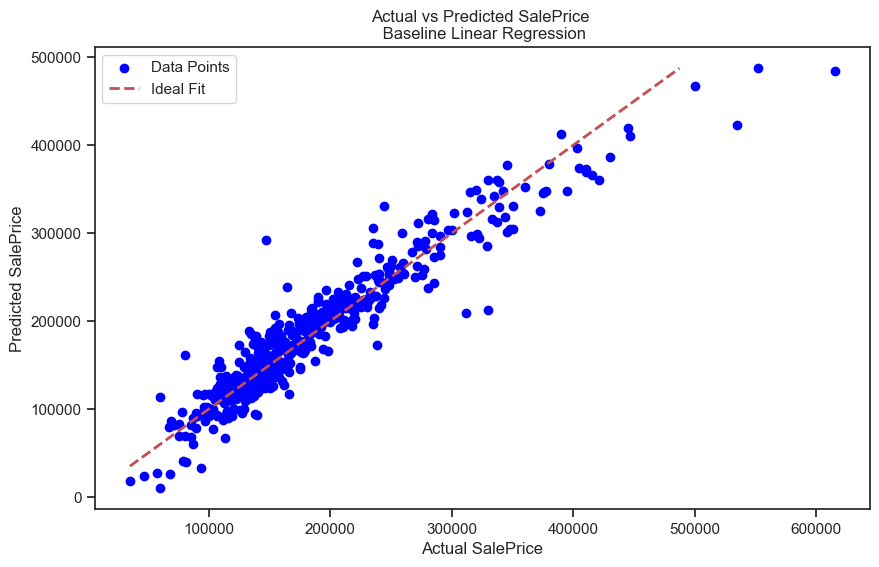

In [36]:
import time
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Train Linear Regression model
lin_reg = LinearRegression()
start_time = time.time()
lin_reg.fit(X_train_rfe, y_train)
training_time_lr = time.time() - start_time

# Make predictions
y_pred_lr = lin_reg.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_lr_original = saleprice_scaler.inverse_transform(y_pred_lr.reshape(-1, 1)).flatten()
y_test_original = saleprice_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Evaluate the model
mae_lr = mean_absolute_error(y_test_original, y_pred_lr_original)
mse_lr = mean_squared_error(y_test_original, y_pred_lr_original)

print("Baseline Linear Regression Performance:")
print(f"Mean Absolute Error (MAE): ${mae_lr:.2f}")
print(f"Mean Squared Error (MSE): ${mse_lr:.2f}")
print(f"Training Time: {training_time_lr:.2f} seconds")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_lr_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_lr_original.max()], [y_test_original.min(), y_pred_lr_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Baseline Linear Regression')
plt.legend()
plt.show()


Explained variance ratio: 0.9513
PCA Training Time: 0.38 seconds
Shape of X_train after RFE: (2211, 68)
Shape of X_test after RFE: (553, 68)
Training Time for RFE: 18.22 seconds
Random Forest Regressor Performance with RFE:
Mean Absolute Error (MAE): $16308.32
Mean Squared Error (MSE): $644886201.05
Training Time: 17.25 seconds


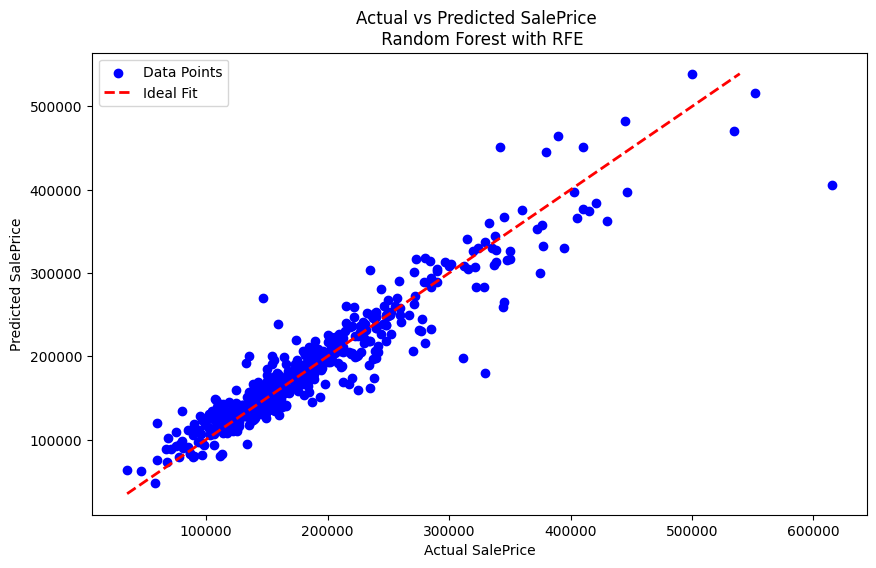

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prepare features and target variable
X = ames_df.drop(['SalePrice'], axis=1)
y = ames_df['SalePrice']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply PCA
start_time_pca = time.time()
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
end_time_pca = time.time()

explained_variance_ratio = pca.explained_variance_ratio_.sum()
print(f"Explained variance ratio: {explained_variance_ratio:.4f}")
print(f"PCA Training Time: {end_time_pca - start_time_pca:.2f} seconds")

# Initialize the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Initialize RFE with the number of features to select
n_features_to_select = min(100, X_train_pca.shape[1])  # Adjust number of features if needed
rfe = RFE(estimator=rf_model, n_features_to_select=n_features_to_select)

# Fit RFE on the PCA-transformed training data
start_time_rfe = time.time()
rfe.fit(X_train_pca, y_train)
end_time_rfe = time.time()

# Transform the training and testing data to select the top features
X_train_rfe = rfe.transform(X_train_pca)
X_test_rfe = rfe.transform(X_test_pca)

print(f"Shape of X_train after RFE: {X_train_rfe.shape}")
print(f"Shape of X_test after RFE: {X_test_rfe.shape}")
print(f"Training Time for RFE: {end_time_rfe - start_time_rfe:.2f} seconds")

# Train Random Forest Regressor on RFE-transformed data
start_time_rf = time.time()
rf_model.fit(X_train_rfe, y_train)
end_time_rf = time.time()
training_time_rf = end_time_rf - start_time_rf

# Make predictions
y_pred = rf_model.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_original = saleprice_scaler.inverse_transform(y_pred.reshape(-1, 1)).flatten()
y_test_original = saleprice_scaler.inverse_transform(y_test.values.reshape(-1, 1)).flatten()

# Evaluate the model
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)

print("Random Forest Regressor Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae:.2f}")
print(f"Mean Squared Error (MSE): ${mse:.2f}")
print(f"Training Time: {training_time_rf:.2f} seconds")

# Plot predicted vs. actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_original.max()], [y_test_original.min(), y_pred_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Random Forest with RFE')
plt.legend()
plt.show()

# Refined Hyperparameter tuning for Random Forest Regressor
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2'],  # Removed 'auto'
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf_random = RandomizedSearchCV(estimator=RandomForestRegressor(), 
                               param_distributions=param_grid, 
                               n_iter=200, cv=5, verbose=2, 
                               random_state=42, n_jobs=-1)

start_time_tuning = time.time()
rf_random.fit(X_train_rfe, y_train)
end_time_tuning = time.time()

# Best parameters from tuning
best_params_rf = rf_random.best_params_

# Train the final model with the best parameters
rf_optimized = RandomForestRegressor(**best_params_rf)
rf_optimized.fit(X_train_rfe, y_train)

# Make predictions
y_pred_optimized = rf_optimized.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_optimized_original = saleprice_scaler.inverse_transform(y_pred_optimized.reshape(-1, 1)).flatten()

# Evaluate the model
mae_optimized = mean_absolute_error(y_test_original, y_pred_optimized_original)
mse_optimized = mean_squared_error(y_test_original, y_pred_optimized_original)

print("Optimized Random Forest Regressor Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_optimized:.2f}")
print(f"Mean Squared Error (MSE): ${mse_optimized:.2f}")
print(f"Best Parameters: {best_params_rf}")
print(f"Hyperparameter Tuning Time: {end_time_tuning - start_time_tuning:.2f} seconds")

# Plot predicted vs. actual for optimized model
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_optimized_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_optimized_original.max()], [y_test_original.min(), y_pred_optimized_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Optimized Random Forest with RFE')
plt.legend()
plt.show()

Linear Regression Performance with RFE:
Mean Absolute Error (MAE): $16793.86
Mean Squared Error (MSE): $574710860.71
Training Time: 1.15 seconds


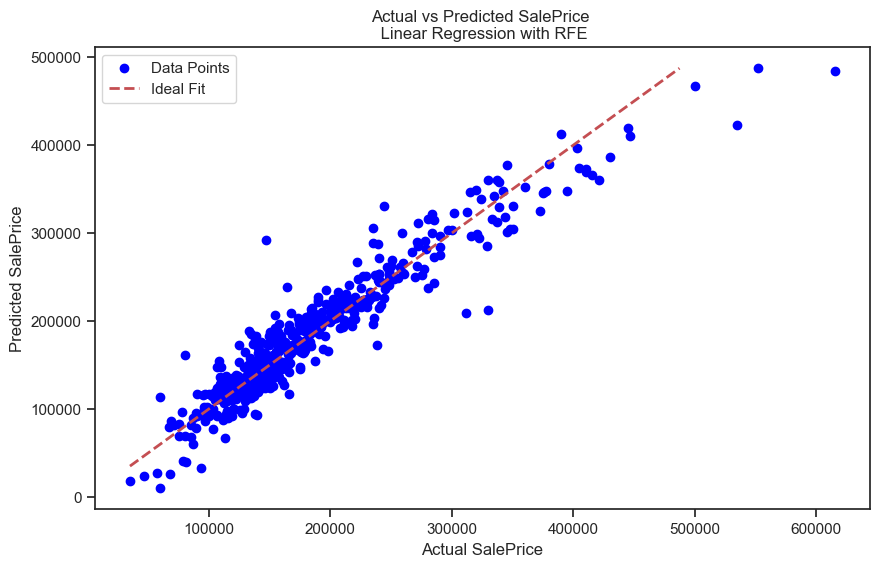

In [38]:
from sklearn.linear_model import LinearRegression

# Train the Linear Regression model
lin_reg = LinearRegression()

start_time_lr = time.time()
lin_reg.fit(X_train_rfe, y_train)
end_time_lr = time.time()

# Make predictions
y_pred_lr = lin_reg.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_lr_original = saleprice_scaler.inverse_transform(y_pred_lr.reshape(-1, 1)).flatten()

# Evaluate the model
mae_lr = mean_absolute_error(y_test_original, y_pred_lr_original)
mse_lr = mean_squared_error(y_test_original, y_pred_lr_original)

print("Linear Regression Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_lr:.2f}")
print(f"Mean Squared Error (MSE): ${mse_lr:.2f}")
print(f"Training Time: {end_time_lr - start_time_lr:.2f} seconds")

# Plot predicted vs. actual for Linear Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_lr_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_lr_original.max()], [y_test_original.min(), y_pred_lr_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Linear Regression with RFE')
plt.legend()
plt.show()


Ridge Regression Performance with RFE:
Mean Absolute Error (MAE): $16743.31
Mean Squared Error (MSE): $573911537.34
Training Time: 0.39 seconds
Best Parameters: {'alpha': 10.0}


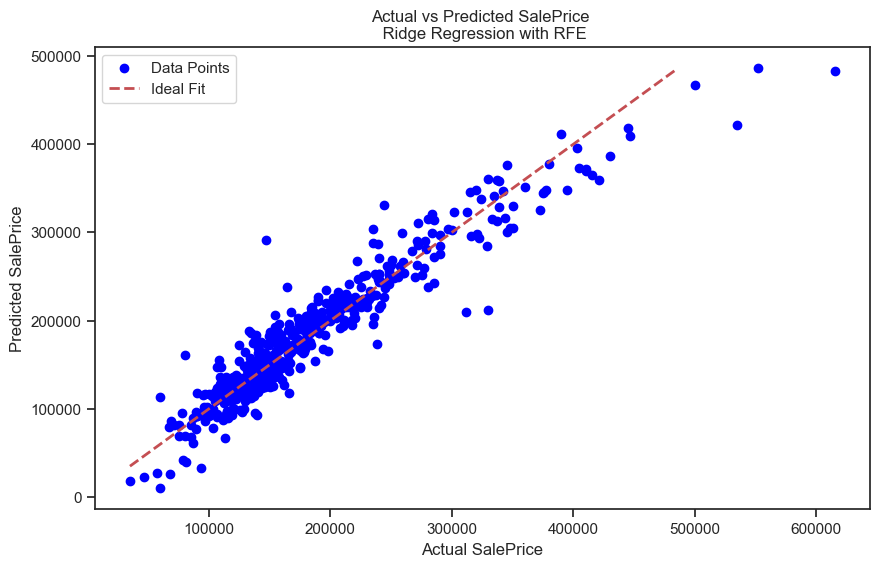

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the Ridge Regression model
ridge = Ridge()

# Hyperparameter tuning for Ridge Regression
param_grid_ridge = {'alpha': np.logspace(-6, 6, 13)}

ridge_search = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error')

start_time_ridge = time.time()
ridge_search.fit(X_train_rfe, y_train)
end_time_ridge = time.time()

# Best parameters from tuning
best_params_ridge = ridge_search.best_params_

# Train the final Ridge Regression model with the best parameters
ridge_optimized = Ridge(**best_params_ridge)
ridge_optimized.fit(X_train_rfe, y_train)

# Make predictions
y_pred_ridge = ridge_optimized.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_ridge_original = saleprice_scaler.inverse_transform(y_pred_ridge.reshape(-1, 1)).flatten()

# Evaluate the model
mae_ridge = mean_absolute_error(y_test_original, y_pred_ridge_original)
mse_ridge = mean_squared_error(y_test_original, y_pred_ridge_original)

print("Ridge Regression Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_ridge:.2f}")
print(f"Mean Squared Error (MSE): ${mse_ridge:.2f}")
print(f"Training Time: {end_time_ridge - start_time_ridge:.2f} seconds")
print(f"Best Parameters: {best_params_ridge}")

# Plot predicted vs. actual for Ridge Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_ridge_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_ridge_original.max()], [y_test_original.min(), y_pred_ridge_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Ridge Regression with RFE')
plt.legend()
plt.show()


Lasso Regression Performance with RFE:
Mean Absolute Error (MAE): $16653.21
Mean Squared Error (MSE): $573070339.02
Training Time: 0.37 seconds
Best Parameters: {'alpha': 0.001}


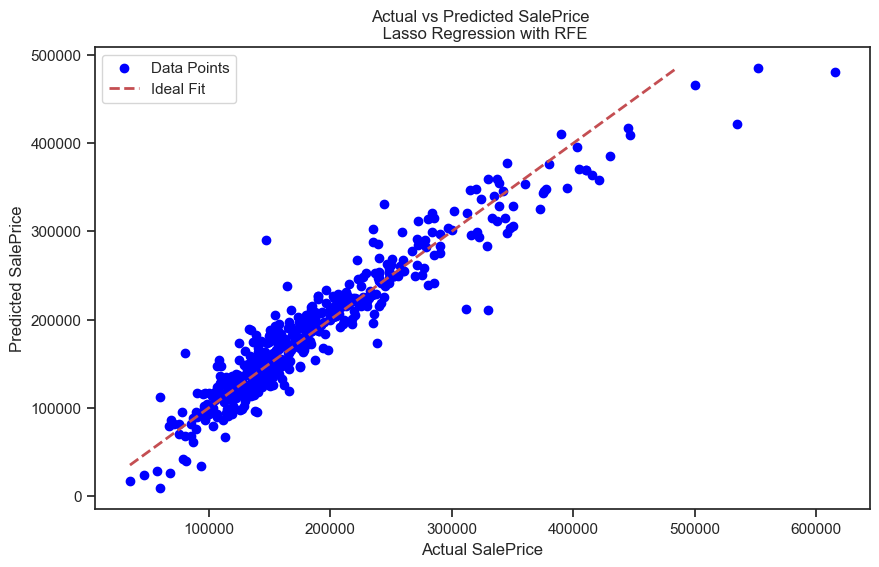

In [40]:
from sklearn.linear_model import Lasso

# Define the Lasso Regression model
lasso = Lasso()

# Hyperparameter tuning for Lasso Regression
param_grid_lasso = {'alpha': np.logspace(-6, 6, 13)}

lasso_search = GridSearchCV(lasso, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')

start_time_lasso = time.time()
lasso_search.fit(X_train_rfe, y_train)
end_time_lasso = time.time()

# Best parameters from tuning
best_params_lasso = lasso_search.best_params_

# Train the final Lasso Regression model with the best parameters
lasso_optimized = Lasso(**best_params_lasso)
lasso_optimized.fit(X_train_rfe, y_train)

# Make predictions
y_pred_lasso = lasso_optimized.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_lasso_original = saleprice_scaler.inverse_transform(y_pred_lasso.reshape(-1, 1)).flatten()

# Evaluate the model
mae_lasso = mean_absolute_error(y_test_original, y_pred_lasso_original)
mse_lasso = mean_squared_error(y_test_original, y_pred_lasso_original)

print("Lasso Regression Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_lasso:.2f}")
print(f"Mean Squared Error (MSE): ${mse_lasso:.2f}")
print(f"Training Time: {end_time_lasso - start_time_lasso:.2f} seconds")
print(f"Best Parameters: {best_params_lasso}")

# Plot predicted vs. actual for Lasso Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_lasso_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_lasso_original.max()], [y_test_original.min(), y_pred_lasso_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Lasso Regression with RFE')
plt.legend()
plt.show()


Elastic Net Regression Performance with RFE:
Mean Absolute Error (MAE): $16653.21
Mean Squared Error (MSE): $573070339.02
Training Time: 1.06 seconds
Best Parameters: {'alpha': 0.001, 'l1_ratio': 1.0}


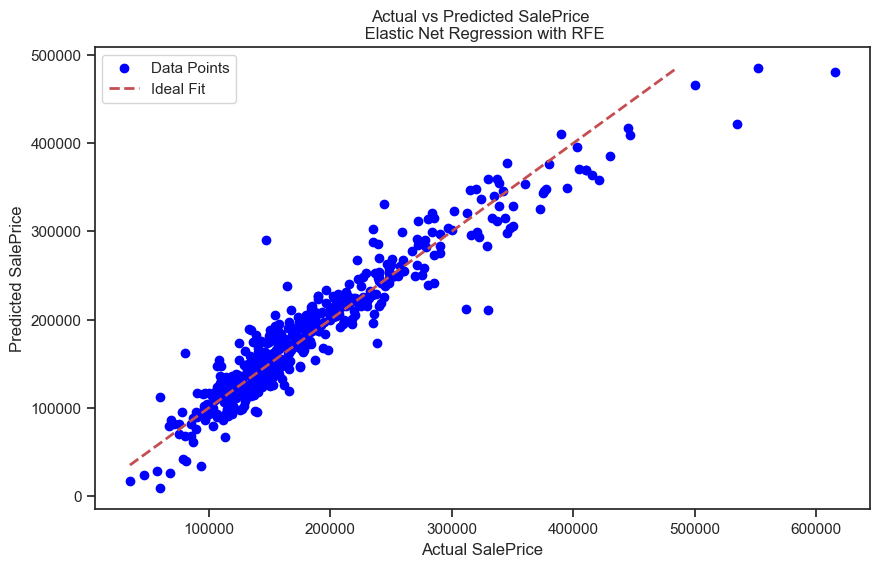

In [41]:
from sklearn.linear_model import ElasticNet

# Define the Elastic Net model
elastic_net = ElasticNet()

# Hyperparameter tuning for Elastic Net
param_grid_elastic = {
    'alpha': np.logspace(-6, 6, 13),
    'l1_ratio': [0.1, 0.5, 0.7, 1.0]
}

elastic_search = GridSearchCV(elastic_net, param_grid_elastic, cv=5, scoring='neg_mean_squared_error')

start_time_elastic = time.time()
elastic_search.fit(X_train_rfe, y_train)
end_time_elastic = time.time()

# Best parameters from tuning
best_params_elastic = elastic_search.best_params_

# Train the final Elastic Net model with the best parameters
elastic_optimized = ElasticNet(**best_params_elastic)
elastic_optimized.fit(X_train_rfe, y_train)

# Make predictions
y_pred_elastic = elastic_optimized.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_elastic_original = saleprice_scaler.inverse_transform(y_pred_elastic.reshape(-1, 1)).flatten()

# Evaluate the model
mae_elastic = mean_absolute_error(y_test_original, y_pred_elastic_original)
mse_elastic = mean_squared_error(y_test_original, y_pred_elastic_original)

print("Elastic Net Regression Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_elastic:.2f}")
print(f"Mean Squared Error (MSE): ${mse_elastic:.2f}")
print(f"Training Time: {end_time_elastic - start_time_elastic:.2f} seconds")
print(f"Best Parameters: {best_params_elastic}")

# Plot predicted vs. actual for Elastic Net Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_elastic_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_elastic_original.max()], [y_test_original.min(), y_pred_elastic_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Elastic Net Regression with RFE')
plt.legend()
plt.show()


c:\Users\odpol\AppData\Local\Programs\Python\Python311\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


XGBoost Performance with RFE:
Mean Absolute Error (MAE): $14099.86
Mean Squared Error (MSE): $448043536.17
Training Time: 491.53 seconds
Best Parameters: {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05, 'colsample_bytree': 1.0}


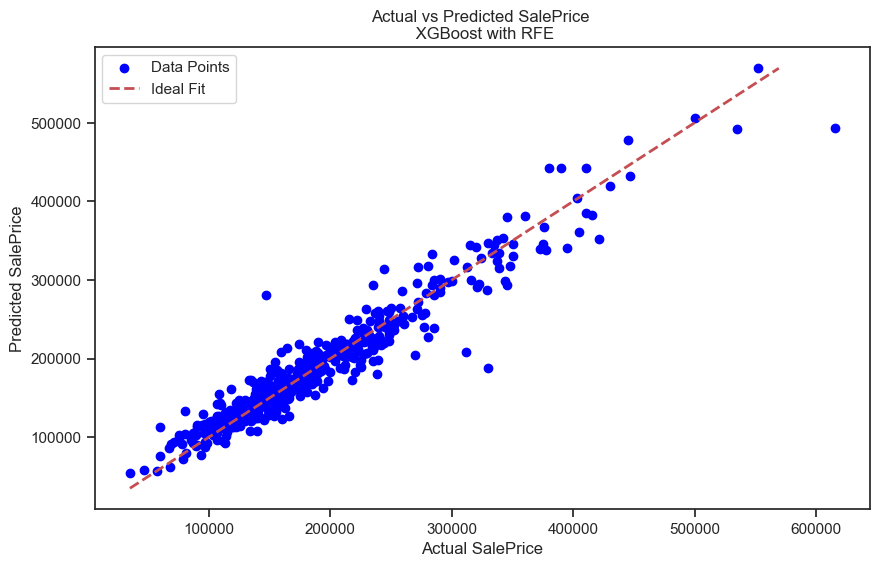

In [42]:
from xgboost import XGBRegressor

# Define the XGBoost model
xgb_model = XGBRegressor()

# Hyperparameter tuning for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

xgb_search = RandomizedSearchCV(xgb_model, param_grid_xgb, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

start_time_xgb = time.time()
xgb_search.fit(X_train_rfe, y_train)
end_time_xgb = time.time()

# Best parameters from tuning
best_params_xgb = xgb_search.best_params_

# Train the final XGBoost model with the best parameters
xgb_optimized = XGBRegressor(**best_params_xgb)
xgb_optimized.fit(X_train_rfe, y_train)

# Make predictions
y_pred_xgb = xgb_optimized.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_xgb_original = saleprice_scaler.inverse_transform(y_pred_xgb.reshape(-1, 1)).flatten()

# Evaluate the model
mae_xgb = mean_absolute_error(y_test_original, y_pred_xgb_original)
mse_xgb = mean_squared_error(y_test_original, y_pred_xgb_original)

print("XGBoost Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_xgb:.2f}")
print(f"Mean Squared Error (MSE): ${mse_xgb:.2f}")
print(f"Training Time: {end_time_xgb - start_time_xgb:.2f} seconds")
print(f"Best Parameters: {best_params_xgb}")

# Plot predicted vs. actual for XGBoost
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_xgb_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_xgb_original.max()], [y_test_original.min(), y_pred_xgb_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n XGBoost with RFE')
plt.legend()
plt.show()


Gradient Boosting Performance with RFE:
Mean Absolute Error (MAE): $14369.19
Mean Squared Error (MSE): $476486714.50
Training Time: 1058.68 seconds
Best Parameters: {'subsample': 0.6, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.05}


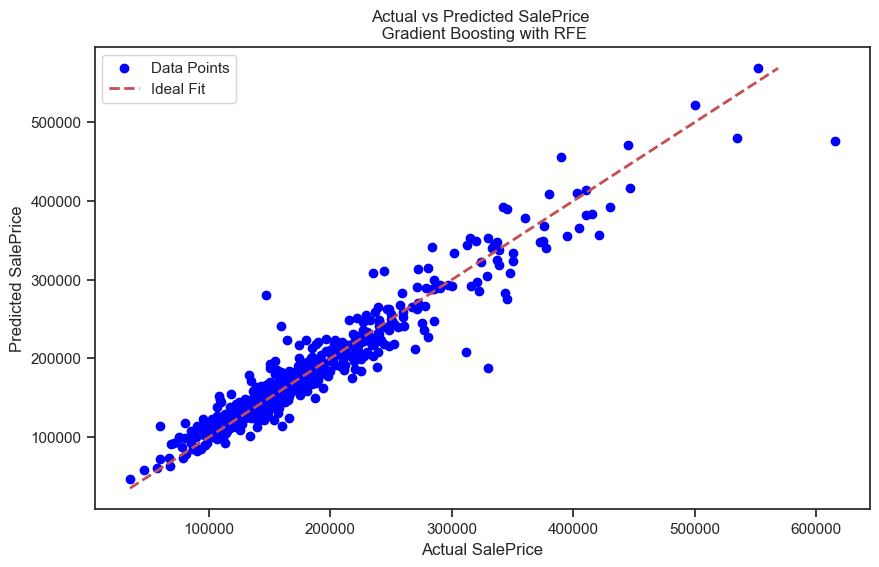

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Define the Gradient Boosting model
gb_model = GradientBoostingRegressor()

# Hyperparameter tuning for Gradient Boosting
param_grid_gb = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.3],
    'subsample': [0.6, 0.8, 1.0]
}

gb_search = RandomizedSearchCV(gb_model, param_grid_gb, n_iter=100, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

start_time_gb = time.time()
gb_search.fit(X_train_rfe, y_train)
end_time_gb = time.time()

# Best parameters from tuning
best_params_gb = gb_search.best_params_

# Train the final Gradient Boosting model with the best parameters
gb_optimized = GradientBoostingRegressor(**best_params_gb)
gb_optimized.fit(X_train_rfe, y_train)

# Make predictions
y_pred_gb = gb_optimized.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_gb_original = saleprice_scaler.inverse_transform(y_pred_gb.reshape(-1, 1)).flatten()

# Evaluate the model
mae_gb = mean_absolute_error(y_test_original, y_pred_gb_original)
mse_gb = mean_squared_error(y_test_original, y_pred_gb_original)

print("Gradient Boosting Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_gb:.2f}")
print(f"Mean Squared Error (MSE): ${mse_gb:.2f}")
print(f"Training Time: {end_time_gb - start_time_gb:.2f} seconds")
print(f"Best Parameters: {best_params_gb}")

# Plot predicted vs. actual for Gradient Boosting
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_gb_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_gb_original.max()], [y_test_original.min(), y_pred_gb_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Gradient Boosting with RFE')
plt.legend()
plt.show()


Support Vector Regression Performance with RFE:
Mean Absolute Error (MAE): $16184.34
Mean Squared Error (MSE): $595680184.04
Training Time: 54.04 seconds
Best Parameters: {'C': 0.1, 'epsilon': 0.1, 'kernel': 'linear'}


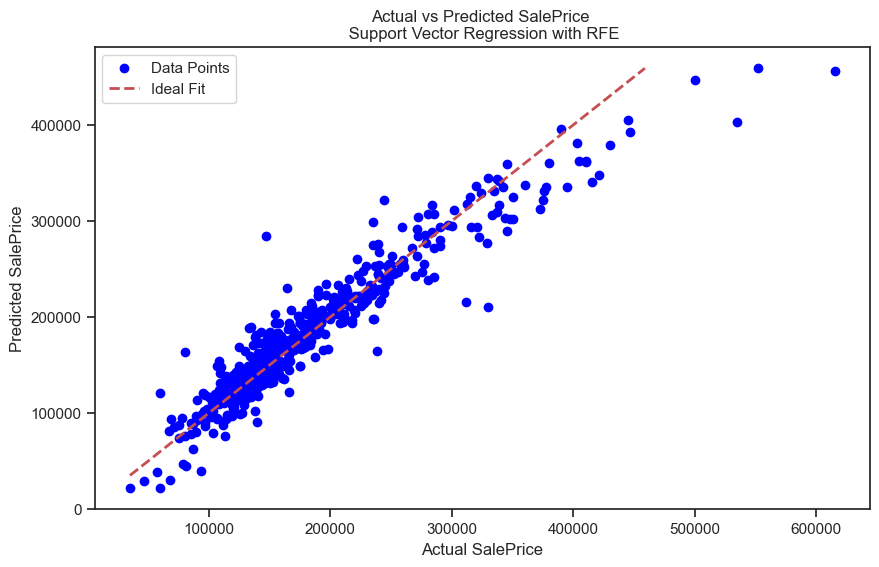

In [44]:
from sklearn.svm import SVR

# Define the Support Vector Regressor model
svr_model = SVR()

# Hyperparameter tuning for Support Vector Regression
param_grid_svr = {
    'C': [0.001, 0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5],
    'kernel': ['linear', 'poly', 'rbf']
}

svr_search = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='neg_mean_squared_error')

start_time_svr = time.time()
svr_search.fit(X_train_rfe, y_train)
end_time_svr = time.time()

# Best parameters from tuning
best_params_svr = svr_search.best_params_

# Train the final Support Vector Regressor model with the best parameters
svr_optimized = SVR(**best_params_svr)
svr_optimized.fit(X_train_rfe, y_train)

# Make predictions
y_pred_svr = svr_optimized.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_svr_original = saleprice_scaler.inverse_transform(y_pred_svr.reshape(-1, 1)).flatten()

# Evaluate the model
mae_svr = mean_absolute_error(y_test_original, y_pred_svr_original)
mse_svr = mean_squared_error(y_test_original, y_pred_svr_original)

print("Support Vector Regression Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_svr:.2f}")
print(f"Mean Squared Error (MSE): ${mse_svr:.2f}")
print(f"Training Time: {end_time_svr - start_time_svr:.2f} seconds")
print(f"Best Parameters: {best_params_svr}")

# Plot predicted vs. actual for Support Vector Regression
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_svr_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_svr_original.max()], [y_test_original.min(), y_pred_svr_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Support Vector Regression with RFE')
plt.legend()
plt.show()


In [ ]:
from sklearn.neural_network import MLPRegressor

# Define the Artificial Neural Network model
mlp_model = MLPRegressor(max_iter=1000, random_state=42)

# Hyperparameter tuning for ANN
param_grid_ann = {
    'hidden_layer_sizes': [ (100, 100, 100), (200, 200, 200)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.05, 0.10, 1],
    'learning_rate': ['constant','adaptive'],
}

ann_search = RandomizedSearchCV(mlp_model, param_grid_ann, n_iter=48, cv=5, scoring='neg_mean_squared_error', random_state=42, n_jobs=-1)

start_time_ann = time.time()
ann_search.fit(X_train_rfe, y_train)
end_time_ann = time.time()

# Best parameters from tuning
best_params_ann = ann_search.best_params_

# Train the final ANN model with the best parameters
ann_optimized = MLPRegressor(**best_params_ann, max_iter=1000, random_state=42)
ann_optimized.fit(X_train_rfe, y_train)

# Make predictions
y_pred_ann = ann_optimized.predict(X_test_rfe)

# Un-transform the predictions back to the original scale
y_pred_ann_original = saleprice_scaler.inverse_transform(y_pred_ann.reshape(-1, 1)).flatten()

# Evaluate the model
mae_ann = mean_absolute_error(y_test_original, y_pred_ann_original)
mse_ann = mean_squared_error(y_test_original, y_pred_ann_original)

print("Artificial Neural Networks Performance with RFE:")
print(f"Mean Absolute Error (MAE): ${mae_ann:.2f}")
print(f"Mean Squared Error (MSE): ${mse_ann:.2f}")
print(f"Training Time: {end_time_ann - start_time_ann:.2f} seconds")
print(f"Best Parameters: {best_params_ann}")

# Plot predicted vs. actual for Artificial Neural Networks
plt.figure(figsize=(10, 6))
plt.scatter(y_test_original, y_pred_ann_original, color='blue', label='Data Points')
plt.plot([y_test_original.min(), y_pred_ann_original.max()], [y_test_original.min(), y_pred_ann_original.max()], 'r--', lw=2, label='Ideal Fit')
plt.xlabel('Actual SalePrice')
plt.ylabel('Predicted SalePrice')
plt.title('Actual vs Predicted SalePrice \n Artificial Neural Networks with RFE')
plt.legend()
plt.show()
